# SWAA Survey Analysis Workbook

This notebook includes all the functions to generate the charts and tables found in the preprint titled ["Connecting remote work and travel: Lessons from nearly three years of comprehensive monthly surveys"](https://doi-org.libproxy.mit.edu/10.48550/arXiv.2303.06186), by Nicholas S. Caros, Xiaotong Guo, Yunhan Zheng and Prof. Jinhua Zhao. 



Nick Caros, January 2023

-----------------
The workbook is split into two sections:
1. Data loading and preparation
2. Creating specific charts and tables

## 1. Data Loading and Preparation

Load data and libraries

In [1]:
# Import helpfer functions defined elsewhere
import helper_functions as hf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Merge data with public data to get some columns missing from JMB data
data_path = '../Data/data.csv'
dataset = pd.read_csv(data_path, low_memory=False)

Choose a scaling column and prep data

In [3]:
scale_col = 'cratio100'
df = hf.filter_df(dataset, scale_col)
df = hf.create_columns(df)
ld = hf.label_dict()

## 2. Run Analysis

### Remote Work Share 

In [4]:
question = 'planned' # current, planned or preferred
figsize = (8,4.5)

In [7]:
if question == 'current':
    qcol = 'wfhcovid_frac'
elif question == 'preferred':
    qcol = 'numwfh_days_postCOVID_s_u'
elif question == 'planned':
    qcol = 'numwfh_days_postCOVID_boss_s_u'
else:
    raise Exception('Invalid RW question entered.')

#### 1a. Demographics

Sample size: 119570
Sample size: 119570
Sample size: 119570
Sample size: 119570


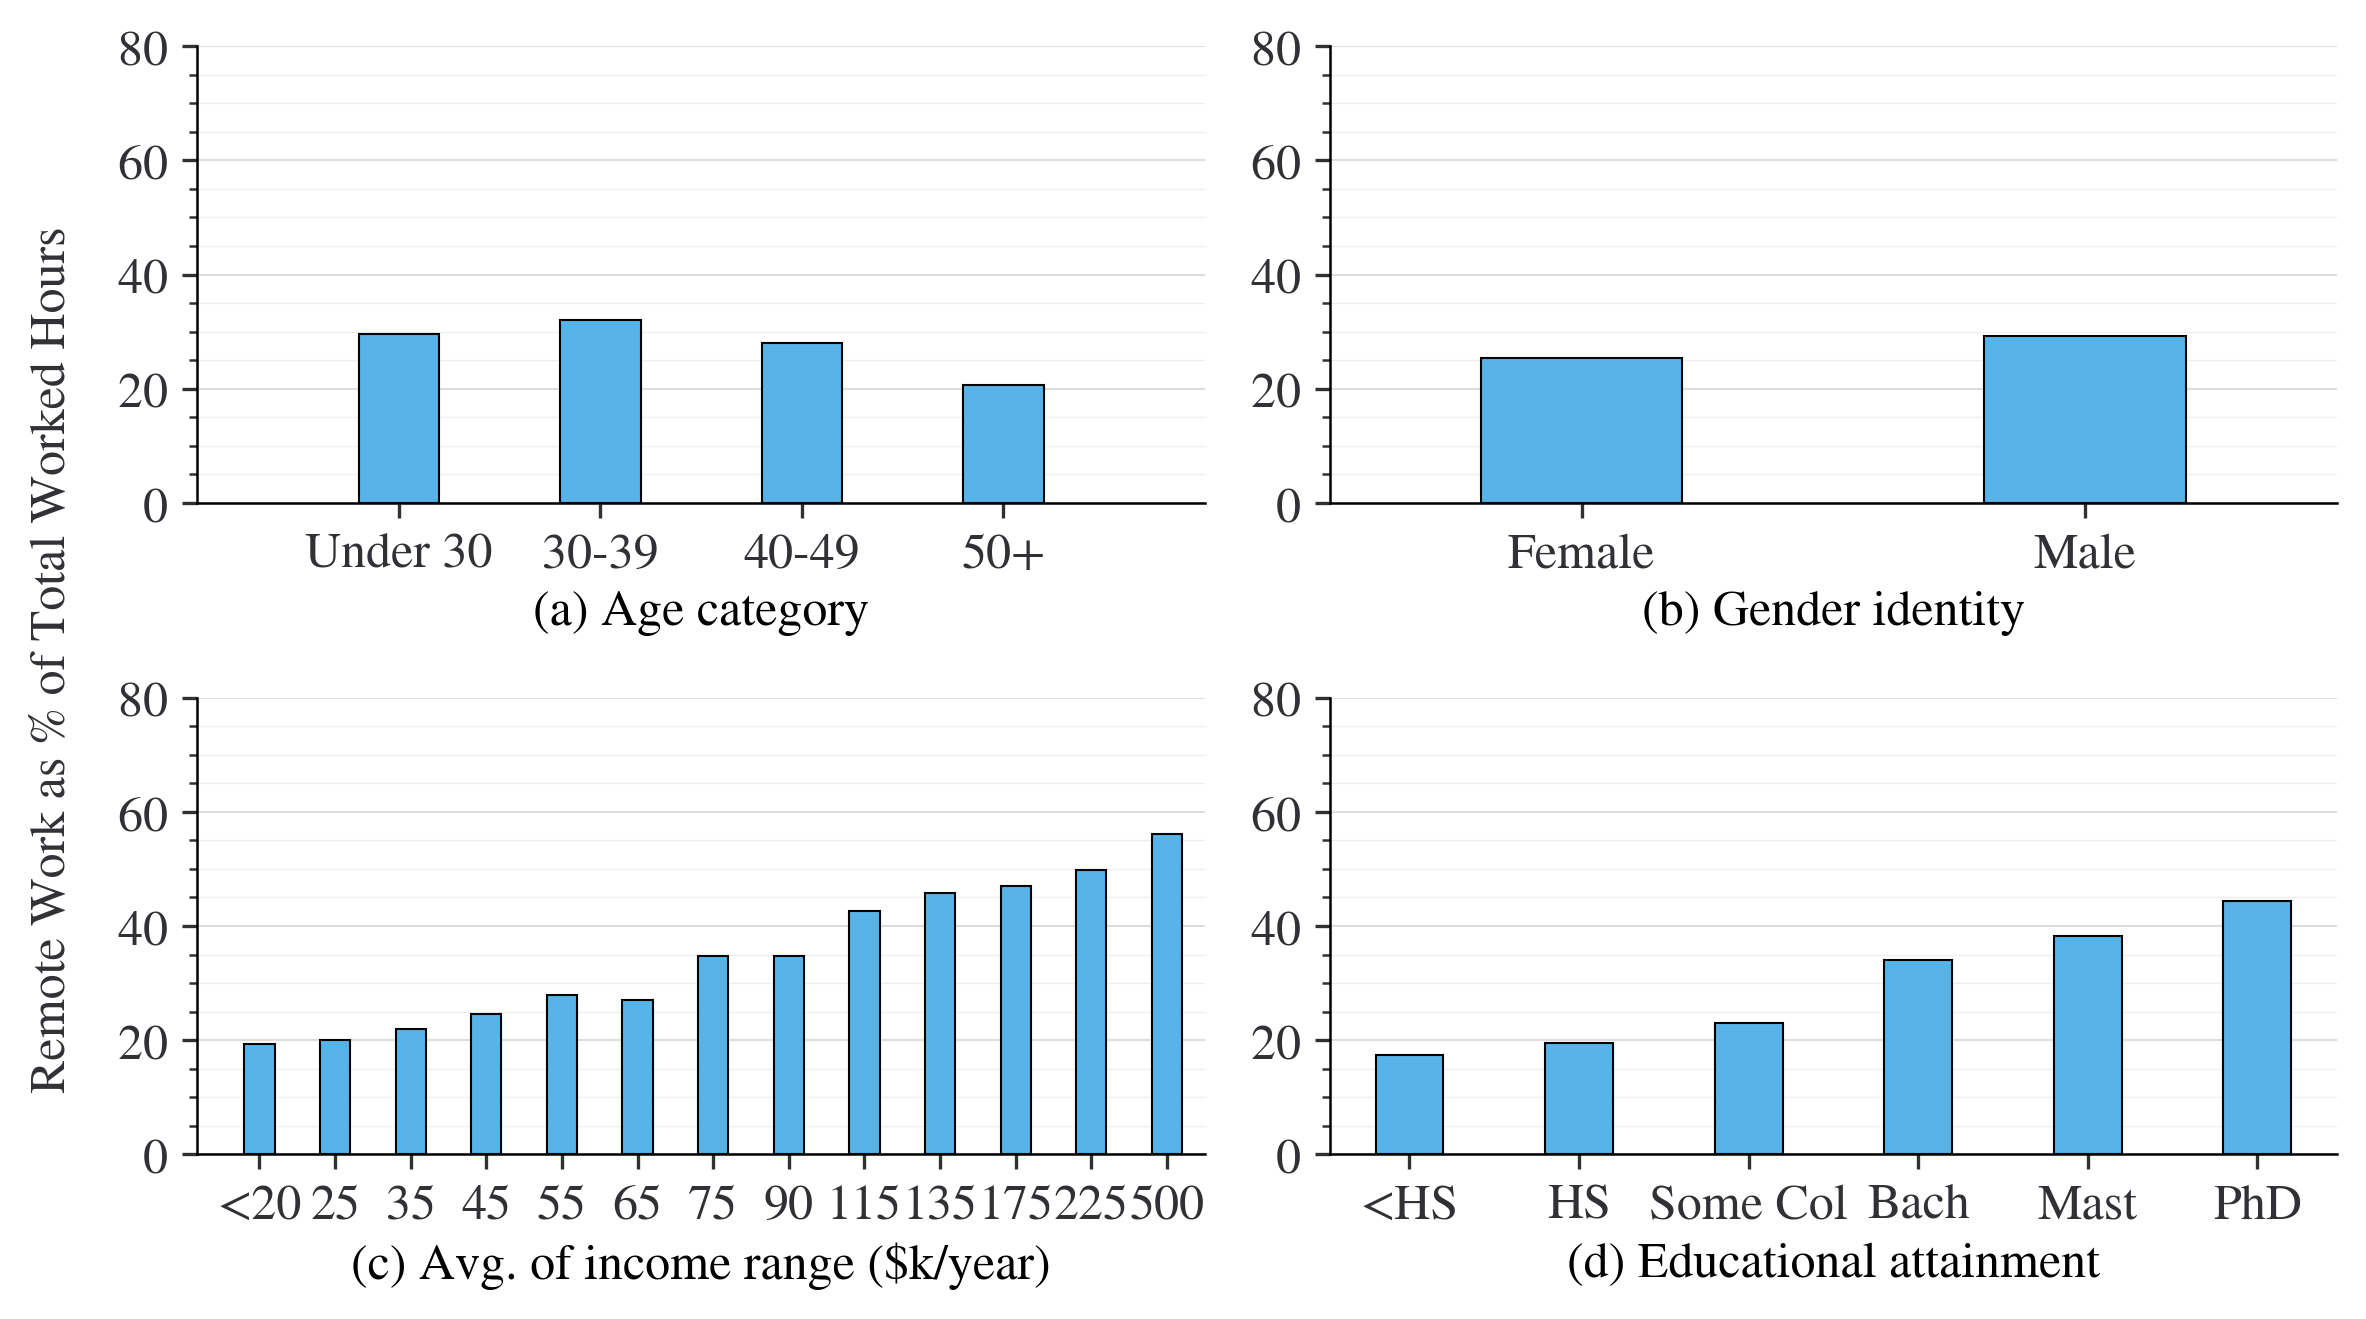

In [8]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Age
wt_res = hf.weighted_avg_group(df, qcol, 'agebin')
axs[0,0] = hf.plot_column(list(wt_res.index), list(wt_res),
            xlabel='(a) Age category', 
            ylim=[0, 80], 
            blabels = ld['agebin'],
            ax = axs[0,0])

# Gender
wt_res = hf.weighted_avg_group(df, qcol, 'gender')
axs[0,1] = hf.plot_column(list(wt_res.index), list(wt_res),
            xlabel='(b) Gender identity', 
            ylim=[0, 80], 
            blabels = ['Female', 'Male'],
            ax = axs[0,1])

# Income
wt_res = hf.weighted_avg_group(df, qcol, 'income_cat')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Avg. of income range ($k/year)', 
            ylim=[0, 80], 
            xlim=[None, 12.5],
            blabels = ld['income'], 
            ax = axs[1,0])

# Education
wt_res = hf.weighted_avg_group(df, qcol, 'education')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Educational attainment', 
            ylim=[0, 80], 
            blabels = ld['educ'],
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1b. Job Characteristics

Sample size: 69238
Sample size: 6322
Sample size: 92462
Sample size: 102990


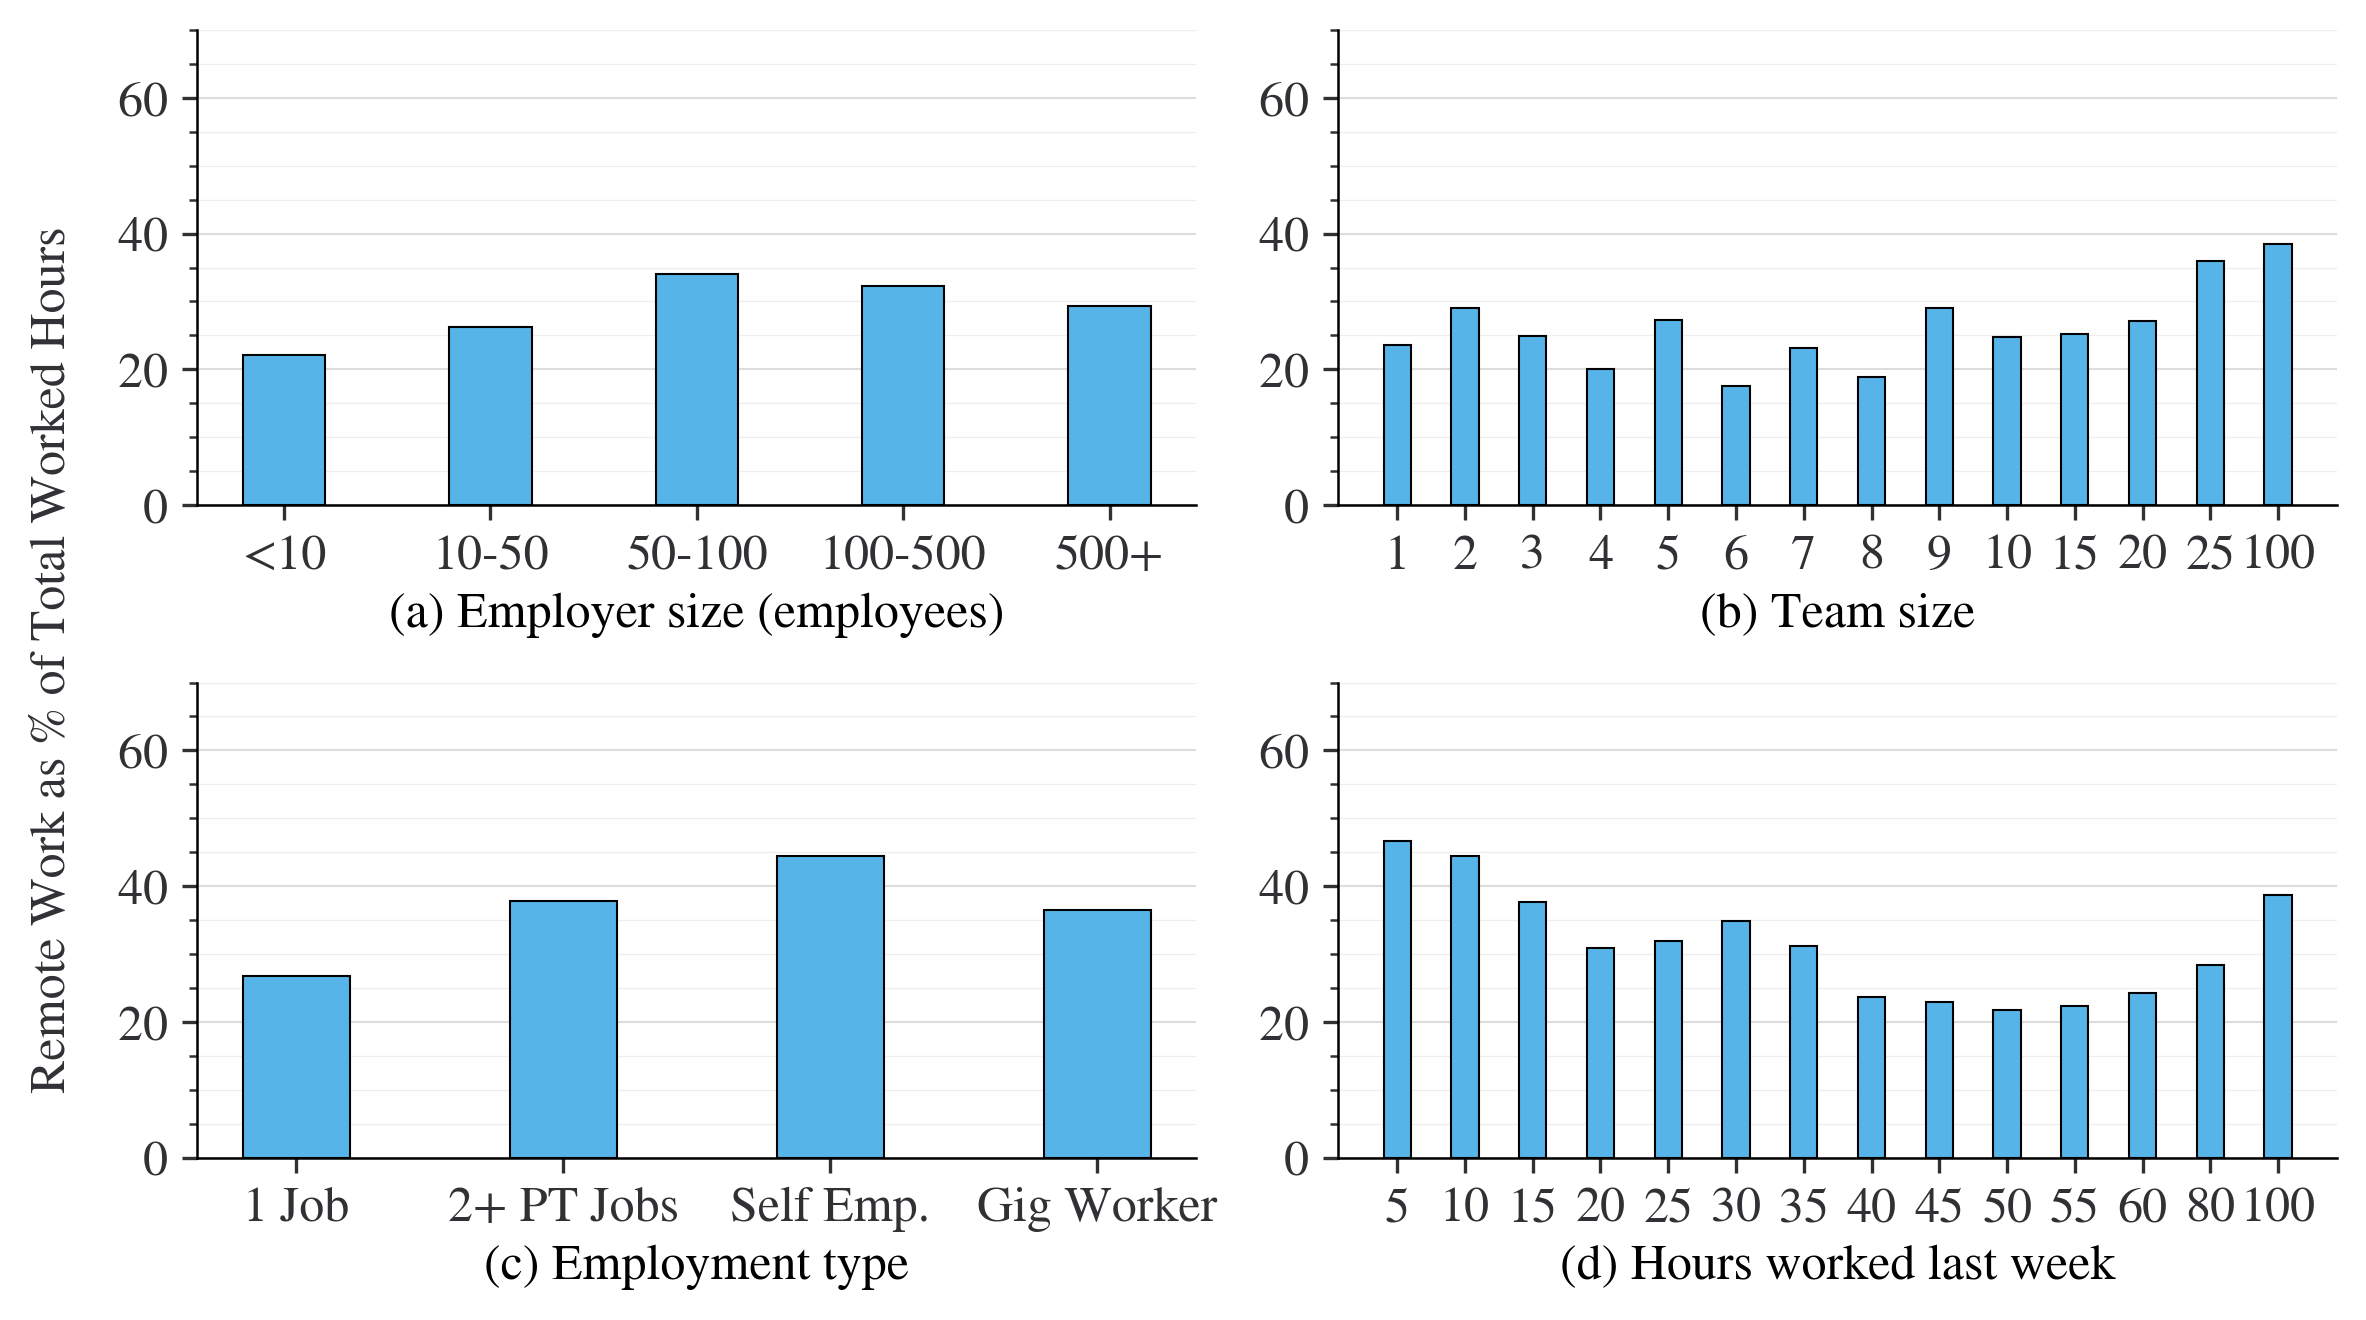

In [9]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Employer Size
wt_res = hf.weighted_avg_group(df, qcol, 'employer_sizecat')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Employer size (employees)', 
            ylim=[0, 70], 
            blabels = ld['emp_size'],
            ax = axs[0,0])

# Team Size
wt_res = hf.weighted_avg_group(df, qcol, 'teamsize_bins')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Team size', 
            ylim=[0, 70], 
            ax = axs[0,1])

# Employment Type
wt_res = hf.weighted_avg_group(df, qcol, 'self_employment')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Employment type', 
            ylim=[0, 70], 
            blabels = ['1 Job', '2+ PT Jobs', 'Self Emp.', 'Gig Worker'], 
            ax = axs[1,0])

# Worked hours last week
wt_res = hf.weighted_avg_group(df, qcol, 'workhours_bins')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Hours worked last week', 
            ylim=[0, 70], 
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1c. Task Characteristics

Sample size: 23501
Sample size: 6897
Sample size: 7868
Sample size: 6047


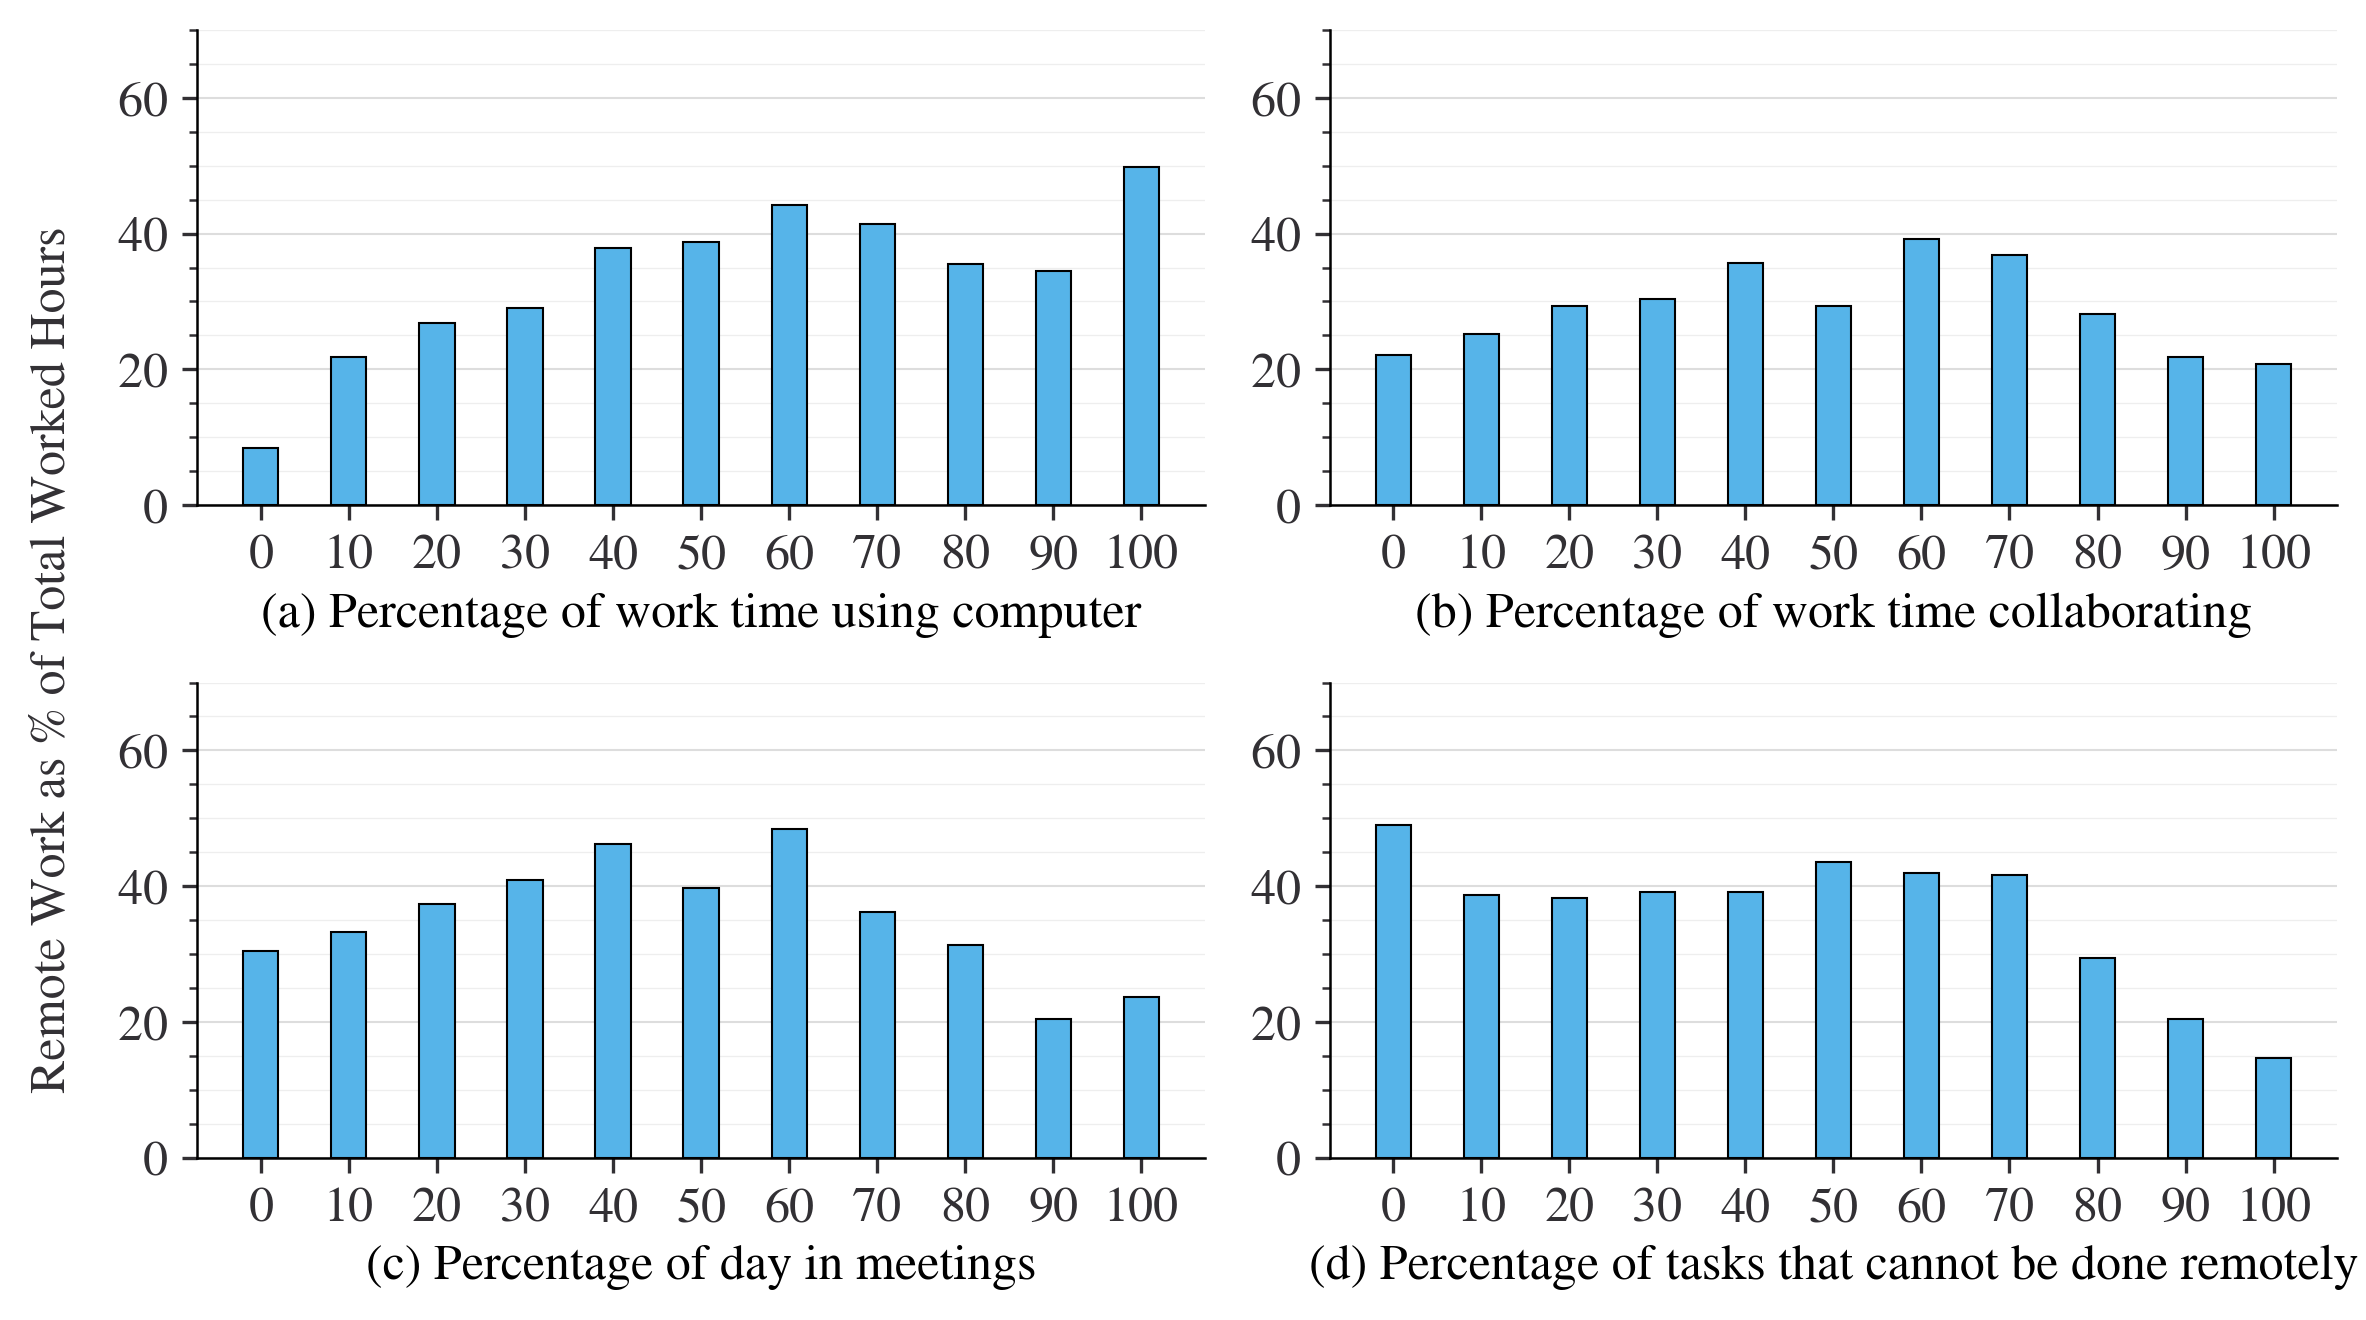

In [10]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Computer Percent
wt_res = hf.weighted_avg_group(df, qcol, 'compuse_bins')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Percentage of work time using computer', 
            ylim=[0, 70], 
            ax = axs[0,0])

# Collaboration Percent
wt_res = hf.weighted_avg_group(df, qcol, 'collaboration_bins')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Percentage of work time collaborating', 
            ylim=[0, 70], 
            ax = axs[0,1])

# Percent meetings
wt_res = hf.weighted_avg_group(df, qcol, 'meetings_workday_bins')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Percentage of day in meetings', 
            ylim=[0, 70], 
            ax = axs[1,0])

# Not remoteable
wt_res = hf.weighted_avg_group(df, qcol, 'nonremoteable_bins')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Percentage of tasks that cannot be done remotely', 
            ylim=[0, 70], 
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1d. WFH Policy

Sample size: 3238
Sample size: 29657
Sample size: 6963
Sample size: 10673


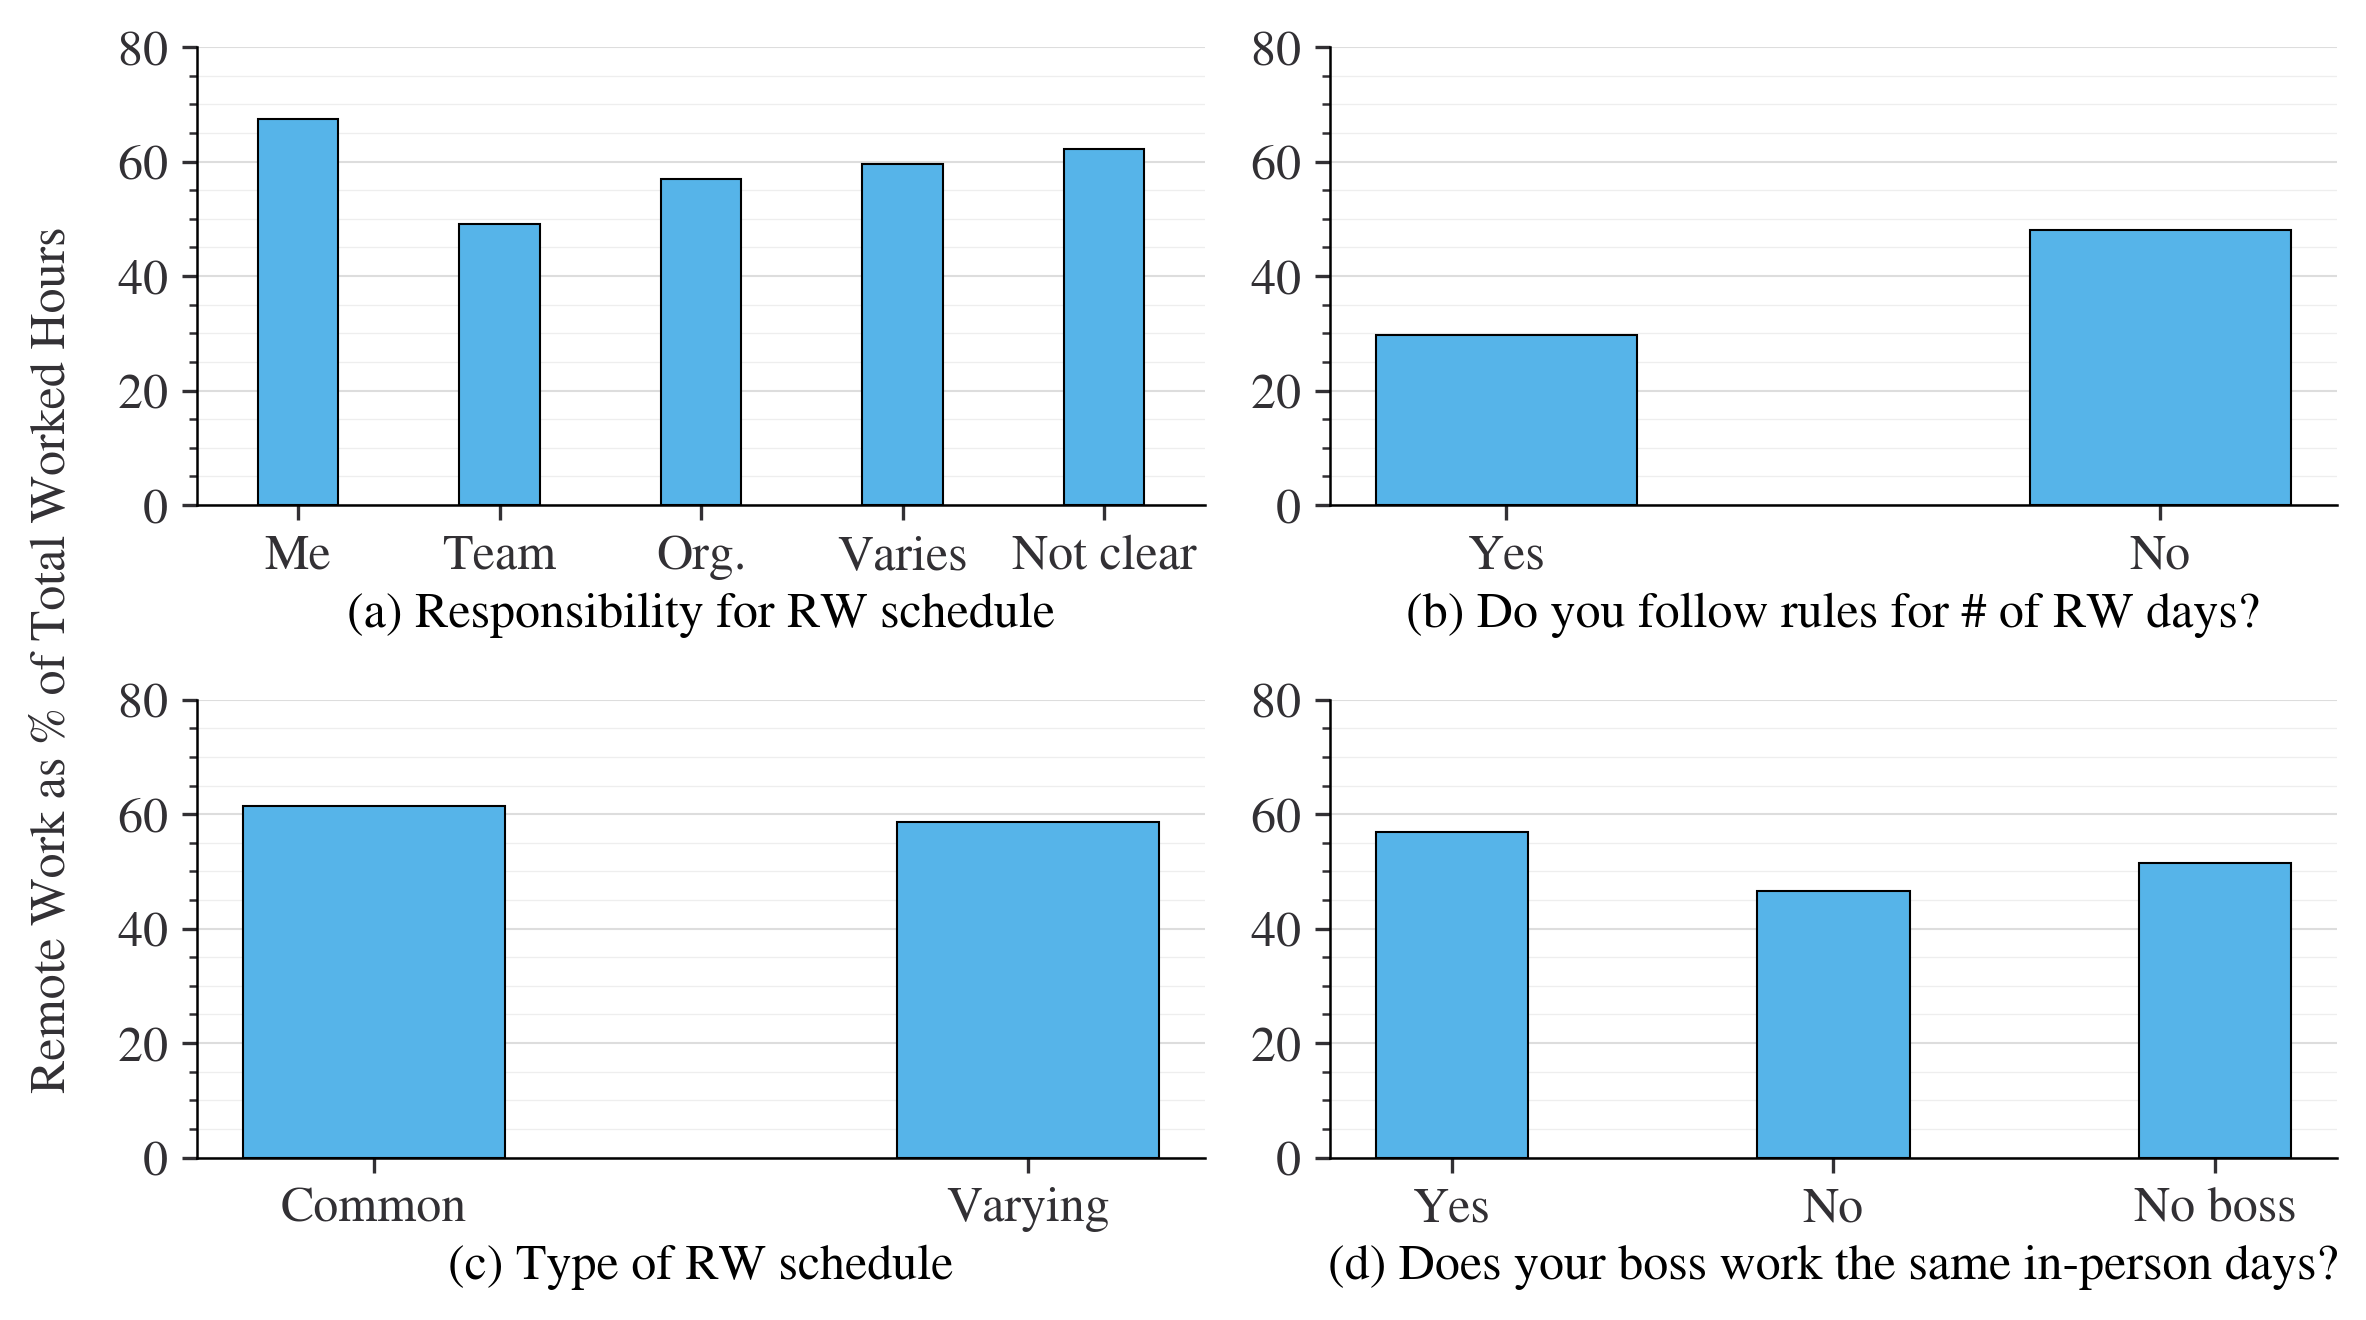

In [11]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Who decides
wt_res = hf.weighted_avg_group(df, qcol, 'who_decides_wfhdays')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Responsibility for RW schedule', 
            xlim=[-0.5, 4.5],
            ylim=[0, 80], 
            blabels=ld['whosets'],
            ax = axs[0,0])

# Following boss' plan
wt_res = hf.weighted_avg_group(df, qcol, 'employer_days_meet')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Do you follow rules for # of RW days?', 
            blabels = ['Yes', 'No'],
            ylim=[0, 80], 
            ax = axs[0,1])

# Common or varying
wt_res = hf.weighted_avg_group(df, qcol, 'common_varying_sched')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Type of RW schedule', 
            ylim=[0, 80], 
            blabels = ['Common', 'Varying'],
            ax = axs[1,0])

# Coordinating with boss
wt_res = hf.weighted_avg_group(df, qcol, 'boss_wfh_samedays')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Does your boss work the same in-person days?', 
            ylim=[0, 80], 
            blabels = ['Yes', 'No', 'No boss'],
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1e. WFH Attitude

Sample size: 83190
Sample size: 2676
Sample size: 5843
Sample size: 3044


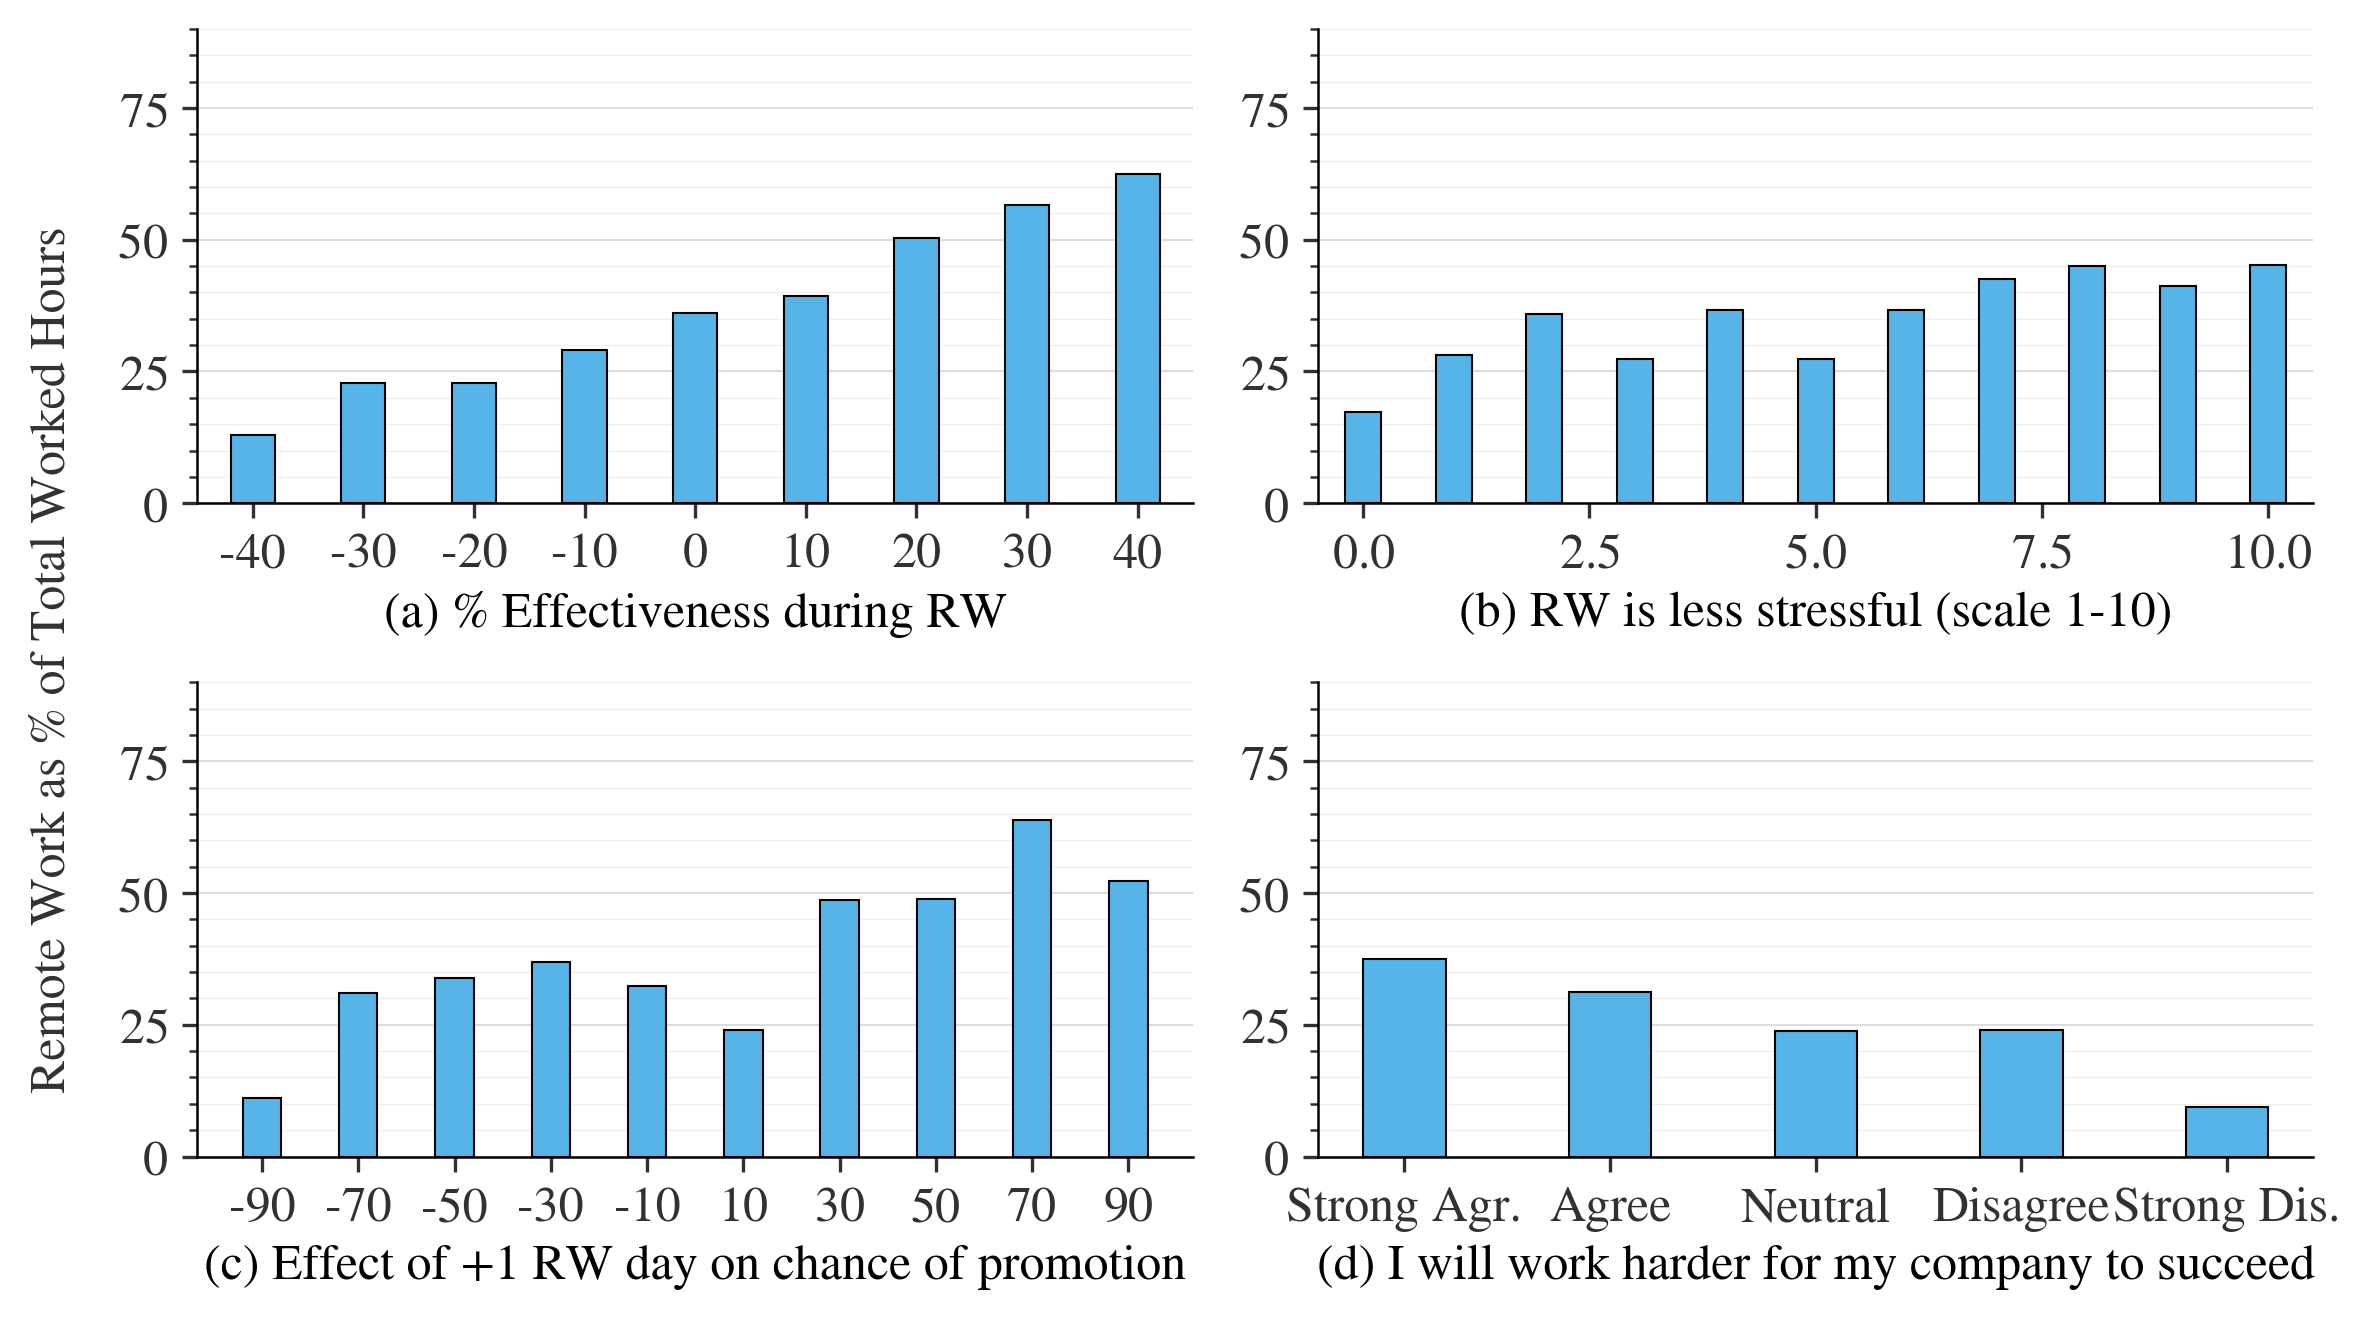

In [12]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Perceived Effectiveness
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_eff_COVID_bins')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) % Effectiveness during RW', 
            xlim = [0.5, 9.5],
            ylim=[0, 90], 
            ax = axs[0,0])

# Less stressful
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_less_stress')
axs[0,1] = hf.plot_column([int(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) RW is less stressful (scale 1-10)', 
            ylim=[0, 90], 
            xlim=[-0.5, 10.5],
            ax = axs[0,1])

# Promotion issues
wt_res = hf.weighted_avg_group(df, qcol, 'prom_eff_bins')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Effect of +1 RW day on chance of promotion', 
            ylim=[0, 90], 
            ax = axs[1,0])

# I want my firm to succeed
wt_res = hf.weighted_avg_group(df, qcol, 'work_firm_succeed')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) I will work harder for my company to succeed', 
            blabels = ['Strong Agr.', 'Agree', 'Neutral', 'Disagree', 'Strong Dis.'],
            ylim=[0, 90], 
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1f. WFH Coordination

Sample size: 2836
Sample size: 2836
Sample size: 7796
Sample size: 8022


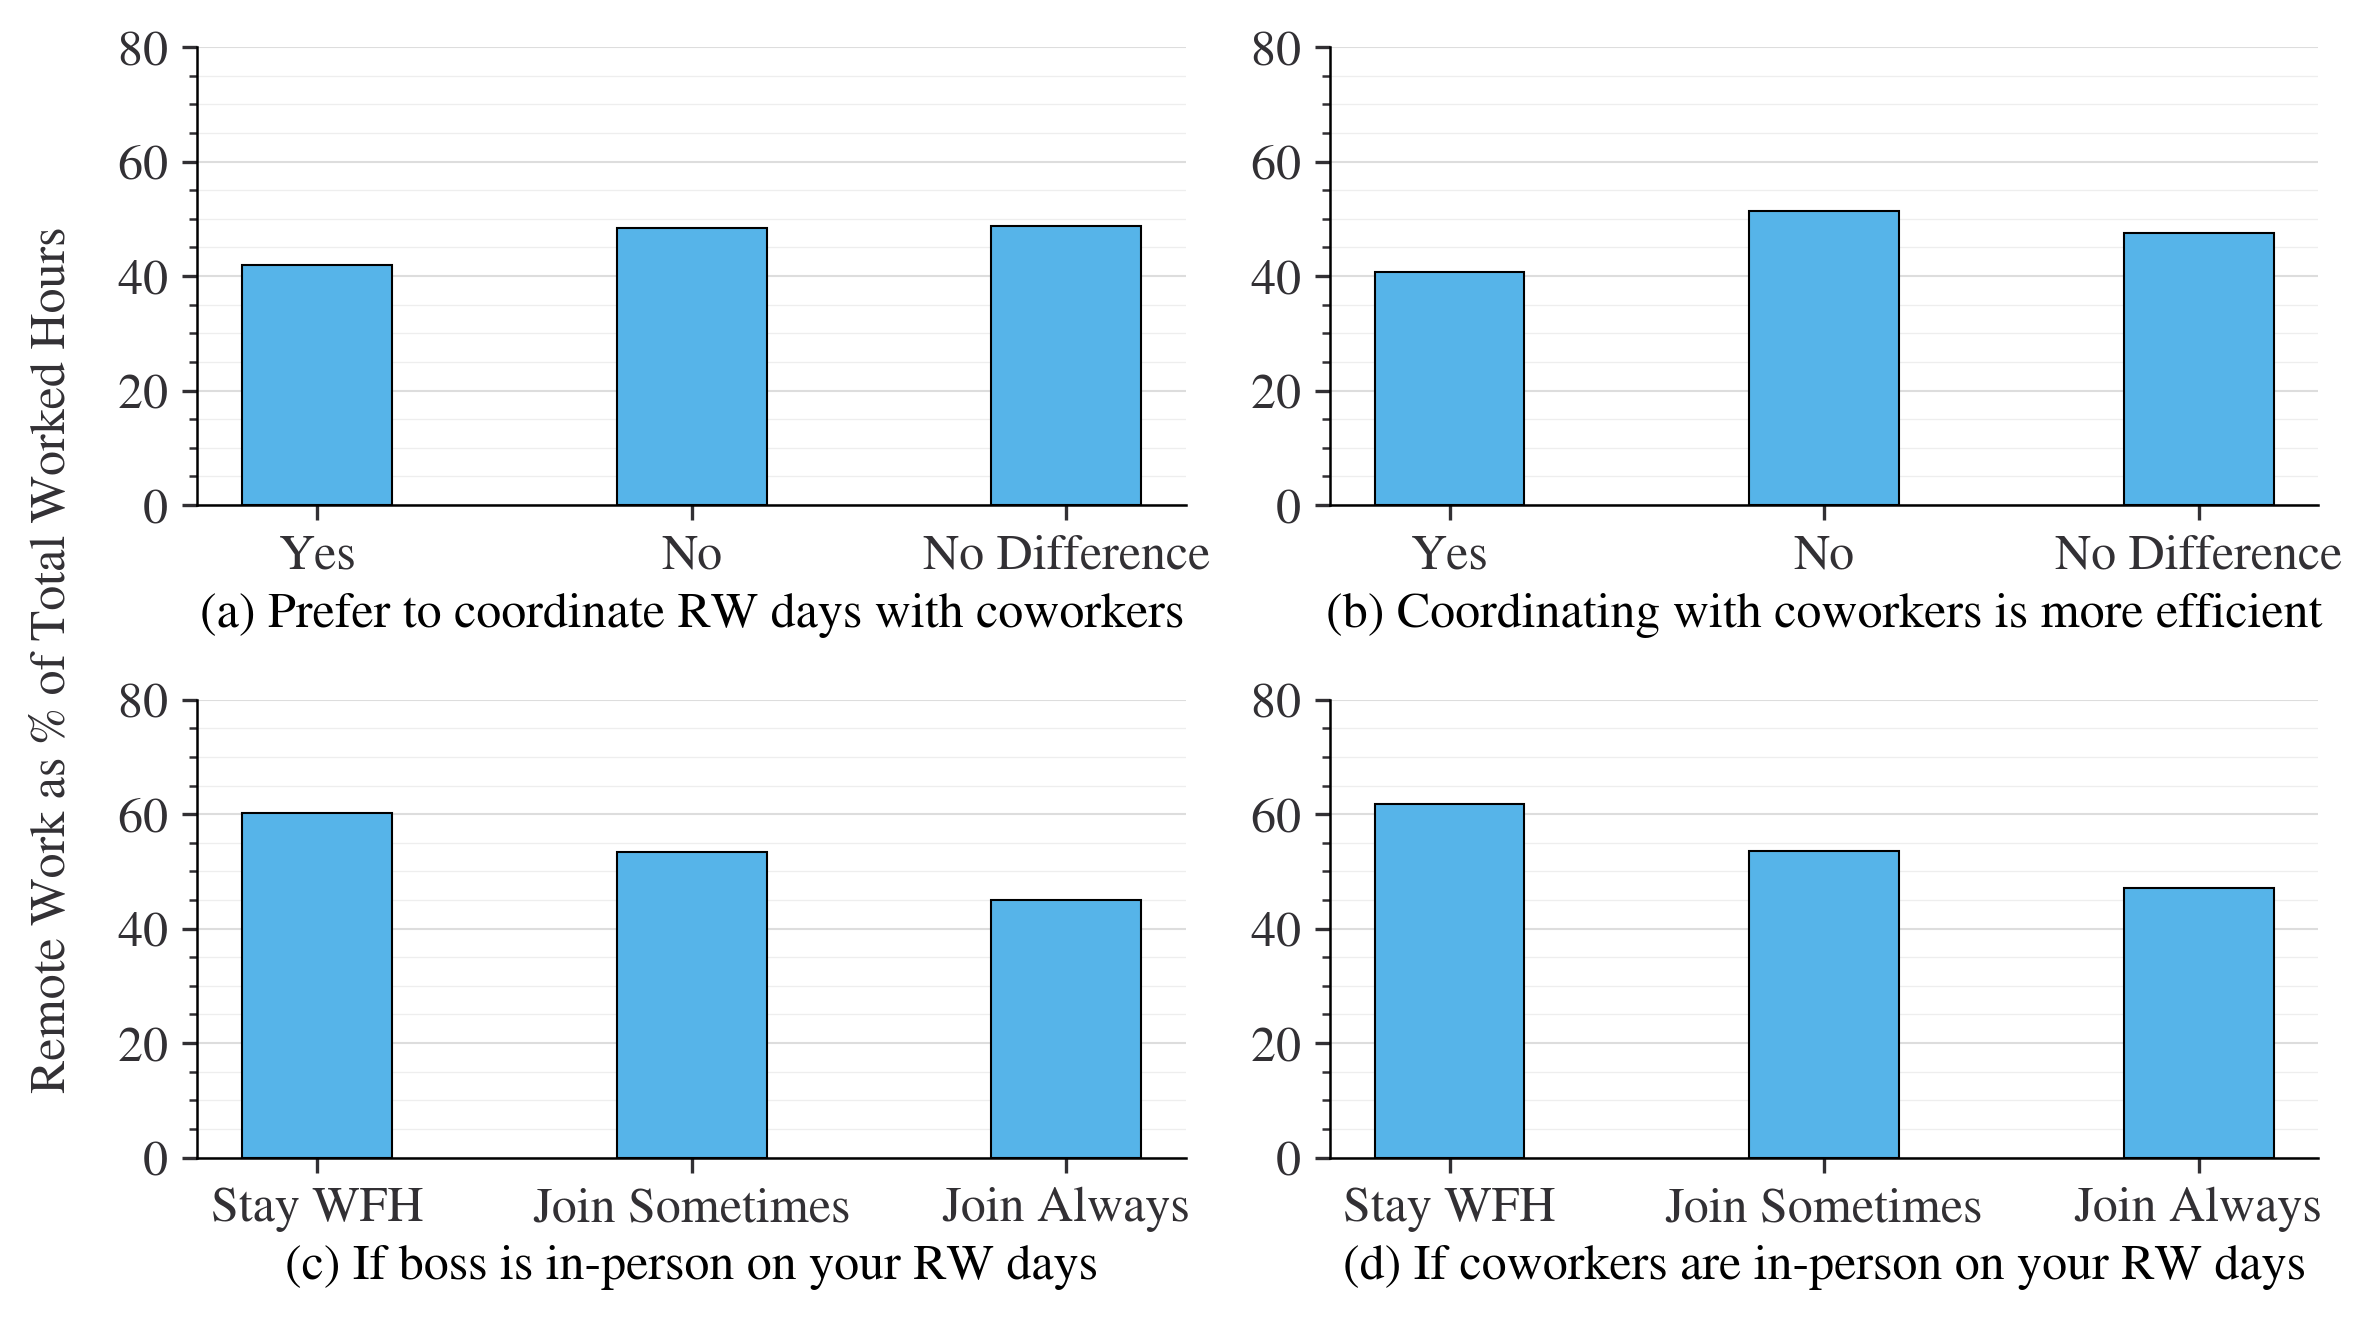

In [13]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Coordinate with employees - prefer
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_coordinate_pref')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Prefer to coordinate RW days with coworkers', 
            ylim=[0, 80], 
            blabels=['Yes', 'No', 'No Difference'],
            ax = axs[0,0])

# Coordinate with employees - effectiveness
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_coordinate_eff')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Coordinating with coworkers is more efficient', 
            ylim=[0, 80], 
            blabels=['Yes', 'No', 'No Difference'],
            ax = axs[0,1])

# Coordinating with boss
wt_res = hf.weighted_avg_group(df, qcol, 'boss_wfh_unravel')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) If boss is in-person on your RW days', 
            ylim=[0, 80], 
            blabels = ['Stay WFH', 'Join Sometimes', 'Join Always'],
            ax = axs[1,0])

# Coordinating with coworkers
wt_res = hf.weighted_avg_group(df, qcol, 'coworkers_wfh_unravel')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) If coworkers are in-person on your RW days', 
            ylim=[0, 80], 
            blabels = ['Stay WFH', 'Join Sometimes', 'Join Always'],
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1g.  Life Priorities

Sample size: 2914
Sample size: 2914
Sample size: 2914
Sample size: 2914


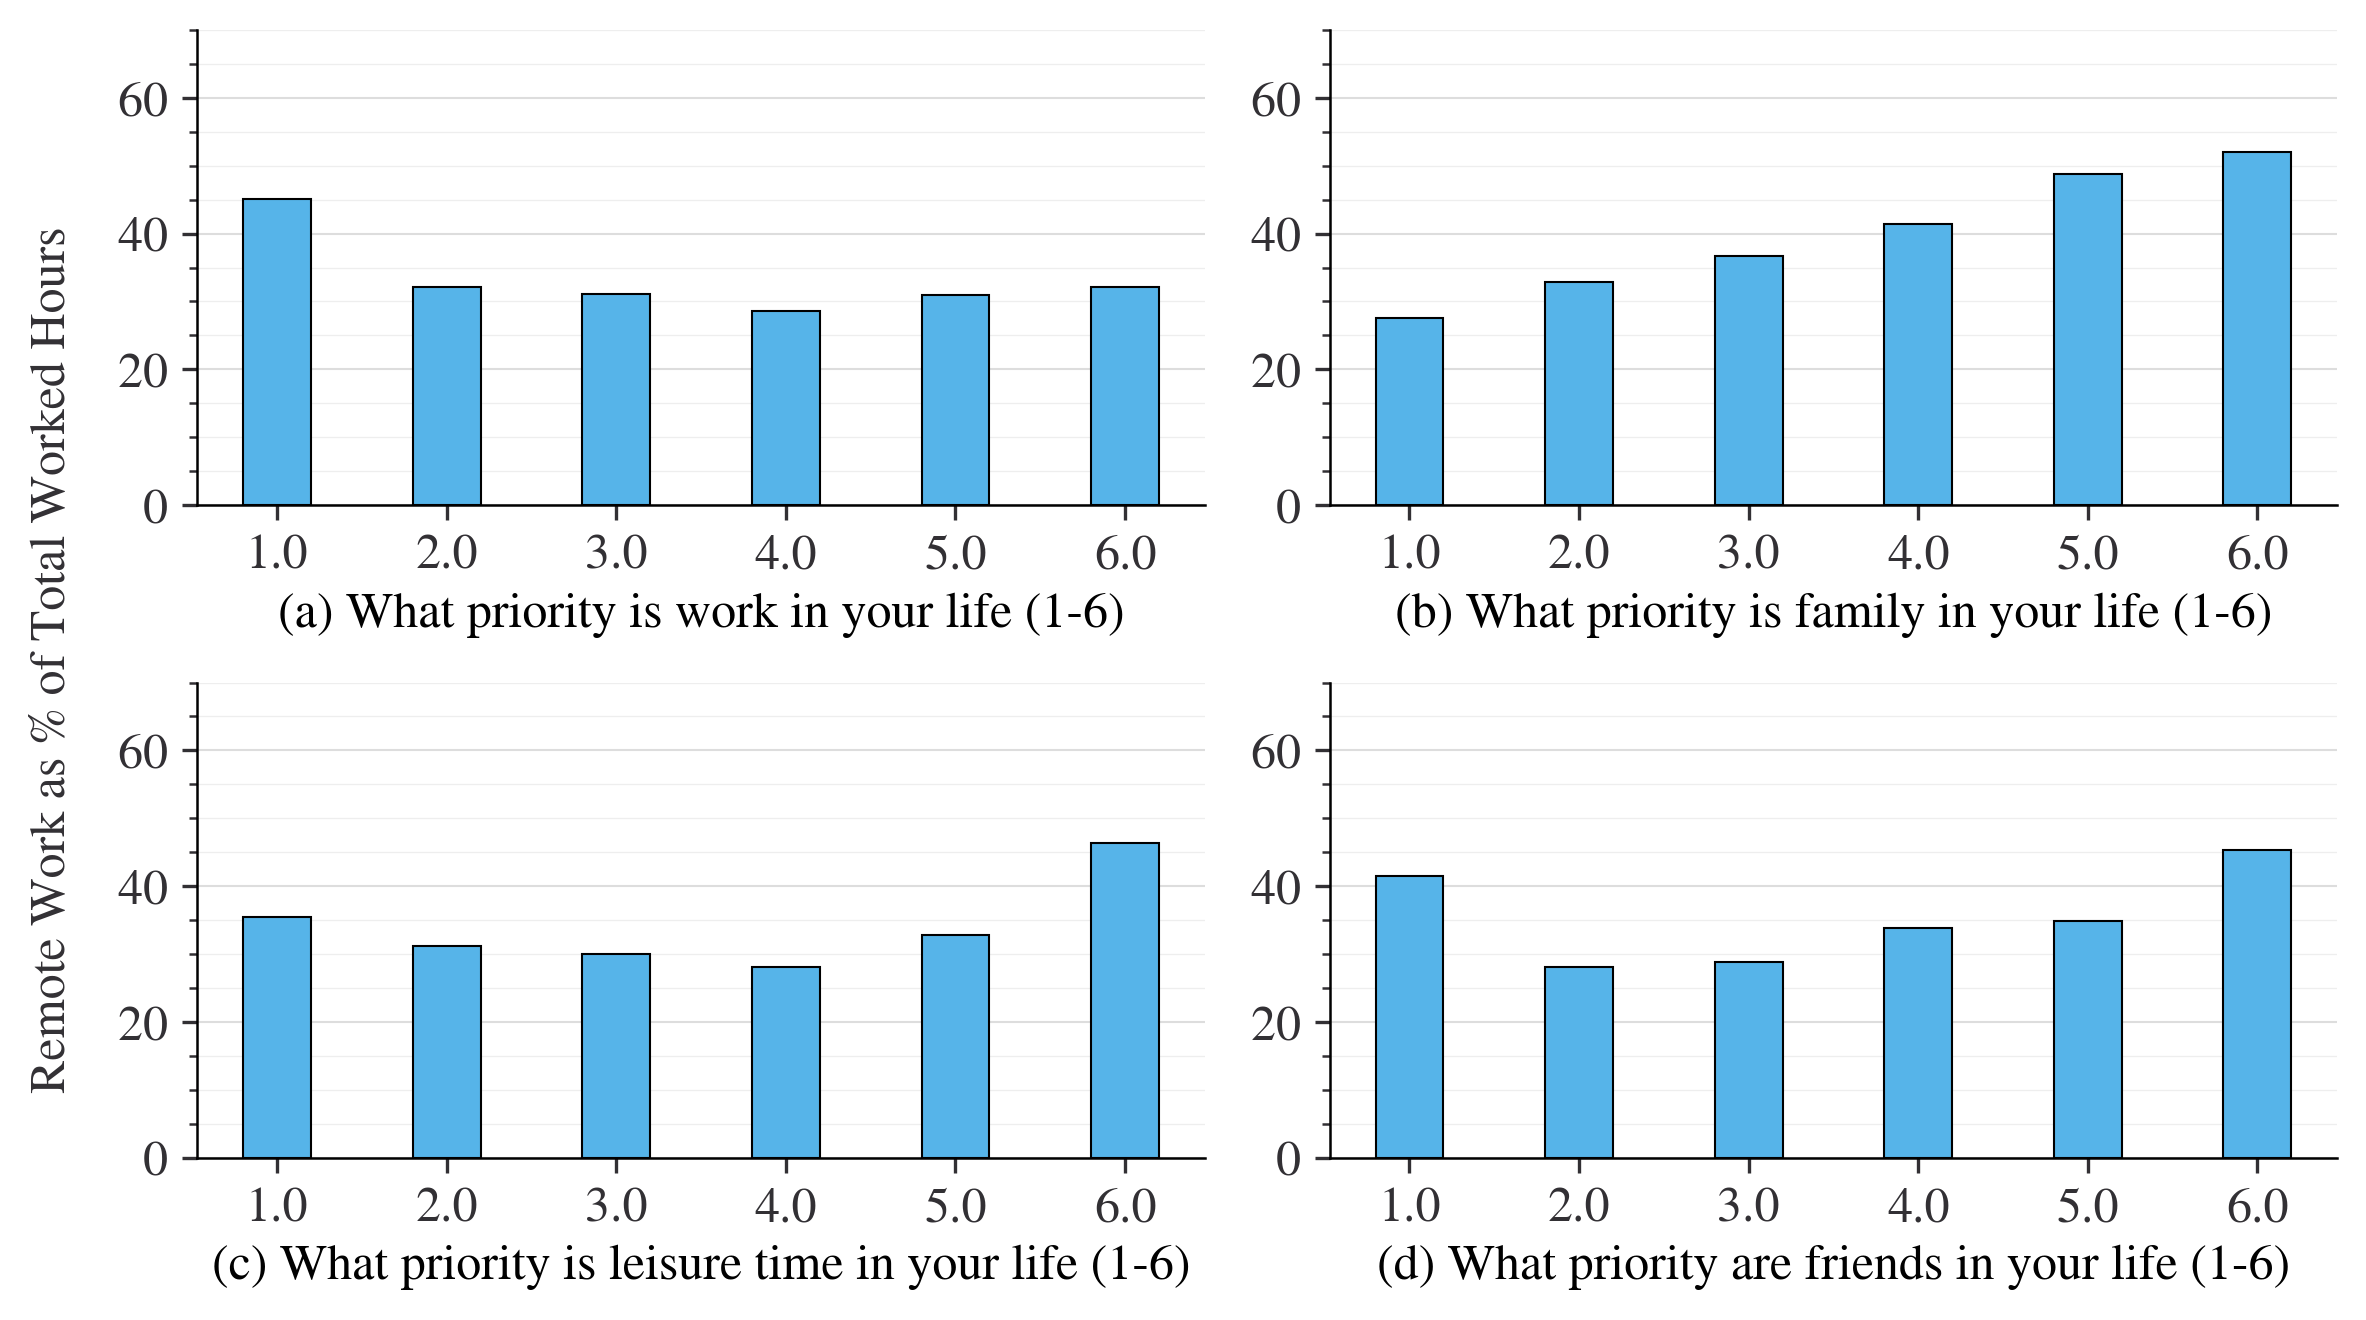

In [14]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Work
wt_res = hf.weighted_avg_group(df, qcol, 'life_rank_work')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) What priority is work in your life (1-6)', 
            ylim=[0, 70], 
            ax = axs[0,0])

# Family
wt_res = hf.weighted_avg_group(df, qcol, 'life_rank_family')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) What priority is family in your life (1-6)', 
            ylim=[0, 70], 
            ax = axs[0,1])

# Leisure
wt_res = hf.weighted_avg_group(df, qcol, 'life_rank_leisure')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) What priority is leisure time in your life (1-6)',  
            ylim=[0, 70], 
            ax = axs[1,0])

# Friends
wt_res = hf.weighted_avg_group(df, qcol, 'life_rank_friends')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) What priority are friends in your life (1-6)',  
            ylim=[0, 70], 
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1h. Top 3 Benefits

Sample size: 26847
Sample size: 26847
Sample size: 26847
Sample size: 26847


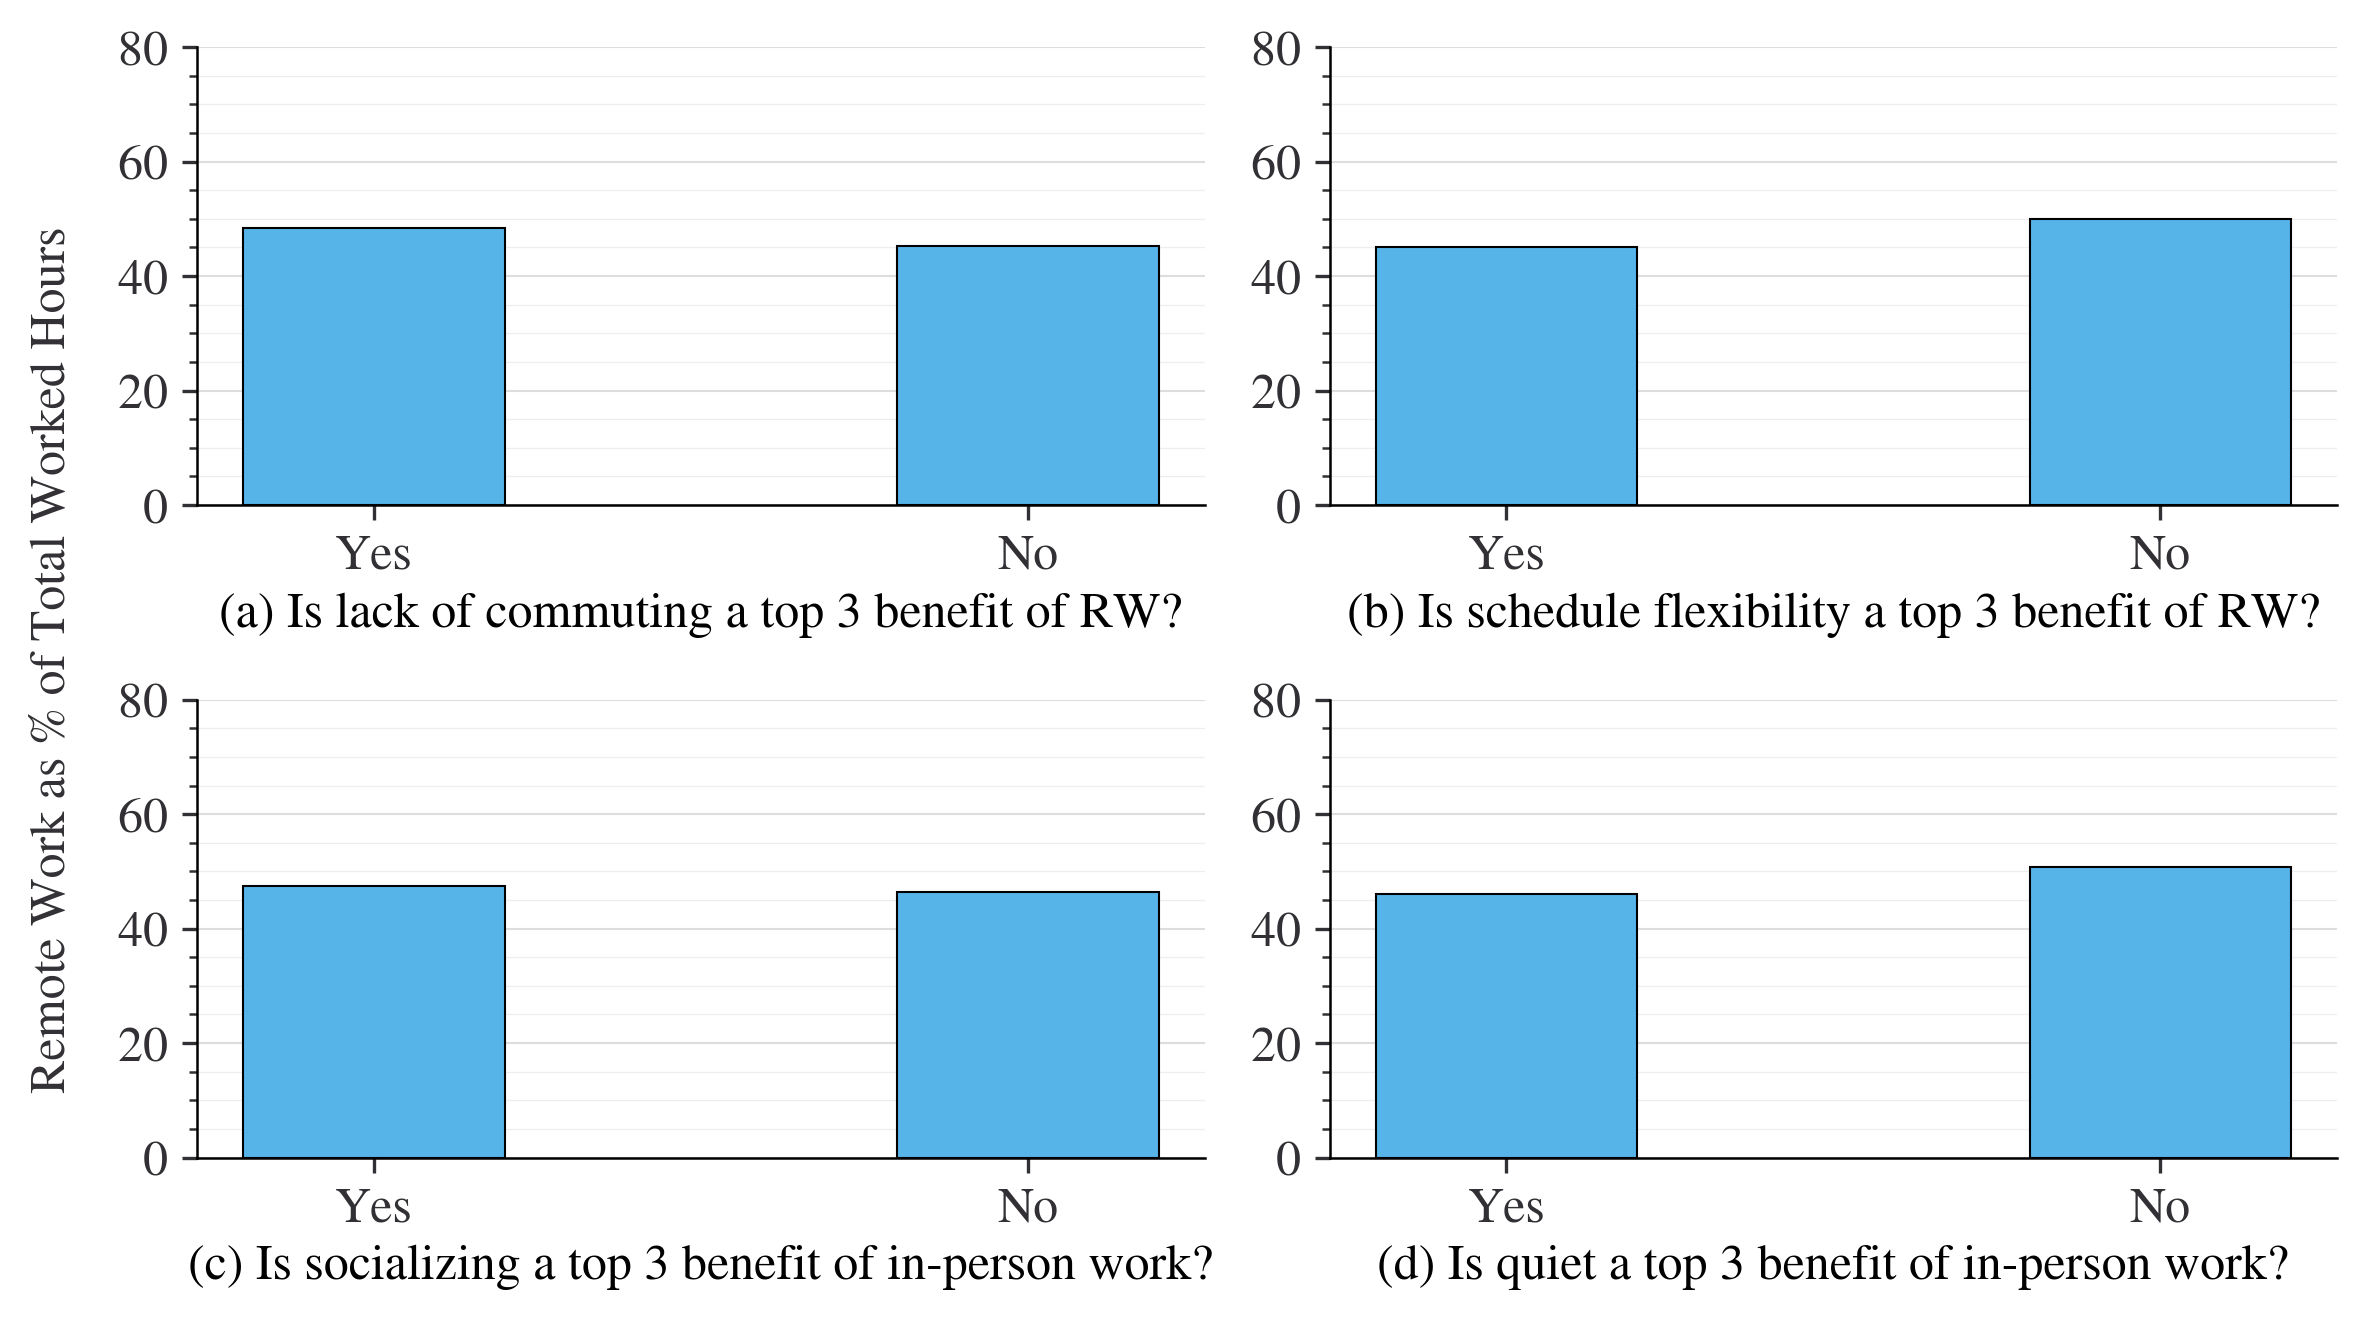

In [15]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Commute
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_top3benefits_commute')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Is lack of commuting a top 3 benefit of RW?', 
            ylim=[0, 80], 
            blabels =['Yes', 'No'],
            ax = axs[0,0])

# Flexibility
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_top3benefits_flex')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Is schedule flexibility a top 3 benefit of RW?', 
            ylim=[0, 80],
            blabels =['Yes', 'No'],
            ax = axs[0,1])

# Socializing
wt_res = hf.weighted_avg_group(df, qcol, 'wbp_top3benefits_social')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Is socializing a top 3 benefit of in-person work?',  
            ylim=[0, 80],
            blabels =['Yes', 'No'],
            ax = axs[1,0])

# Quiet
wt_res = hf.weighted_avg_group(df, qcol, 'wbp_top3benefits_quiet')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Is quiet a top 3 benefit of in-person work?',  
            ylim=[0, 80],
            blabels =['Yes', 'No'],
            ax = axs[1,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

#### 1i. Household Characteristics

Sample size: 112603
Sample size: 119565
Sample size: 103092
Sample size: 113099
Sample size: 42423
Sample size: 72054


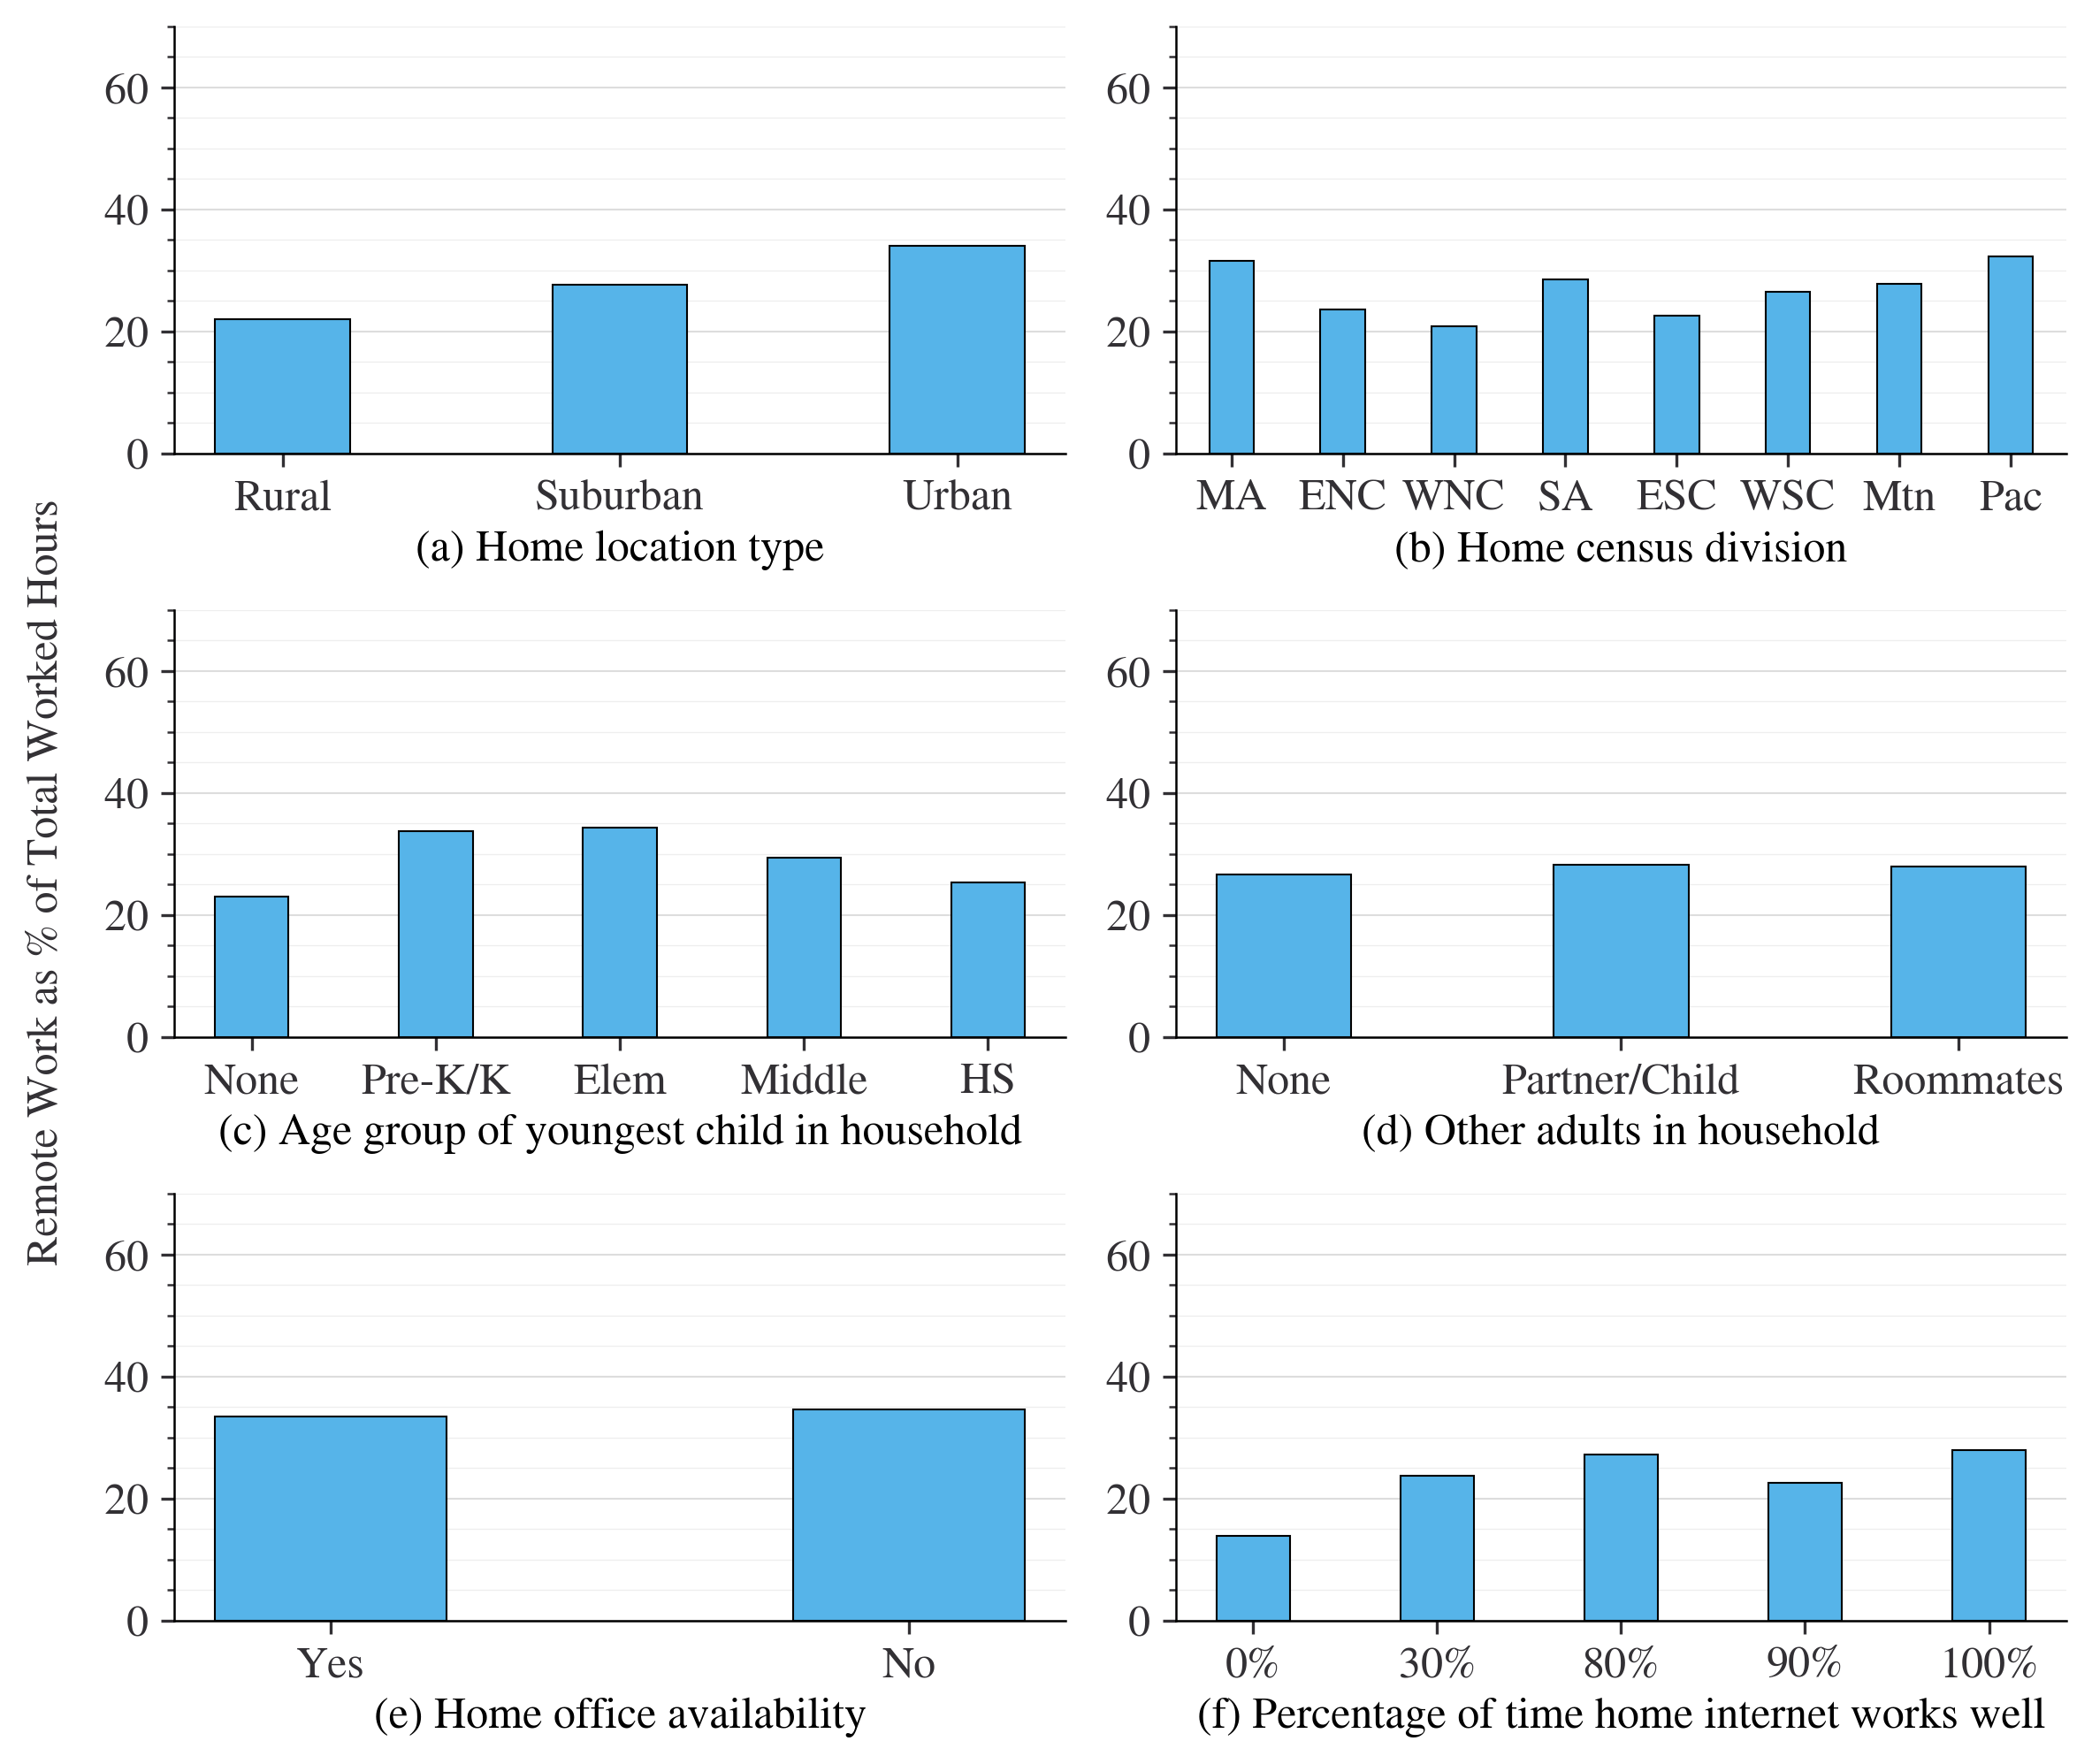

In [16]:
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(figsize[0], figsize[1]*1.5))

# Commute
wt_res = hf.weighted_avg_group(df, qcol, 'home_pop_category')
axs[0,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(a) Home location type', 
            ylim=[0, 70], 
            ax = axs[0,0])

# Flexibility
wt_res = hf.weighted_avg_group(df, qcol, 'censusdivision')
axs[0,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(b) Home census division', 
            ylim=[0, 70],
            xlim=[0.5,8.5],
            blabels =ld['censusdiv'],
            ax = axs[0,1])

# Socializing
wt_res = hf.weighted_avg_group(df, qcol, 'live_children')
axs[1,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(c) Age group of youngest child in household',  
            ylim=[0, 70],
            blabels =['None', 'Pre-K/K', 'Elem', 'Middle', 'HS'],
            ax = axs[1,0])

# Quiet
wt_res = hf.weighted_avg_group(df, qcol, 'live_adults')
axs[1,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(d) Other adults in household',  
            ylim=[0, 70],
            blabels =['None', 'Partner/Child', 'Roommates'],
            ax = axs[1,1])

# Socializing
wt_res = hf.weighted_avg_group(df, qcol, 'wfh_ownroom_notbed')
axs[2,0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(e) Home office availability',  
            ylim=[0, 70],
            blabels =['Yes', 'No'],
            ax = axs[2,0])

# Quiet
wt_res = hf.weighted_avg_group(df, qcol, 'internet_quality_quant')
axs[2,1] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            xlabel='(f) Percentage of time home internet works well',  
            ylim=[0, 70],
            blabels =['0%', '30%', '80%', '90%', '100%'],
            ax = axs[2,1])

fig.supylabel('Remote Work as % of Total Worked Hours')
fig.tight_layout();

### 2: Third Place Share of Hours

Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364


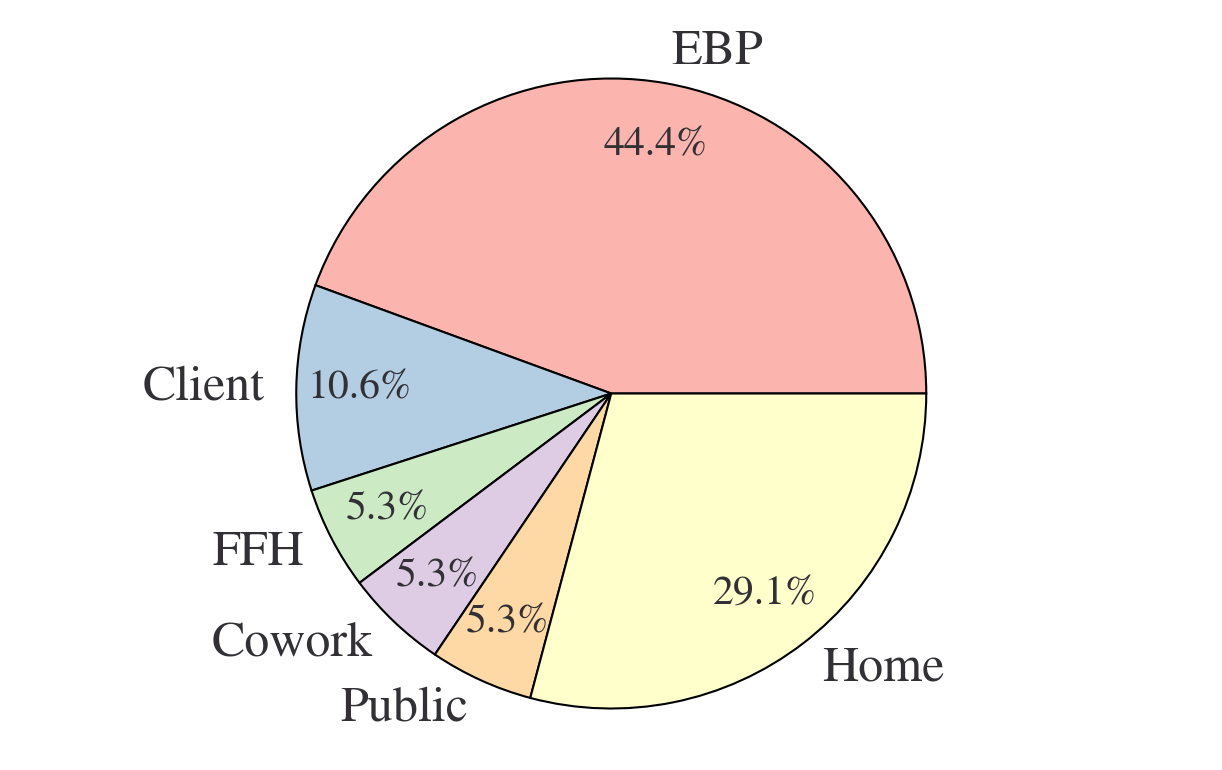

In [18]:
# Note: cannot compare individual responses since they're on different waves
# Pct of Time
ebp_time_pct = hf.weighted_avg(df, 'worktime_curr_ebp_pct')
client_time_pct = hf.weighted_avg(df, 'worktime_curr_client_pct') 
faf_time_pct = hf.weighted_avg(df, 'worktime_curr_faf_pct') 
home_time_pct = hf.weighted_avg(df, 'worktime_curr_home_pct') 
cowork_time_pct = hf.weighted_avg(df, 'worktime_curr_cowork_pct') 
public_time_pct = hf.weighted_avg(df, 'worktime_curr_public_pct') 
hf.plot_pie([ebp_time_pct, client_time_pct, faf_time_pct, cowork_time_pct, public_time_pct, home_time_pct], 
         ['EBP', 'Client', 'FFH', 'Cowork', 'Public', 'Home']);

Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364


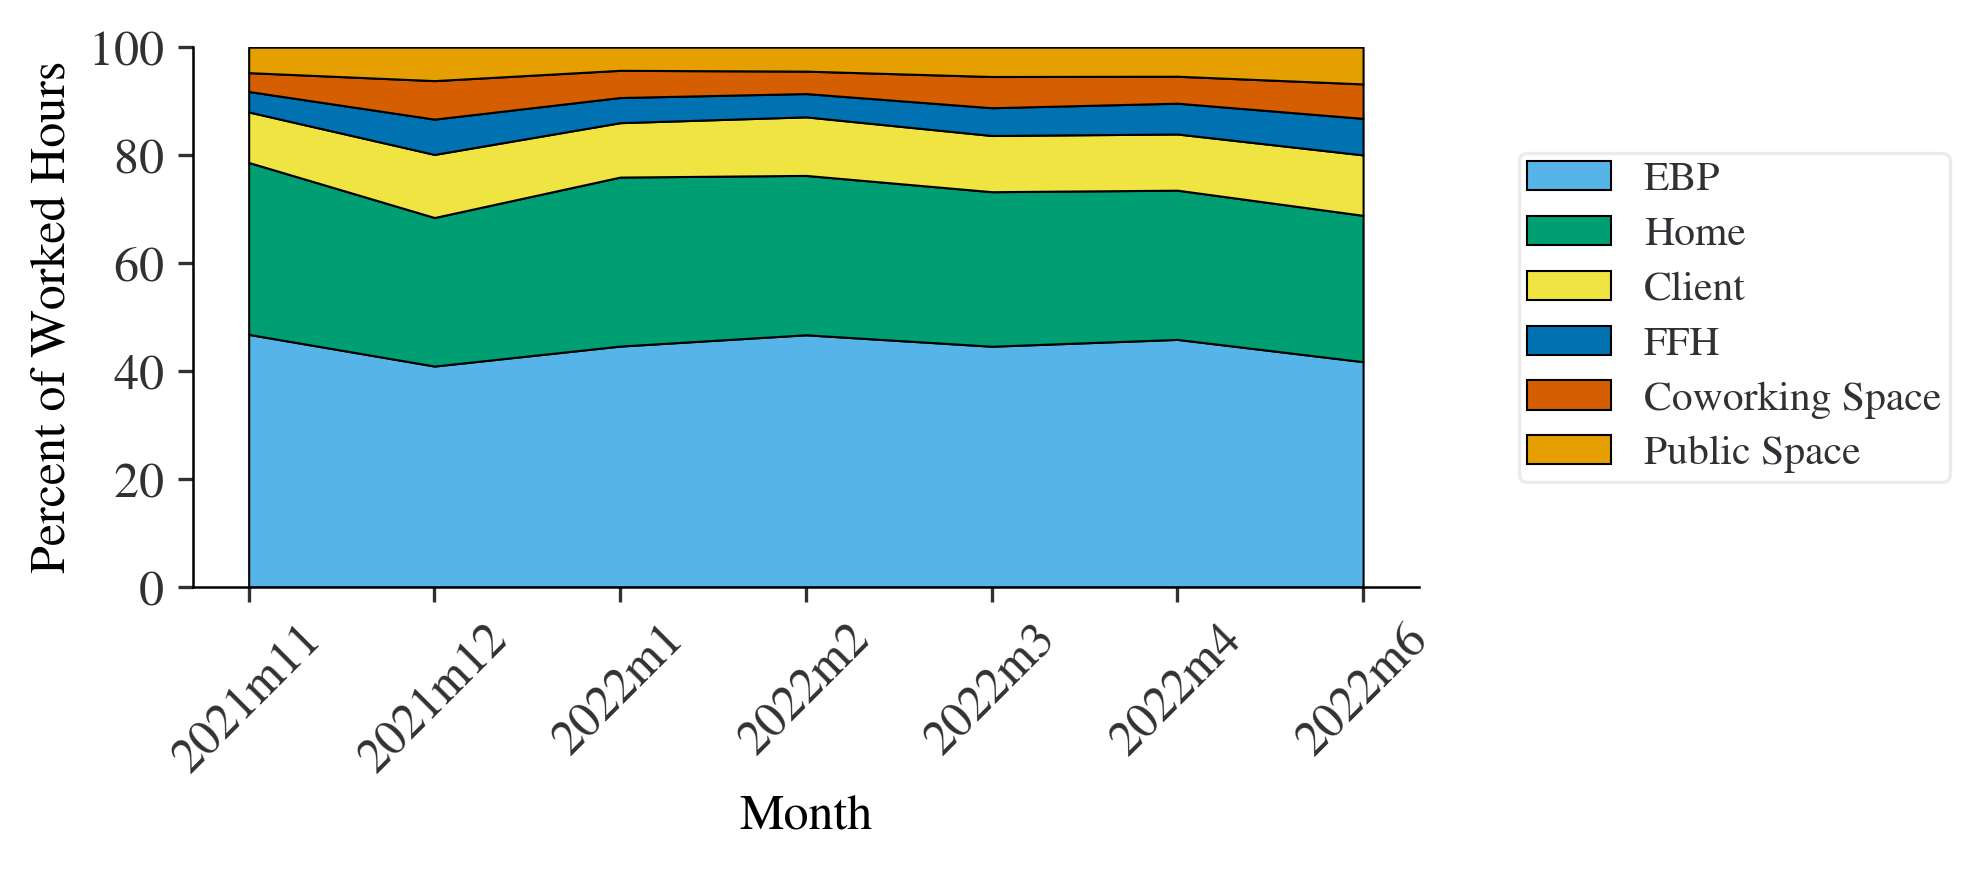

In [20]:
wt_ebp = hf.weighted_month(df, 'worktime_curr_ebp_pct') 
wt_home = hf.weighted_month(df, 'worktime_curr_home_pct') 
wt_client = hf.weighted_month(df, 'worktime_curr_client_pct') 
wt_faf = hf.weighted_month(df, 'worktime_curr_faf_pct') 
wt_cowork = hf.weighted_month(df, 'worktime_curr_cowork_pct') 
wt_public = hf.weighted_month(df, 'worktime_curr_public_pct') 
wt_res = pd.concat([wt_ebp, wt_home, wt_client, wt_faf, wt_cowork, wt_public], axis=1)
wt_res.columns = ['EBP','Home','Client','FFH', 'Coworking Space', 'Public Space']
hf.plot_area(wt_res, bbox=[1.45, 0.5], xlabel='Month', ylabel='Percent of Worked Hours');

#### 2a. By demographics

Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364


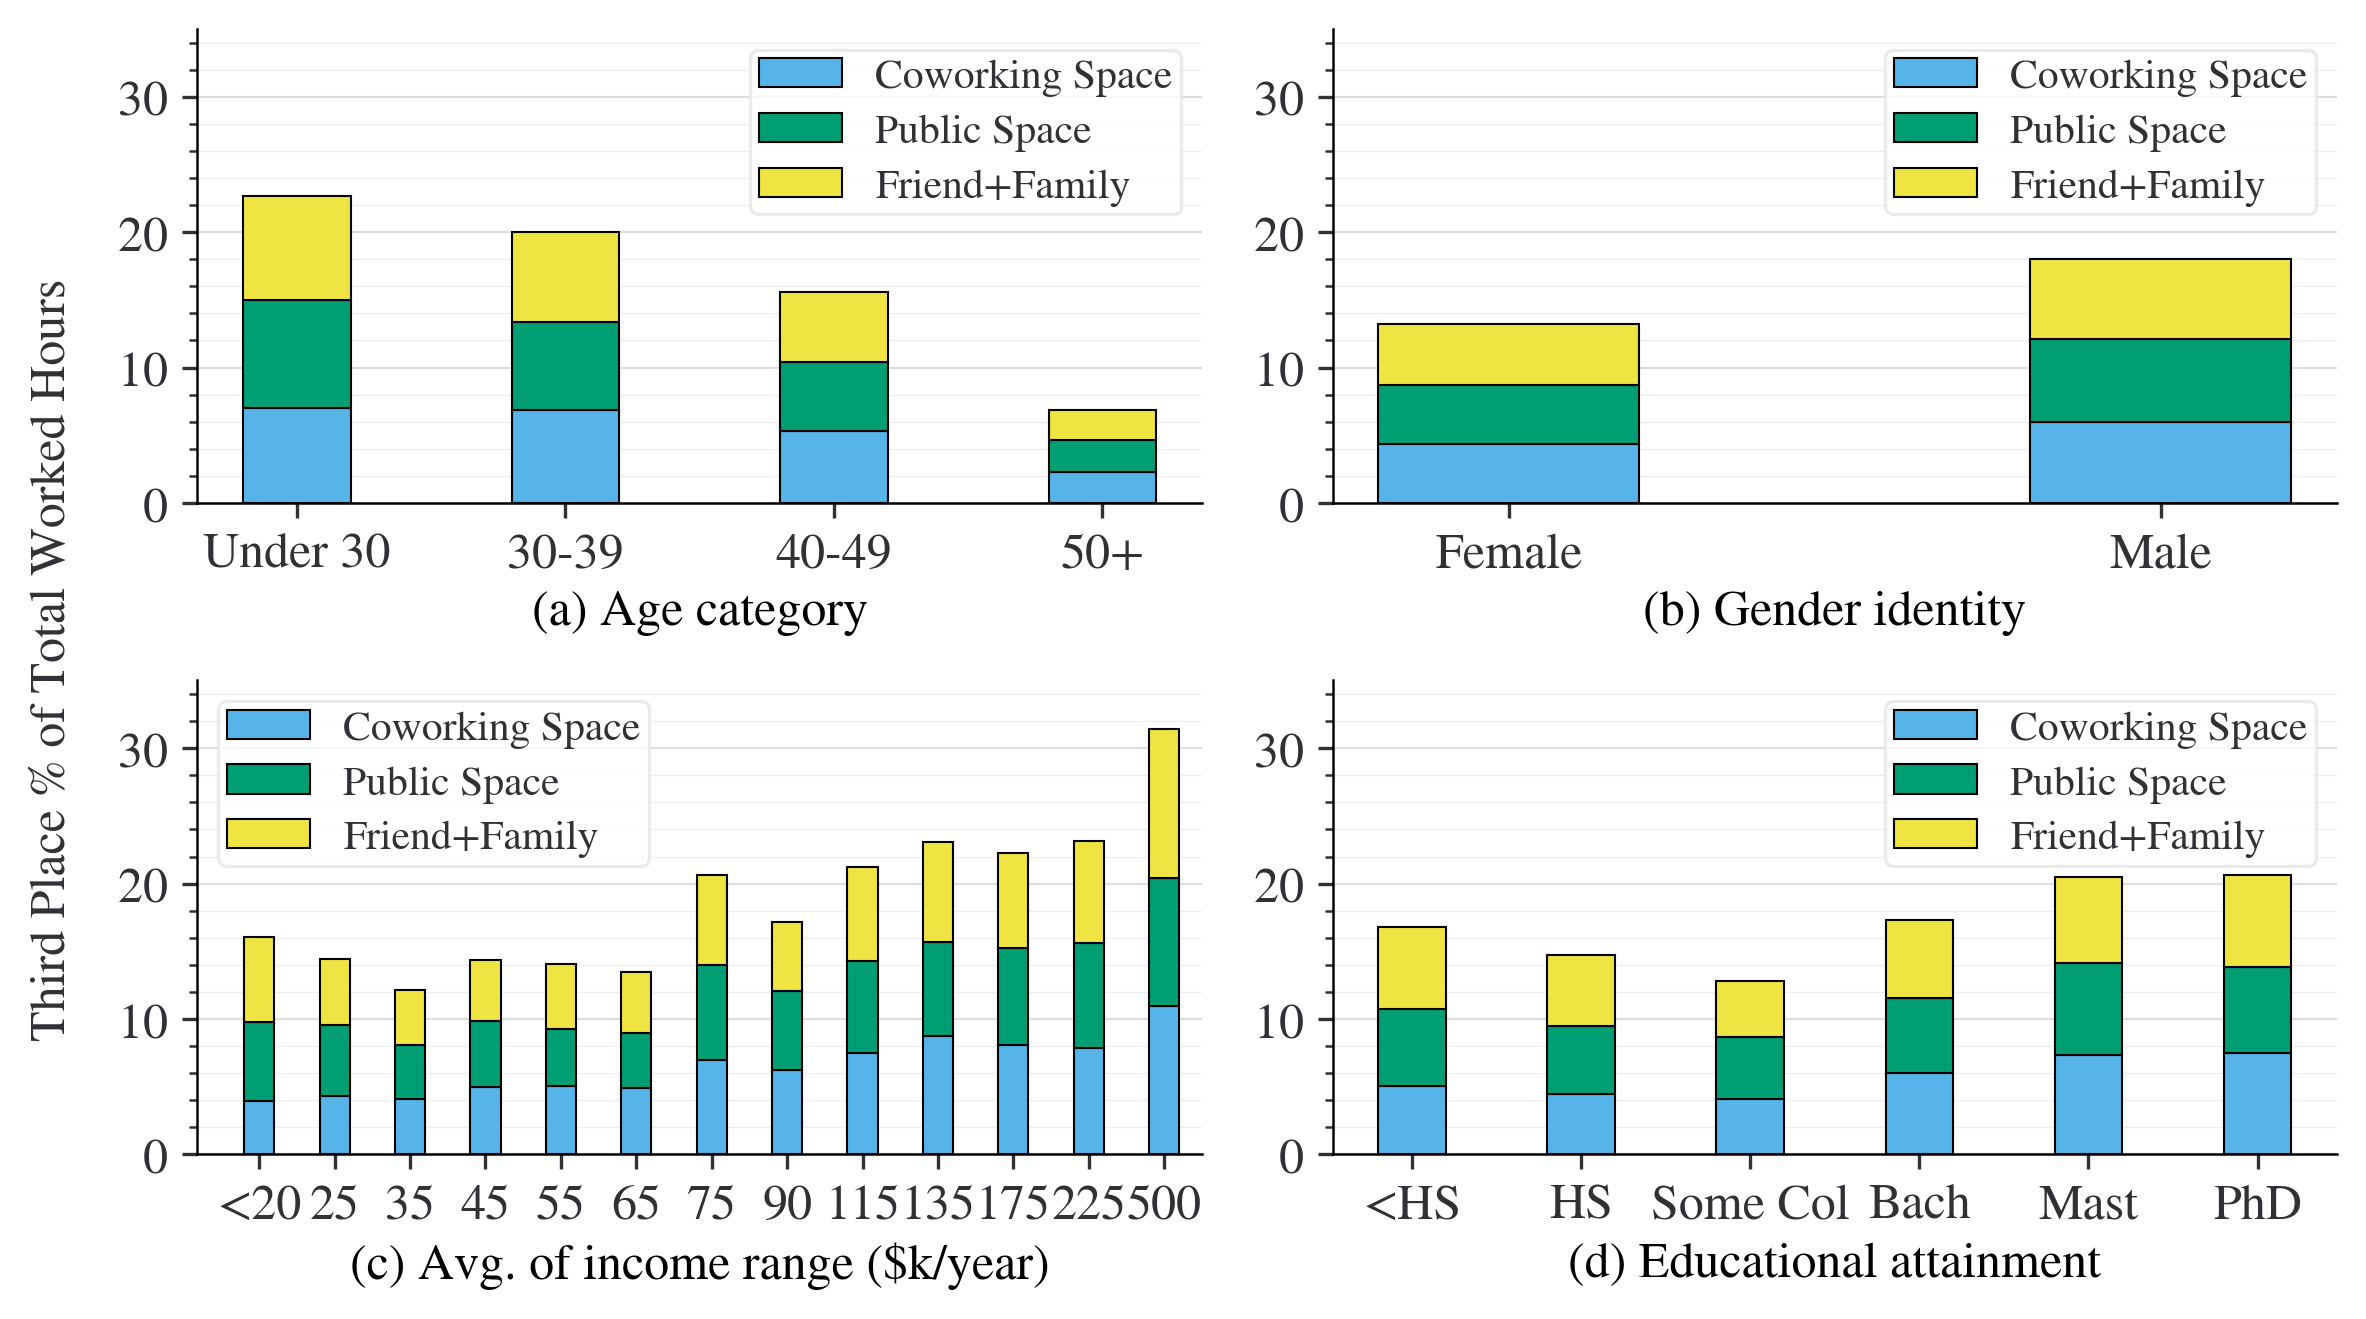

In [21]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Age
wt_stack = hf.thirdplace_split(df, 'agebin')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Age category', 
            ylim=[0, 35], 
            blabels = ld['agebin'],
            ax = axs[0,0])

# Gender
wt_stack = hf.thirdplace_split(df, 'gender')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Gender identity', 
            ylim=[0, 35], 
            blabels = ['Female', 'Male'],
            ax = axs[0,1])

# Income
wt_stack = hf.thirdplace_split(df, 'income_cat')
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Avg. of income range ($k/year)', 
            ylim=[0, 35], 
            xlim=[None, 12.5],
            blabels = ld['income'], 
            ax = axs[1,0])

# Education
wt_stack = hf.thirdplace_split(df, 'education')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Educational attainment', 
            ylim=[0, 35], 
            blabels = ld['educ'],
            ax = axs[1,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

#### 2b. By household characteristics

Sample size: 26009
Sample size: 26009
Sample size: 26009
Sample size: 27363
Sample size: 27363
Sample size: 27363
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 27364
Sample size: 5885
Sample size: 5885
Sample size: 5885
Sample size: 7585
Sample size: 7585
Sample size: 7585


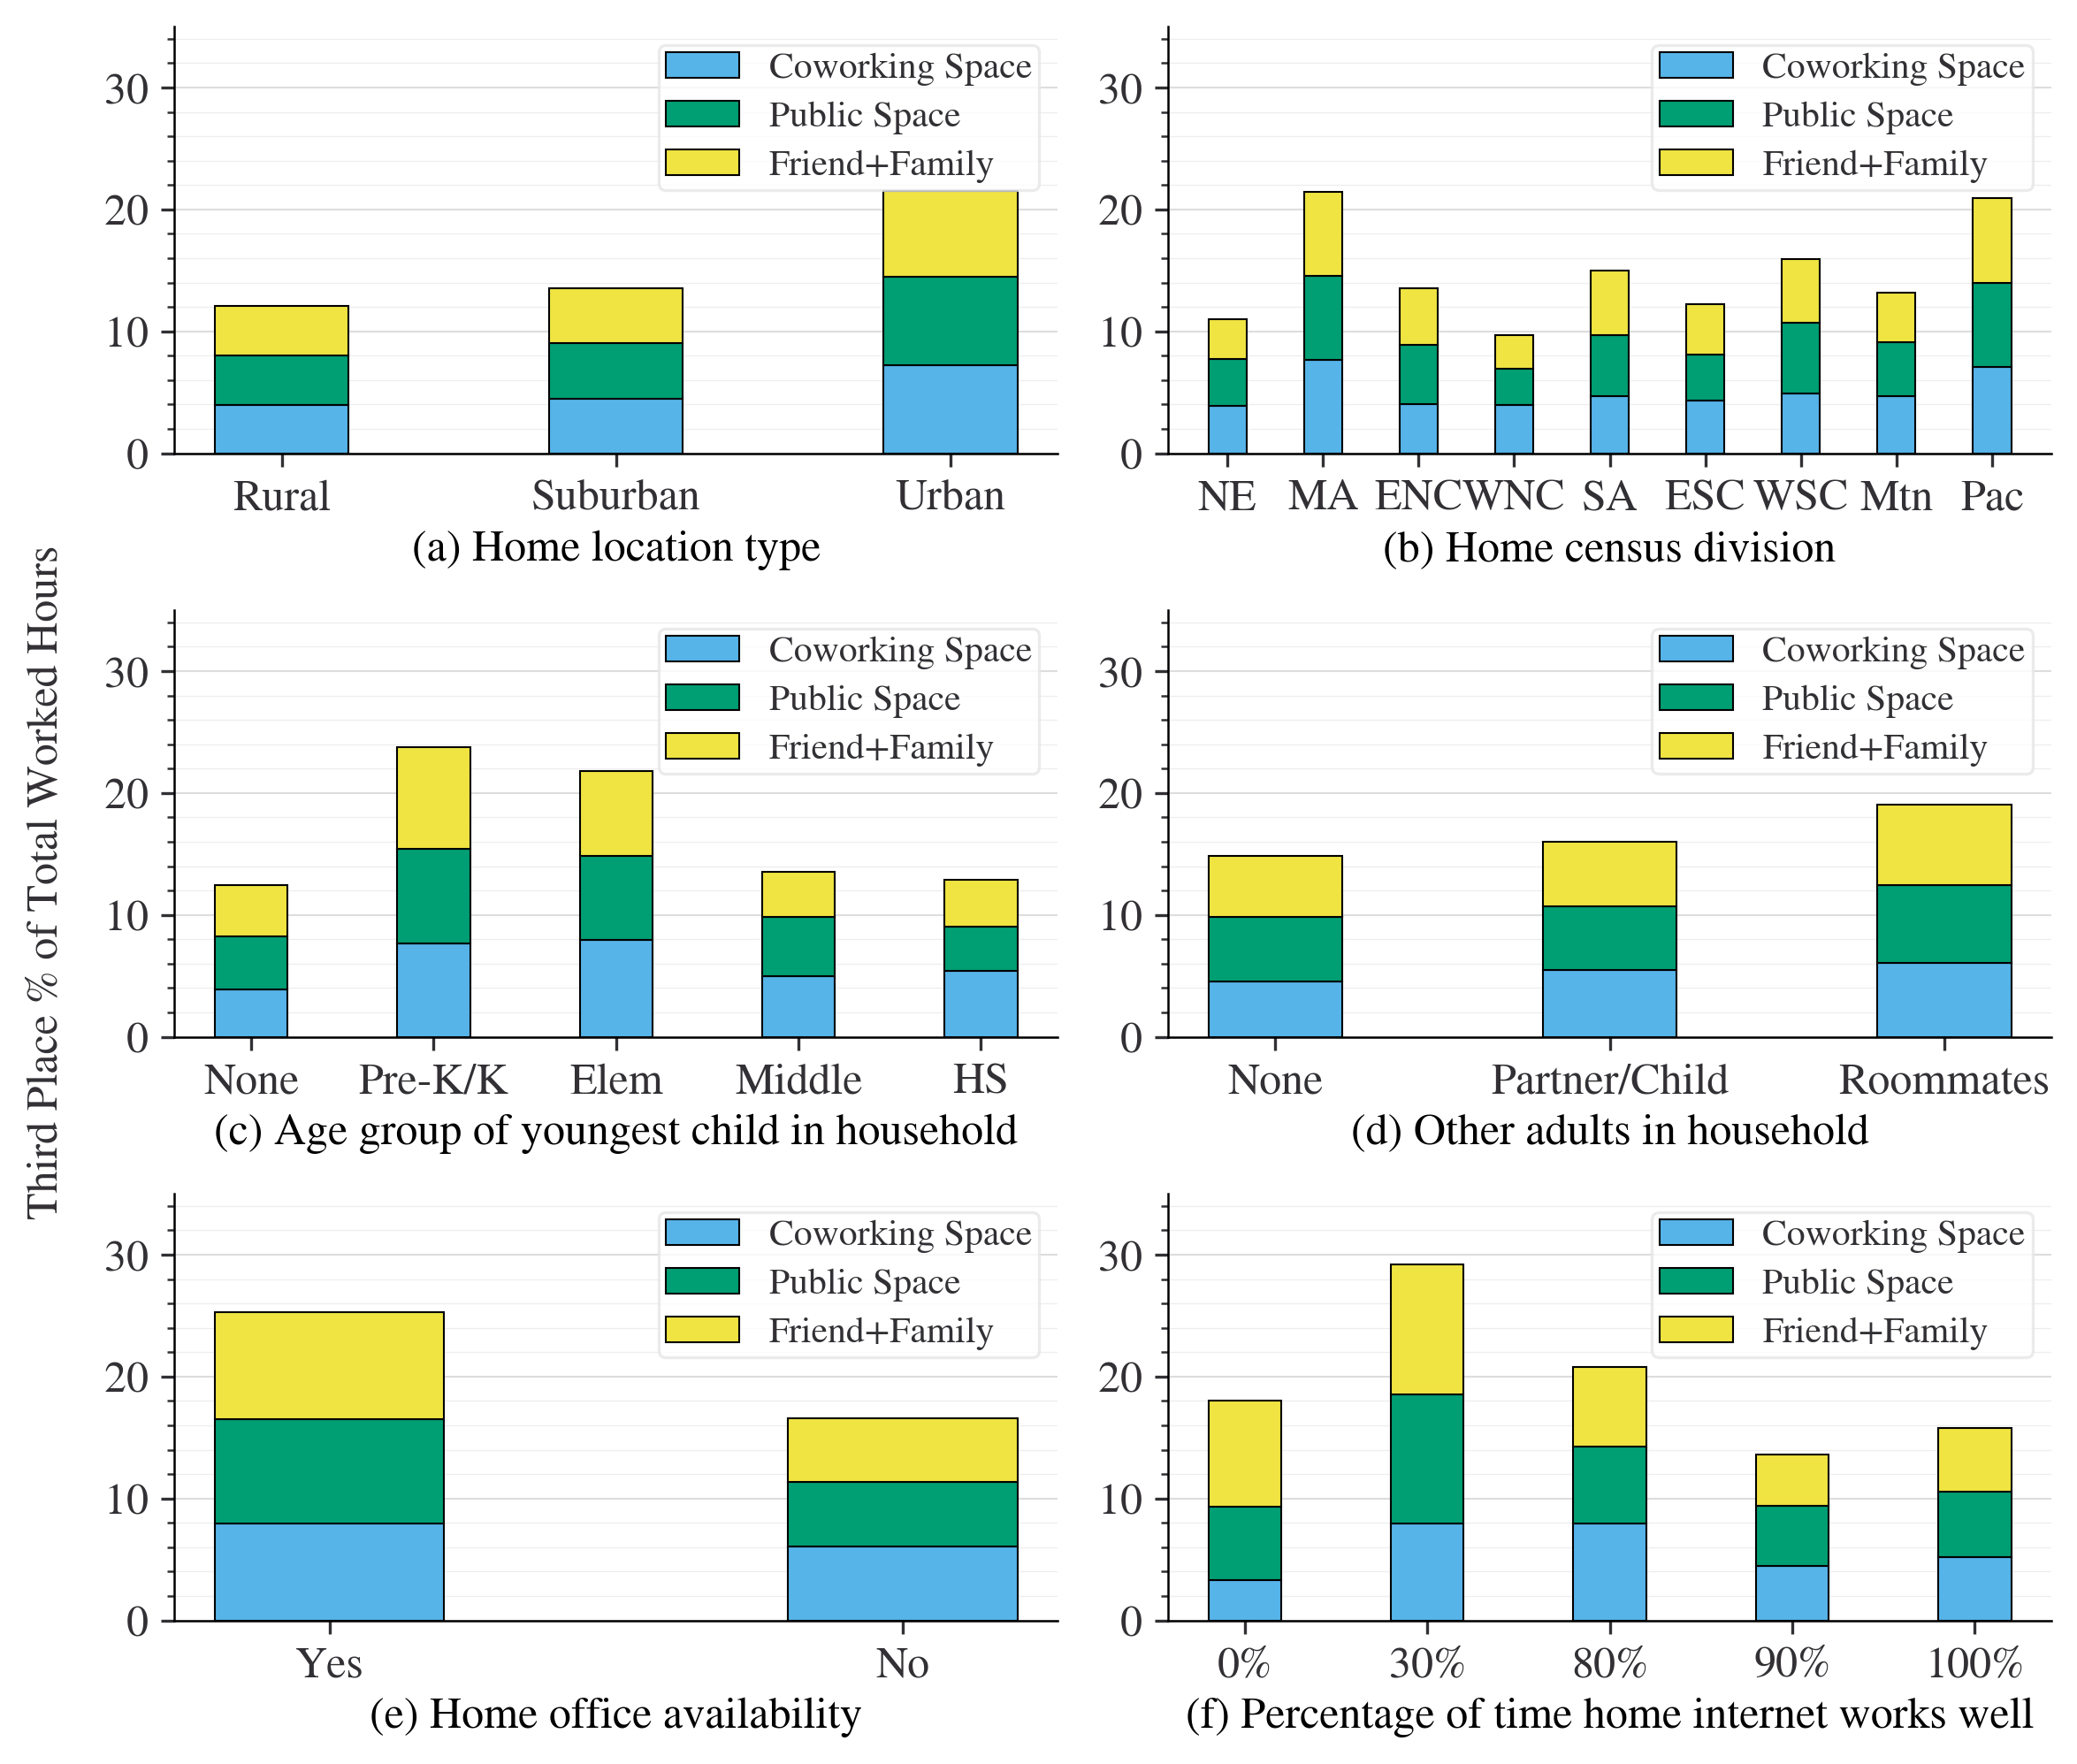

In [22]:
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(figsize[0], figsize[1]*1.5))

# Commute
wt_stack = hf.thirdplace_split(df, 'home_pop_category')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Home location type', 
            ylim=[0, 35], 
            ax = axs[0,0])

# Flexibility
wt_stack = hf.thirdplace_split(df, 'censusdivision')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Home census division', 
            ylim=[0, 35],
            blabels =ld['censusdiv'],
            ax = axs[0,1])

# Socializing
wt_stack = hf.thirdplace_split(df, 'live_children')
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Age group of youngest child in household',  
            ylim=[0, 35],
            blabels =['None', 'Pre-K/K', 'Elem', 'Middle', 'HS'],
            ax = axs[1,0])

# Quiet
wt_stack = hf.thirdplace_split(df, 'live_adults')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Other adults in household',  
            ylim=[0, 35],
            blabels =['None', 'Partner/Child', 'Roommates'],
            ax = axs[1,1])

# Socializing
wt_stack = hf.thirdplace_split(df, 'wfh_ownroom_notbed')
axs[2,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(e) Home office availability',  
            ylim=[0, 35],
            blabels =['Yes', 'No'],
            ax = axs[2,0])

# Quiet
wt_stack = hf.thirdplace_split(df, 'internet_quality_quant')
axs[2,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(f) Percentage of time home internet works well',  
            ylim=[0, 35],
            blabels =['0%', '30%', '80%', '90%', '100%'],
            ax = axs[2,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

#### 2c. By job characteristics

Sample size: 23277
Sample size: 23277
Sample size: 23277
Sample size: 26084
Sample size: 26084
Sample size: 26084
Sample size: 24705
Sample size: 24705
Sample size: 24705
Sample size: 2677
Sample size: 2677
Sample size: 2677


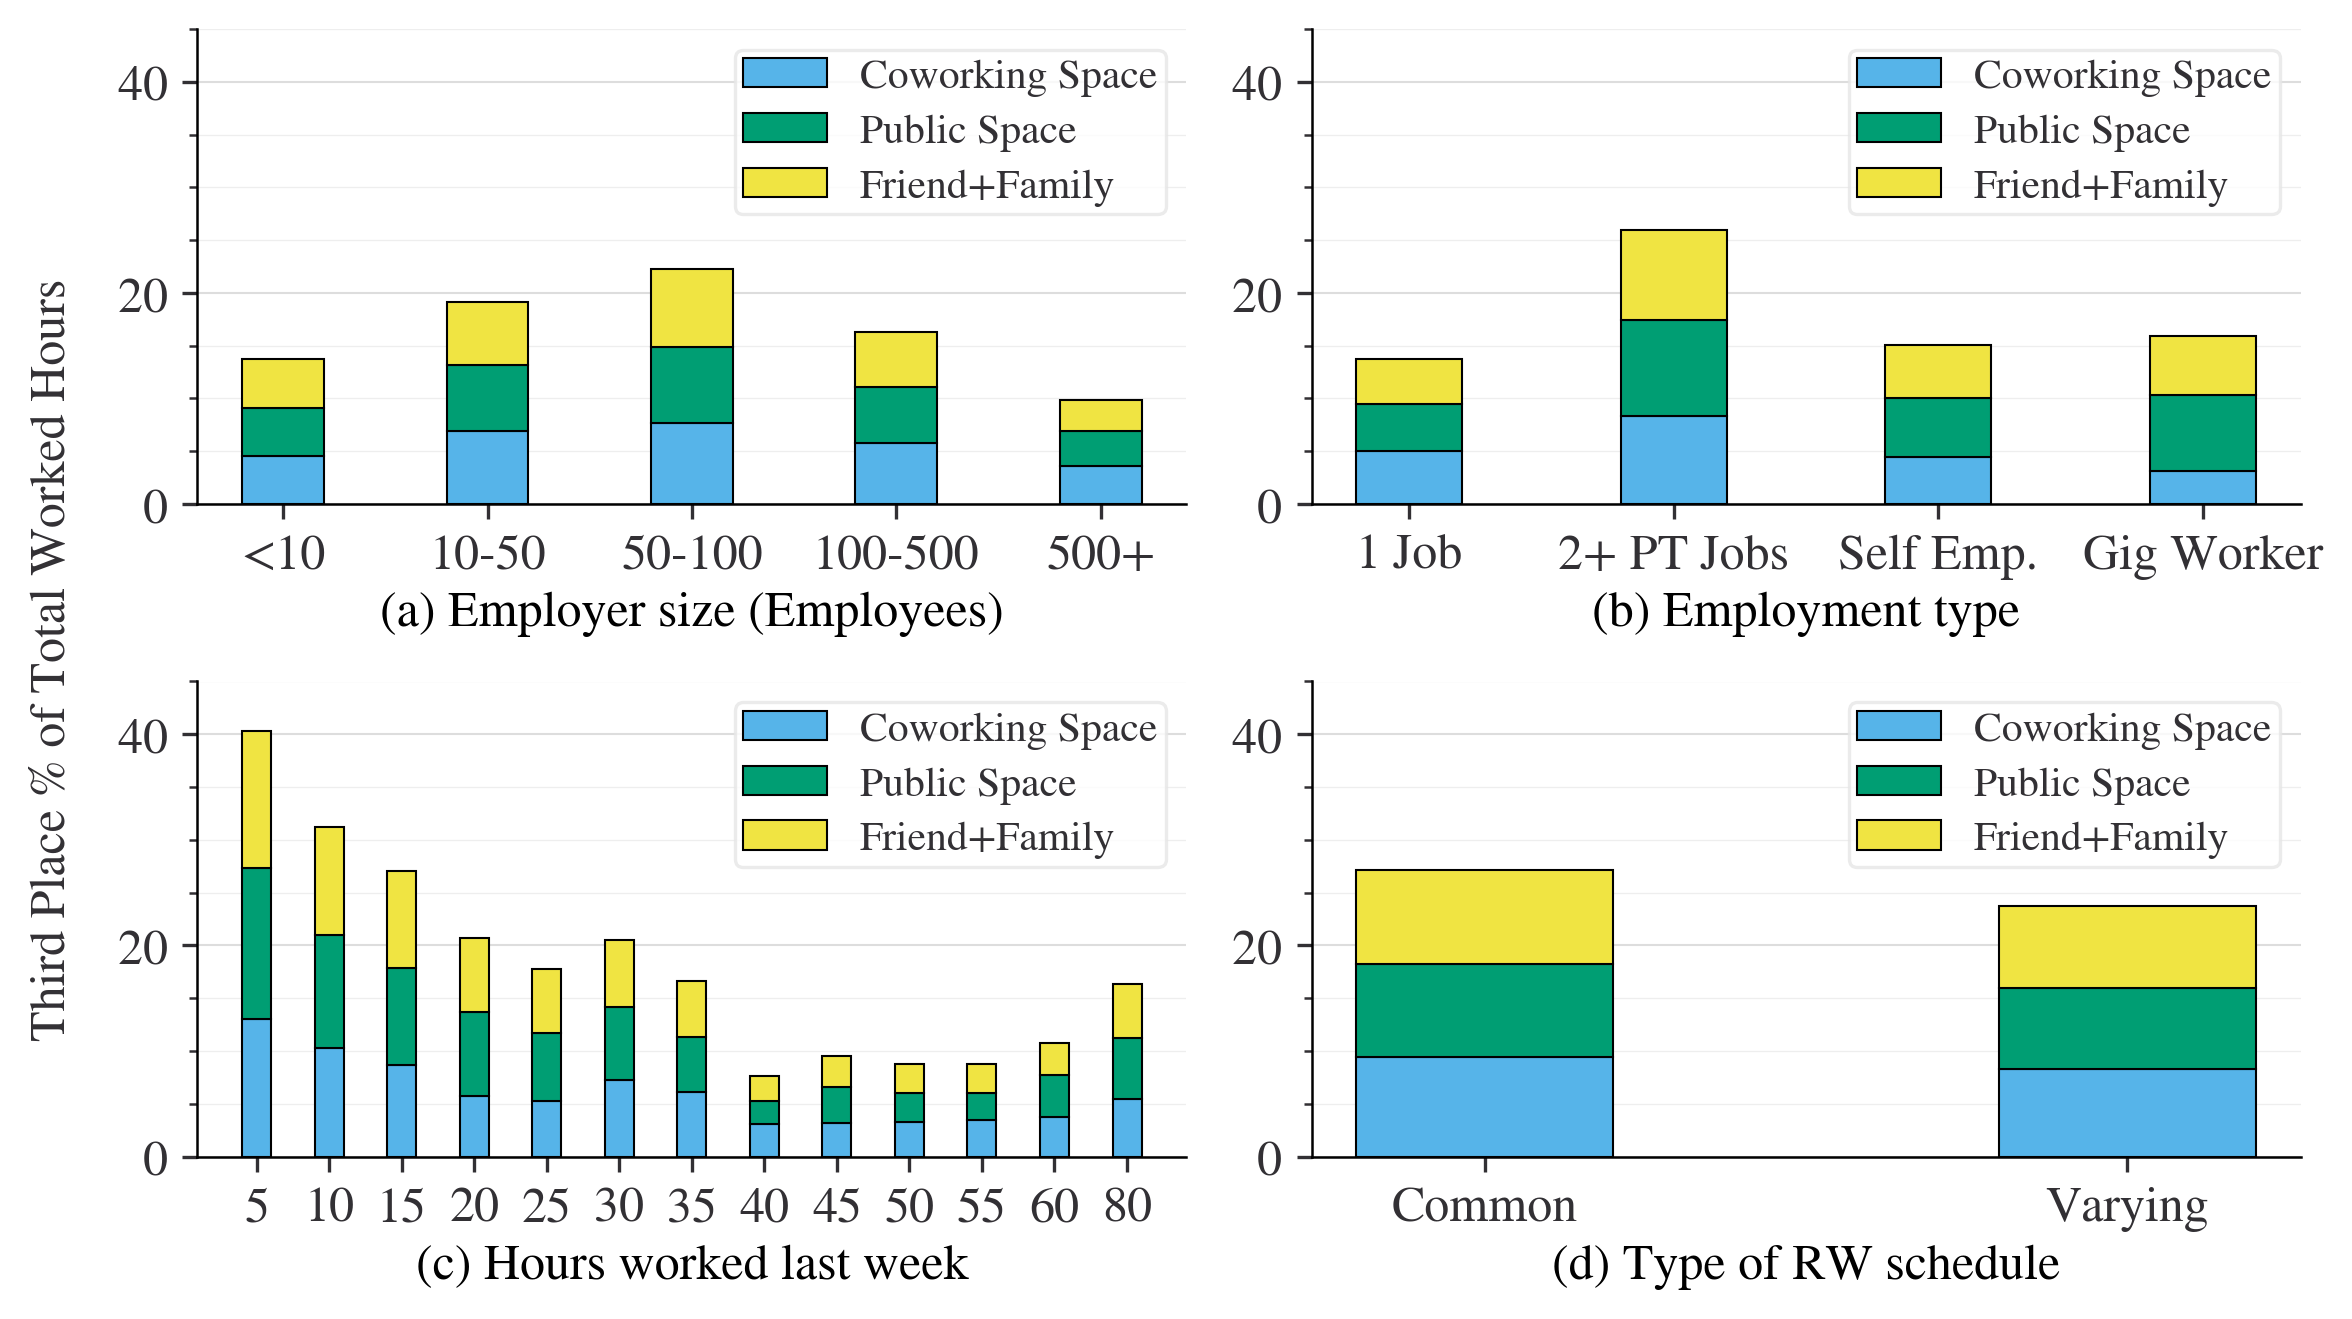

In [23]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Employer Size
wt_stack = hf.thirdplace_split(df, 'employer_sizecat')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Employer size (Employees)', 
            ylim=[0, 45], 
            blabels = ld['emp_size'],
            ax = axs[0,0])

# Employment Type
wt_stack = hf.thirdplace_split(df, 'self_employment')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Employment type', 
            ylim=[0, 45], 
            blabels = ['1 Job', '2+ PT Jobs', 'Self Emp.', 'Gig Worker'], 
            ax = axs[0,1])

# Worked hours last week
wt_stack = hf.thirdplace_split(df, 'workhours_bins')
wt_stack.drop(wt_stack.tail(1).index,inplace=True)
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Hours worked last week', 
            ylim=[0, 45], 
            ax = axs[1,0],
            string = True)

# Common or varying
wt_stack = hf.thirdplace_split(df, 'common_varying_sched')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Type of RW schedule', 
            ylim=[0, 45], 
            blabels = ['Common', 'Varying'],
            ax = axs[1,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

#### 2d. By task characteristics

Sample size: 6583
Sample size: 6583
Sample size: 6583
Sample size: 20446
Sample size: 20446
Sample size: 20446
Sample size: 4768
Sample size: 4768
Sample size: 4768
Sample size: 6323
Sample size: 6323
Sample size: 6323


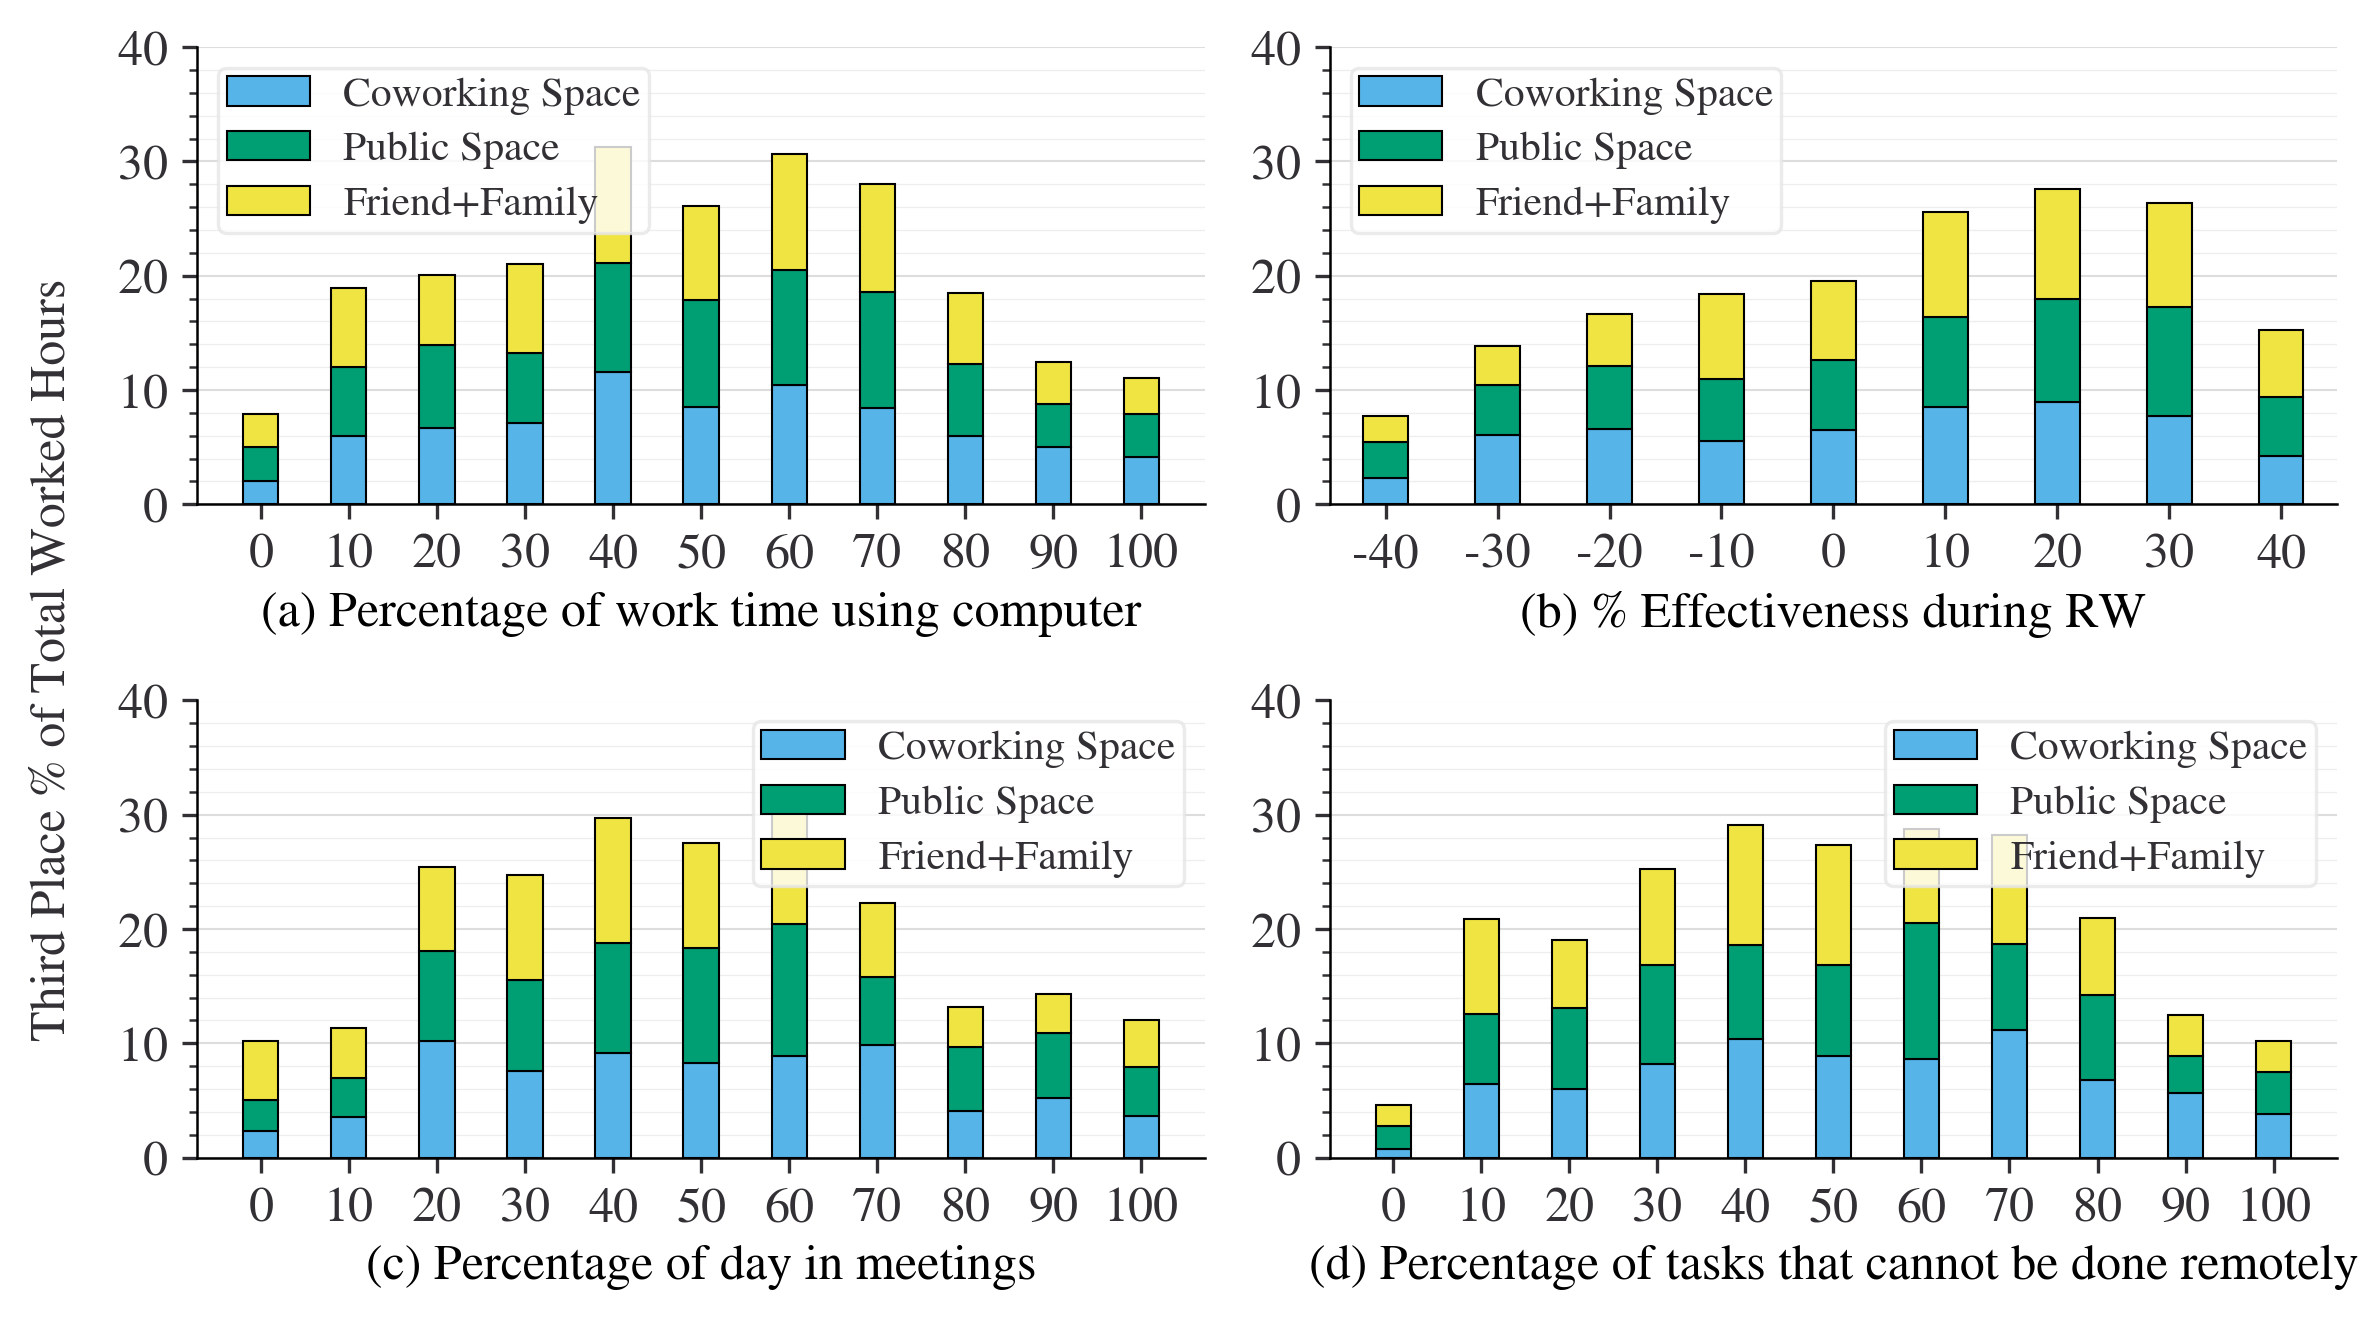

In [24]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Computer Percent
wt_stack = hf.thirdplace_split(df, 'compuse_bins')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Percentage of work time using computer', 
            ylim=[0, 40], 
            ax = axs[0,0],
            string = True)

# Perceived Effectiveness
wt_stack = hf.thirdplace_split(df, 'wfh_eff_COVID_bins')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) % Effectiveness during RW', 
            xlim = [0.5, 9.5],
            ylim=[0, 40], 
            ax = axs[0,1],
            string=True)

# Percent meetings
wt_stack = hf.thirdplace_split(df, 'meetings_workday_bins')
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Percentage of day in meetings', 
            ylim=[0, 40], 
            ax = axs[1,0],
            string = True)

# Not remoteable
wt_stack = hf.thirdplace_split(df, 'nonremoteable_bins')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Percentage of tasks that cannot be done remotely', 
            ylim=[0, 40], 
            ax = axs[1,1],
            string = True)

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

#### 2e. By WFH policy

Sample size: 2356
Sample size: 2356
Sample size: 2356
Sample size: 3877
Sample size: 3877
Sample size: 3877


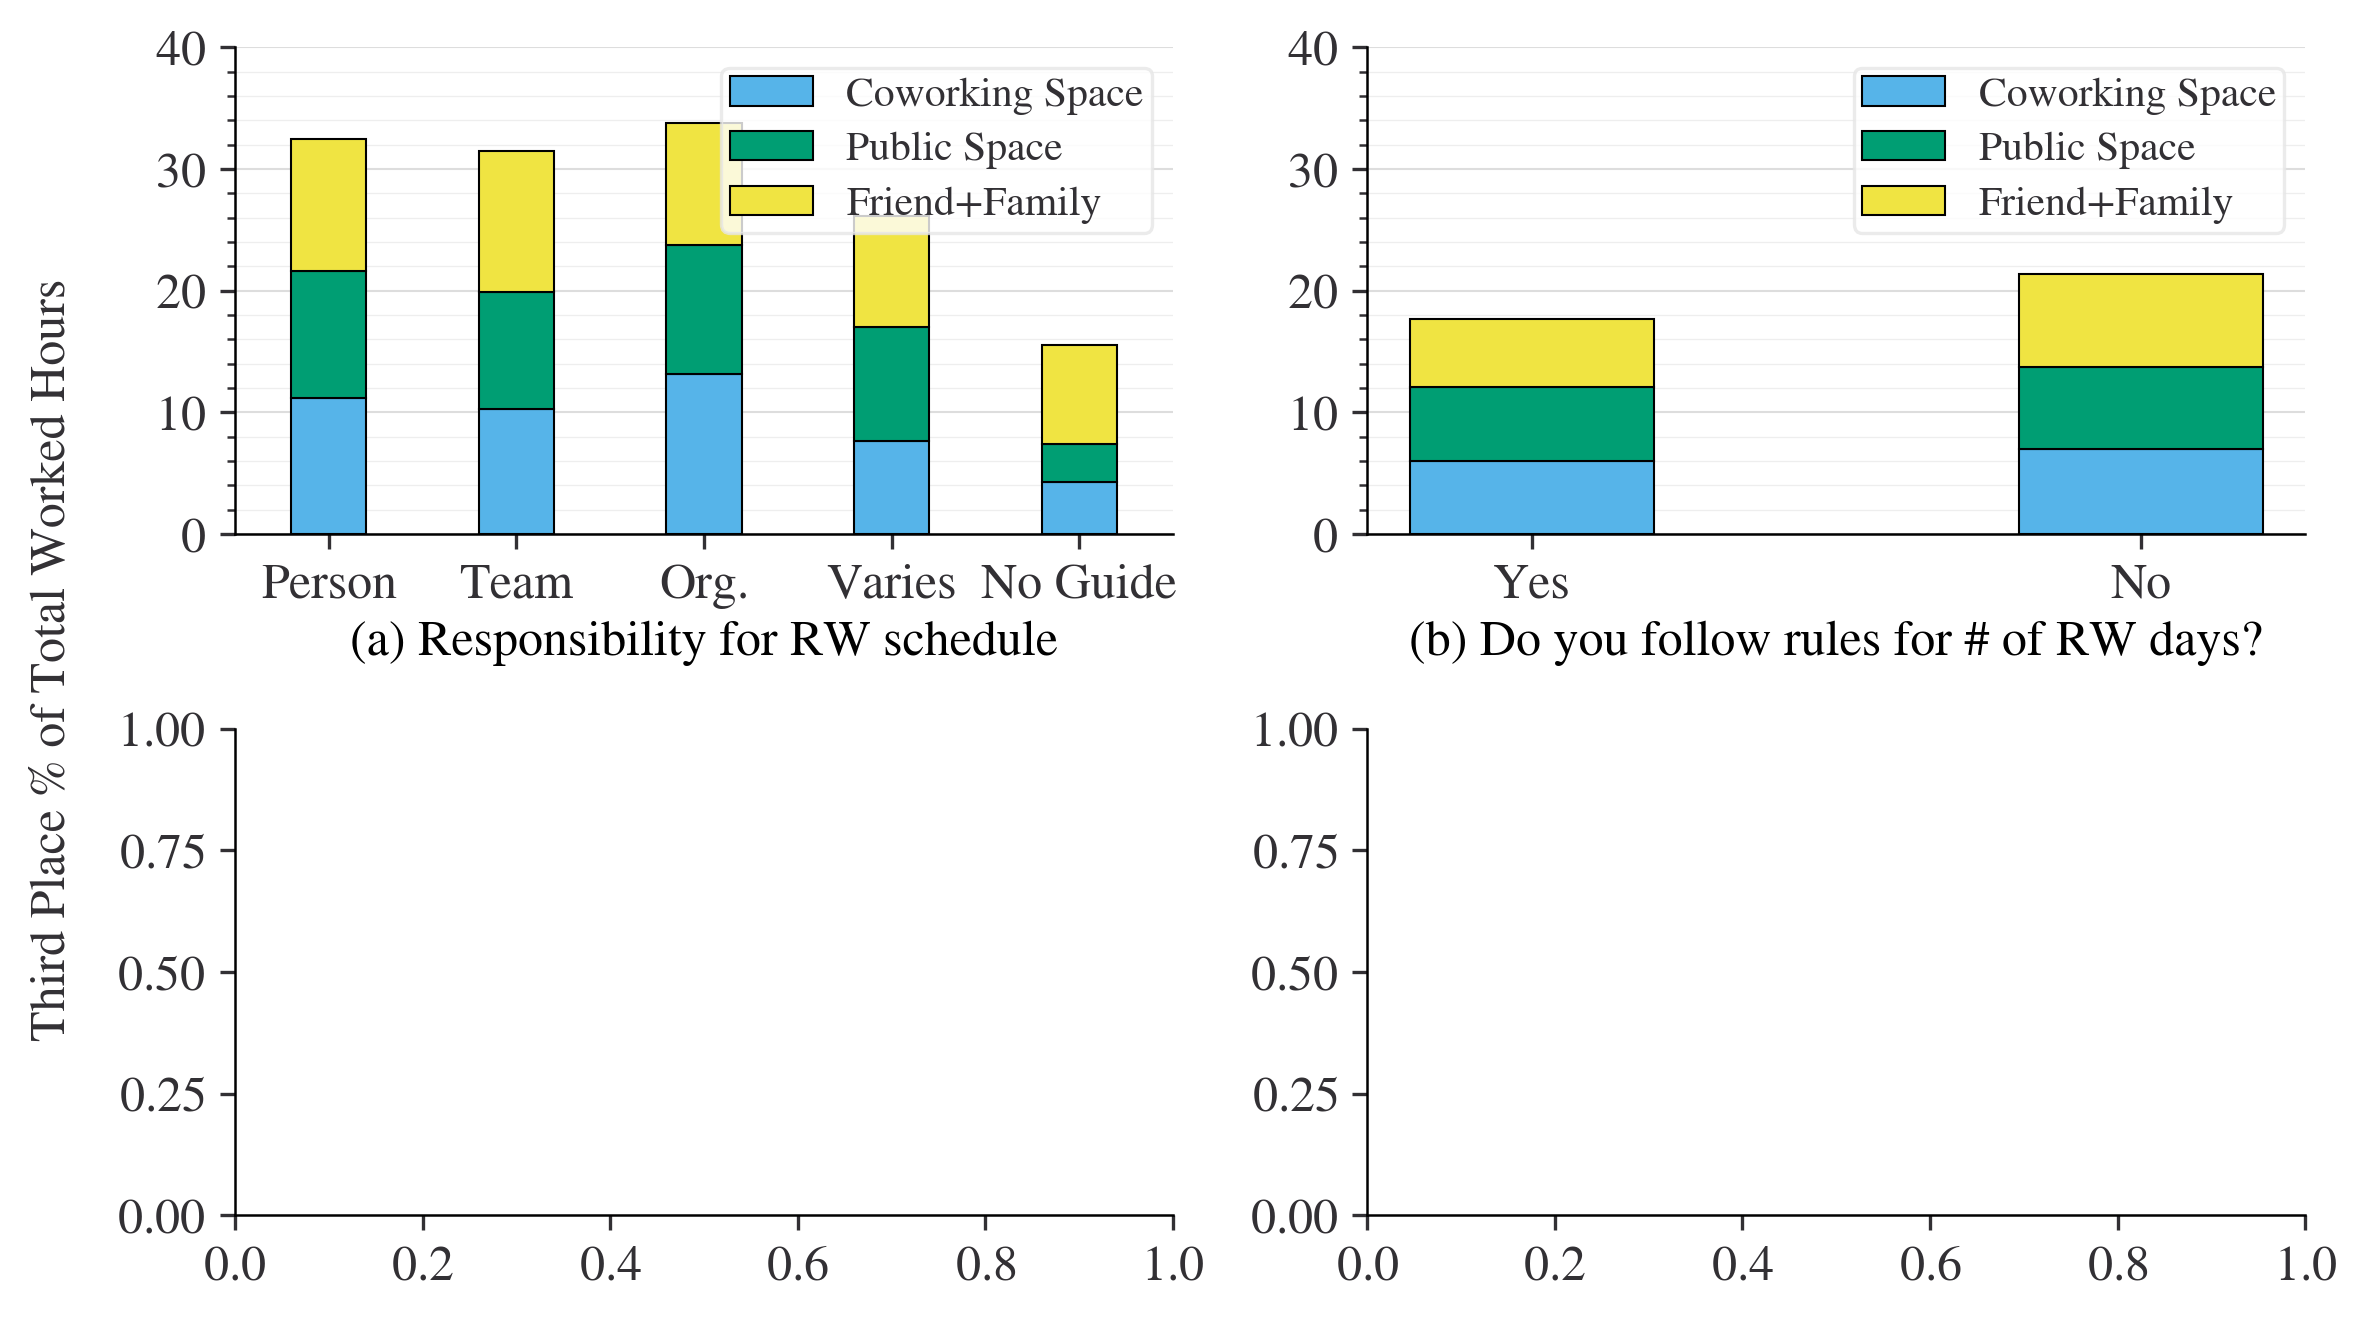

In [25]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Who decides
wt_stack = hf.thirdplace_split(df, 'who_decides_wfhdays')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Responsibility for RW schedule', 
            xlim=[-0.5, 4.5],
            ylim=[0, 40], 
            blabels=['Person', 'Team', 'Org.', 'Varies', 'No Guide'],
            ax = axs[0,0])

# Following boss' plan
wt_stack = hf.thirdplace_split(df, 'employer_days_meet')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Do you follow rules for # of RW days?', 
            blabels = ['Yes', 'No'],
            ylim=[0, 40], 
            ax = axs[0,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();


#### 2g. By coordination attitudes

Sample size: 2925
Sample size: 2925
Sample size: 2925
Sample size: 2220
Sample size: 2220
Sample size: 2220
Sample size: 3038
Sample size: 3038
Sample size: 3038
Sample size: 2971
Sample size: 2971
Sample size: 2971


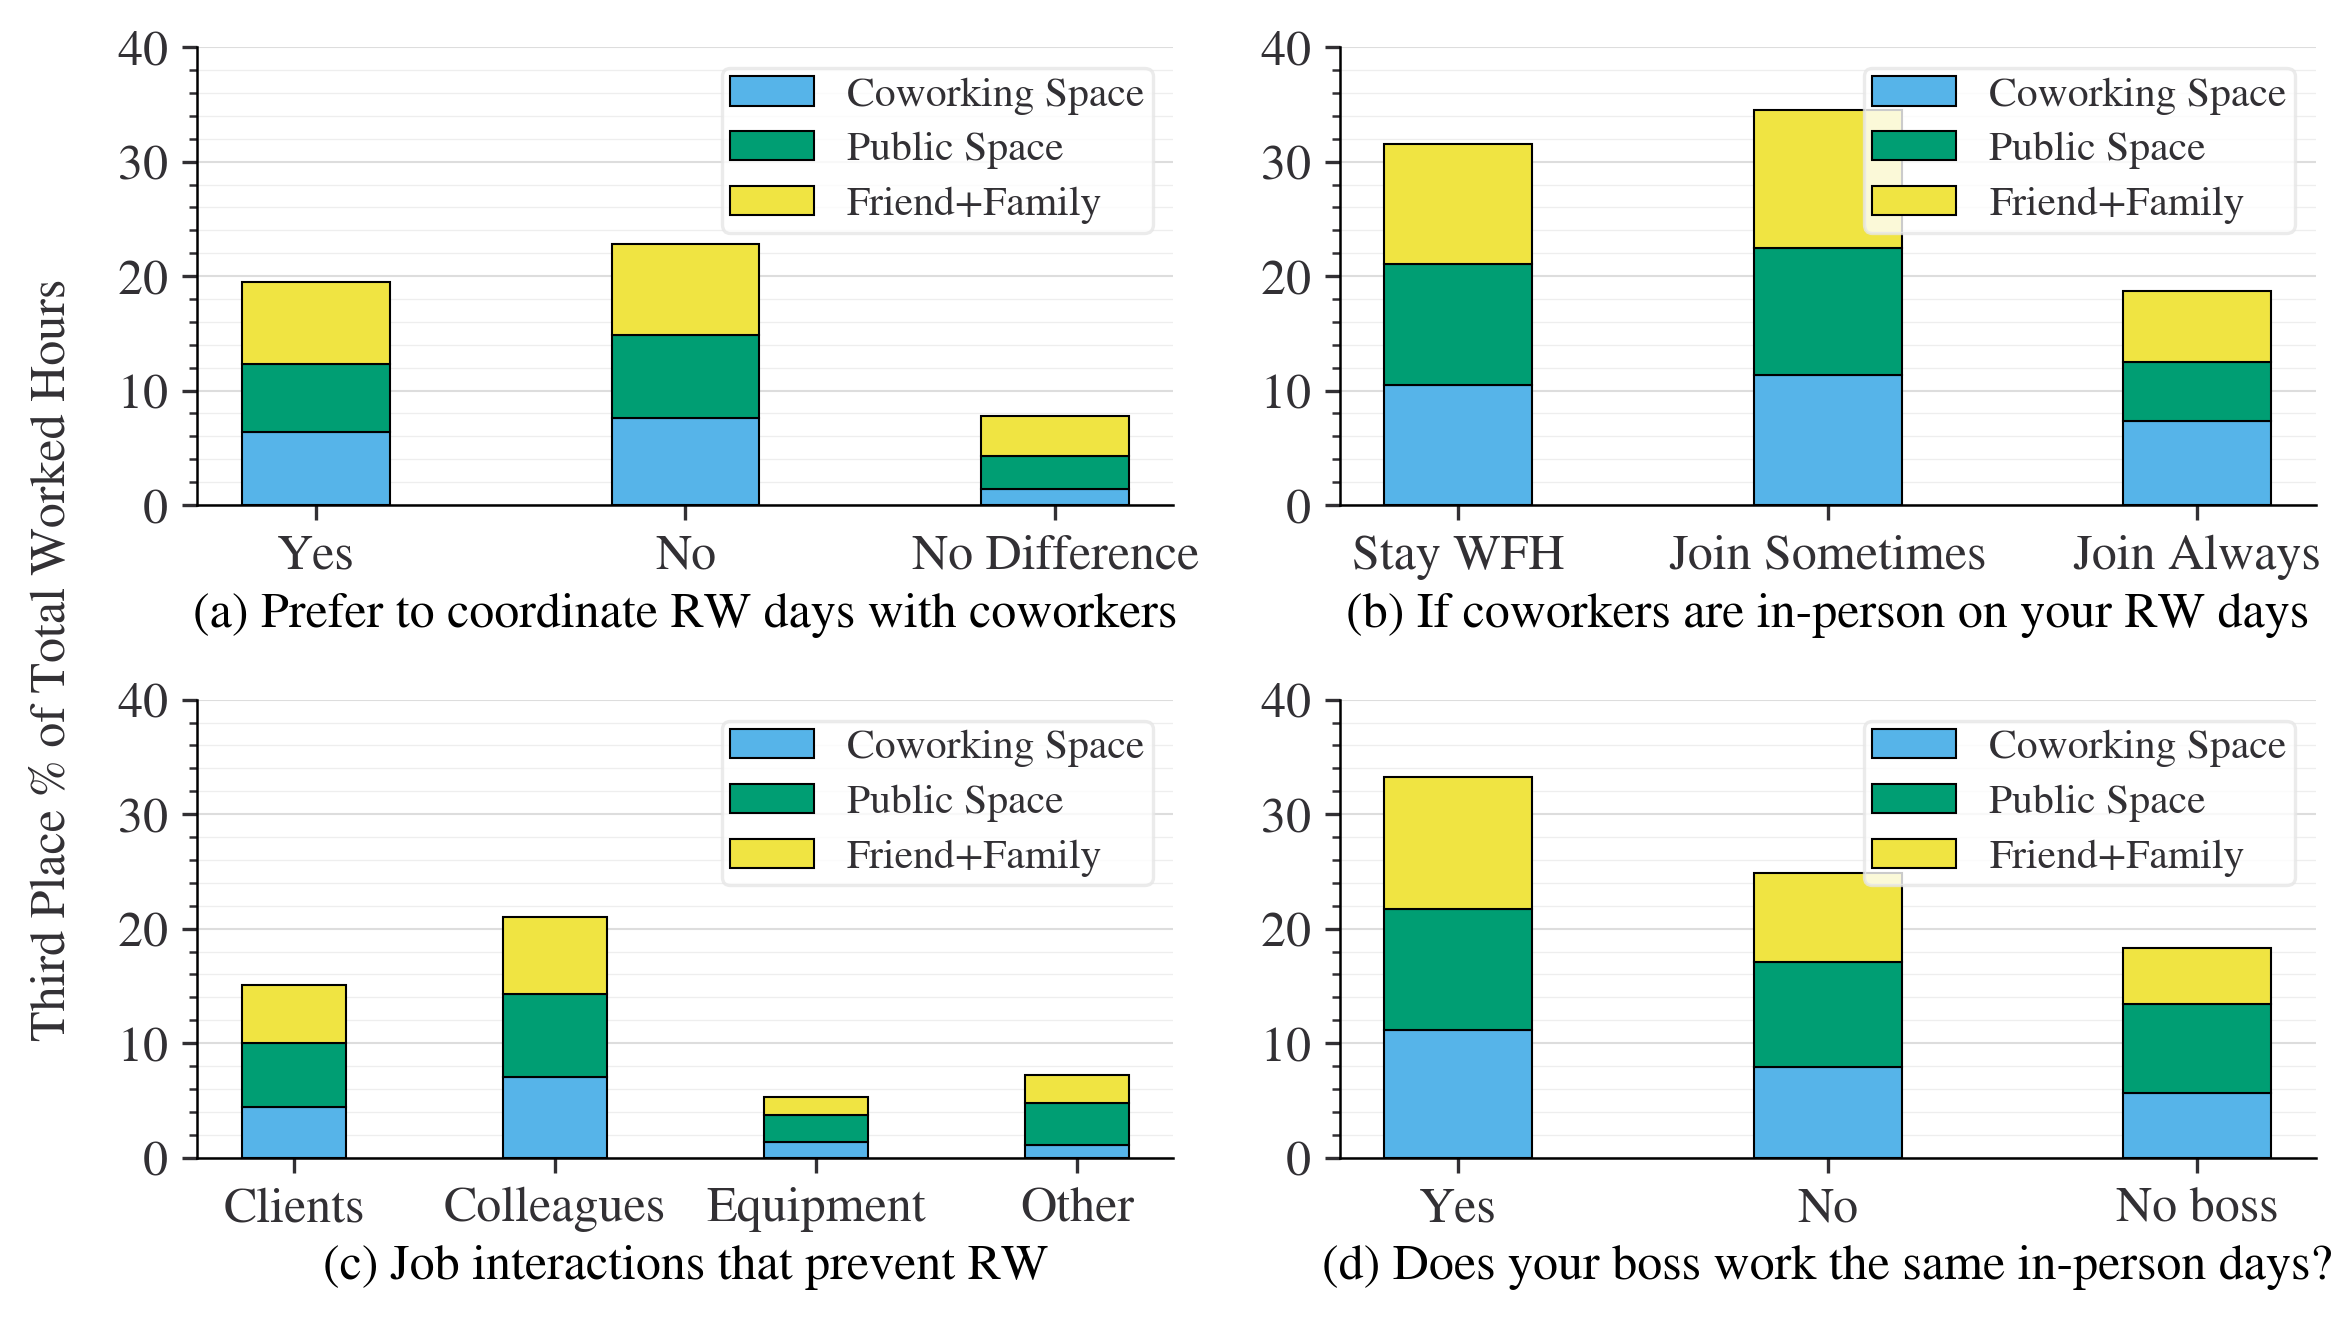

In [26]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Coordinate with employees - prefer
wt_stack = hf.thirdplace_split(df, 'wfh_coordinate_pref')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(a) Prefer to coordinate RW days with coworkers', 
            ylim=[0, 40], 
            blabels=['Yes', 'No', 'No Difference'],
            ax = axs[0,0])

# Coordinating with coworkers
wt_stack = hf.thirdplace_split(df, 'coworkers_wfh_unravel')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) If coworkers are in-person on your RW days', 
            ylim=[0, 40], 
            blabels = ['Stay WFH', 'Join Sometimes', 'Join Always'],
            ax = axs[0,1])

# Coordinate with employees - effectiveness
wt_stack = hf.thirdplace_split(df, 'worktime_nonremotable_why')
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Job interactions that prevent RW', 
            ylim=[0, 40], 
            blabels = ['Clients', 'Colleagues', 'Equipment', 'Other'],
            ax = axs[1,0])

# Coordinating with boss
wt_stack = hf.thirdplace_split(df, 'boss_wfh_samedays')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Does your boss work the same in-person days?', 
            ylim=[0, 40], 
            blabels = ['Yes', 'No', 'No boss'],
            ax = axs[1,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

#### 2i. By benefits

Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307
Sample size: 11307


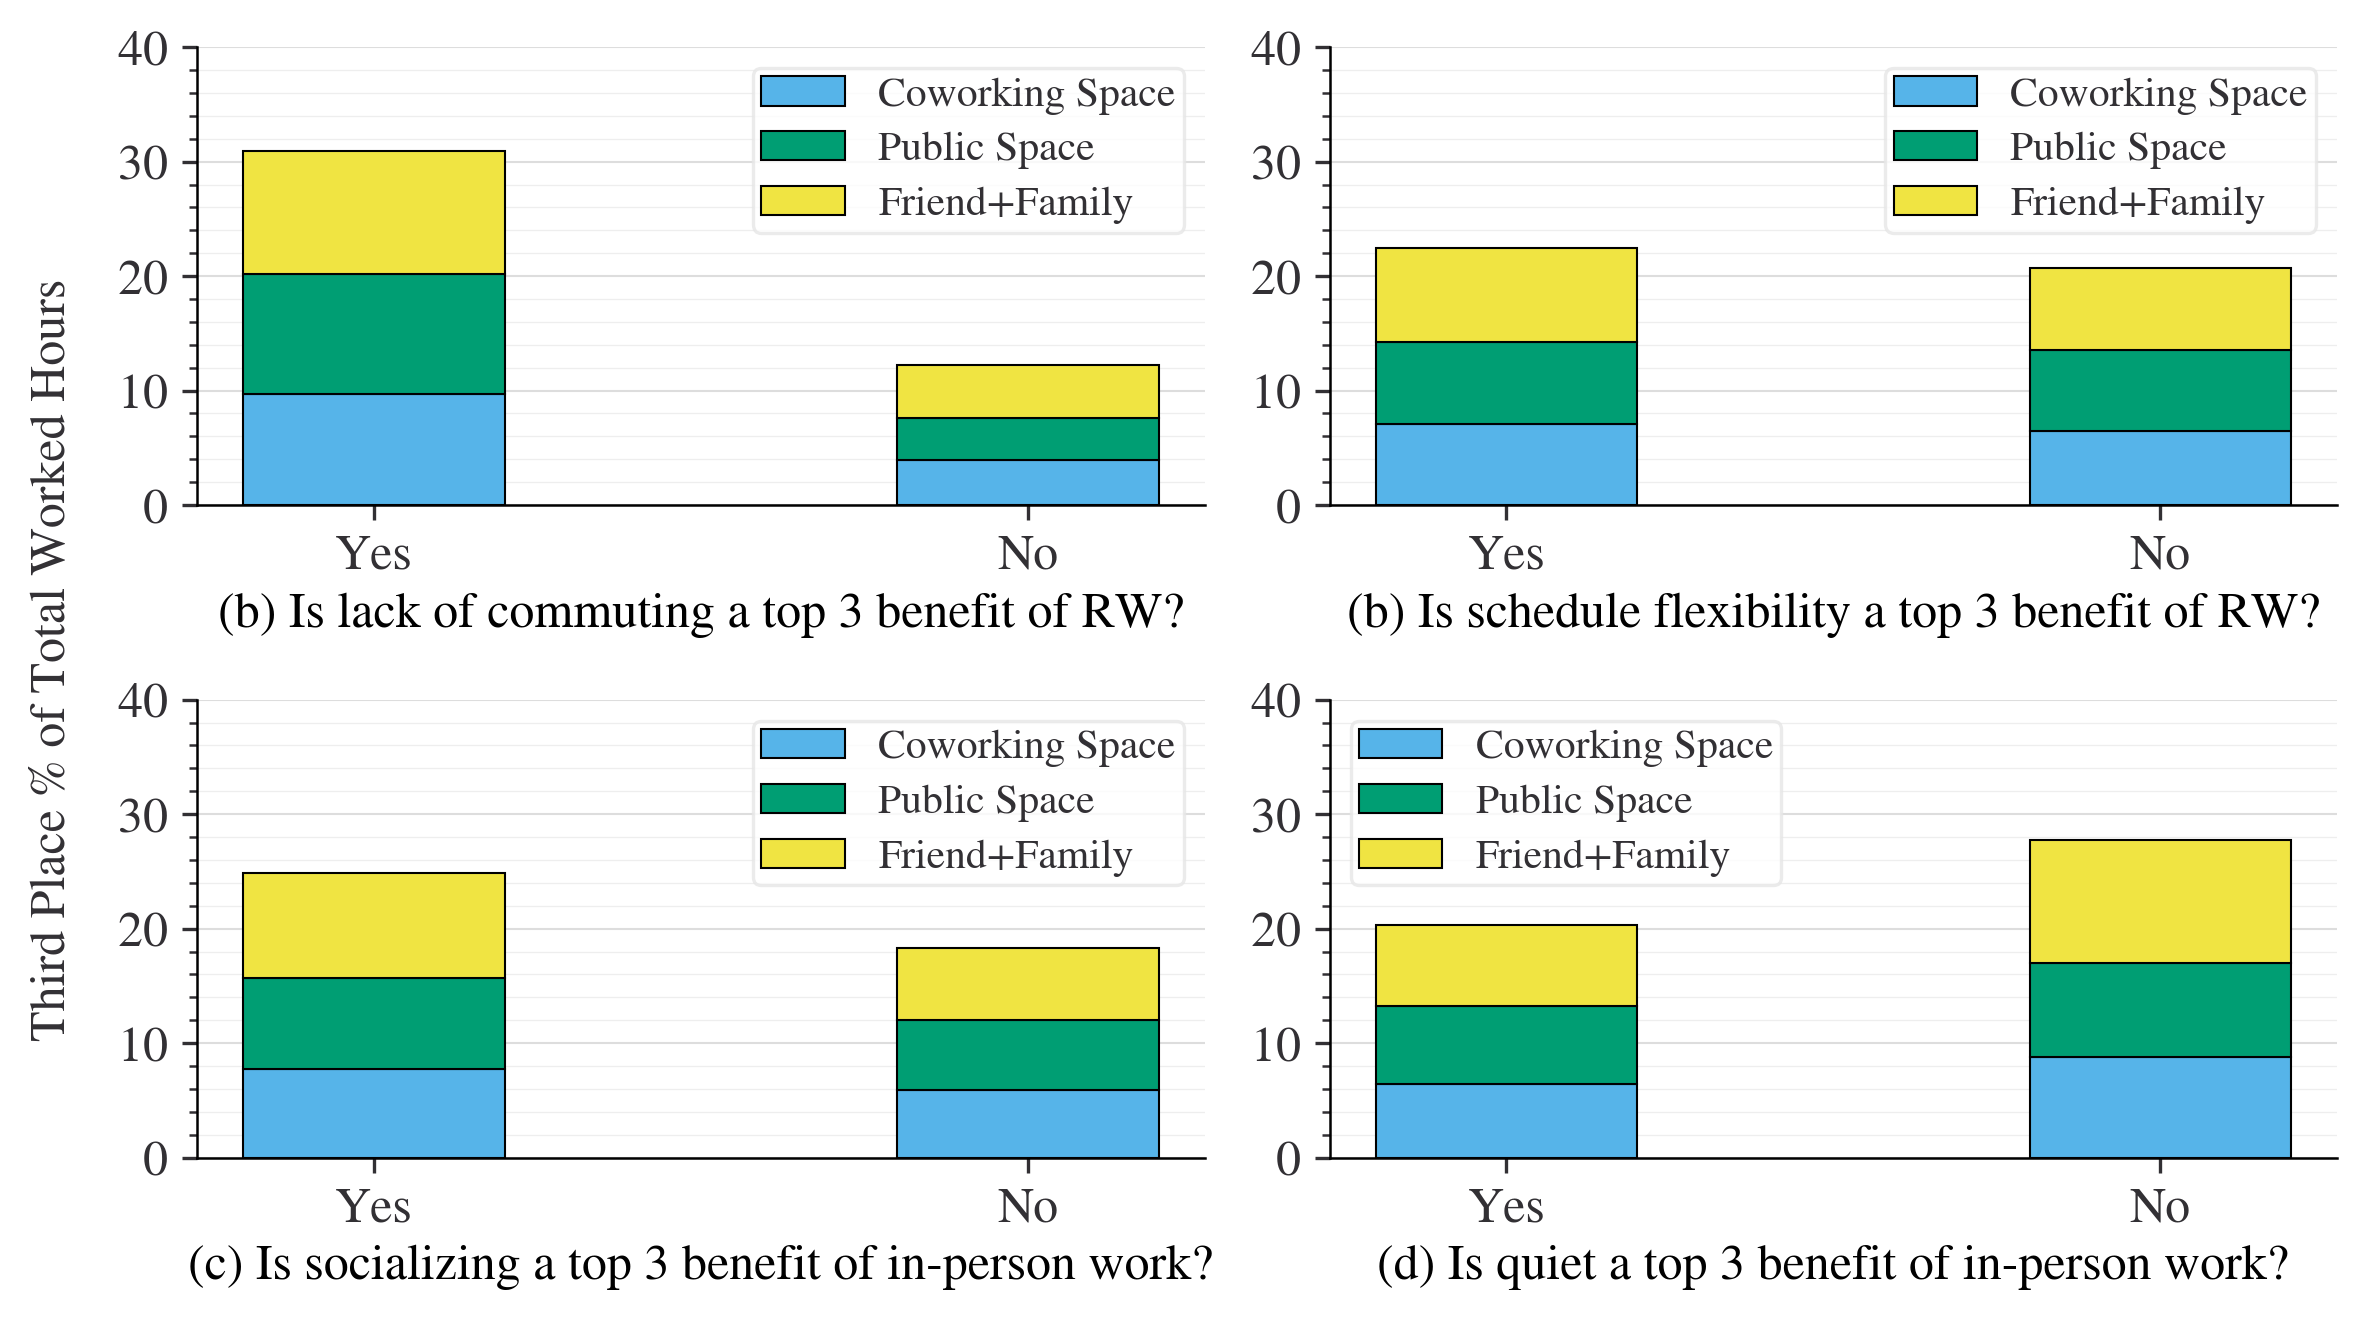

In [27]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=figsize)

# Commute
wt_stack = hf.thirdplace_split(df, 'wfh_top3benefits_commute')
axs[0,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Is lack of commuting a top 3 benefit of RW?', 
            ylim=[0, 40], 
            blabels =['Yes', 'No'],
            ax = axs[0,0])

# Flexibility
wt_stack = hf.thirdplace_split(df, 'wfh_top3benefits_flex')
axs[0,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(b) Is schedule flexibility a top 3 benefit of RW?', 
            ylim=[0, 40],
            blabels =['Yes', 'No'],
            ax = axs[0,1])

# Socializing
wt_stack = hf.thirdplace_split(df, 'wbp_top3benefits_social')
axs[1,0] = hf.plot_stacked_column(wt_stack,
            xlabel='(c) Is socializing a top 3 benefit of in-person work?',  
            ylim=[0, 40],
            blabels =['Yes', 'No'],
            ax = axs[1,0])

# Quiet
wt_stack = hf.thirdplace_split(df, 'wbp_top3benefits_quiet')
axs[1,1] = hf.plot_stacked_column(wt_stack,
            xlabel='(d) Is quiet a top 3 benefit of in-person work?',  
            ylim=[0, 40],
            blabels =['Yes', 'No'],
            ax = axs[1,1])

fig.supylabel('Third Place % of Total Worked Hours')
fig.tight_layout();

### WFH Constraints

Sample size: 3038
Sample size: 16273


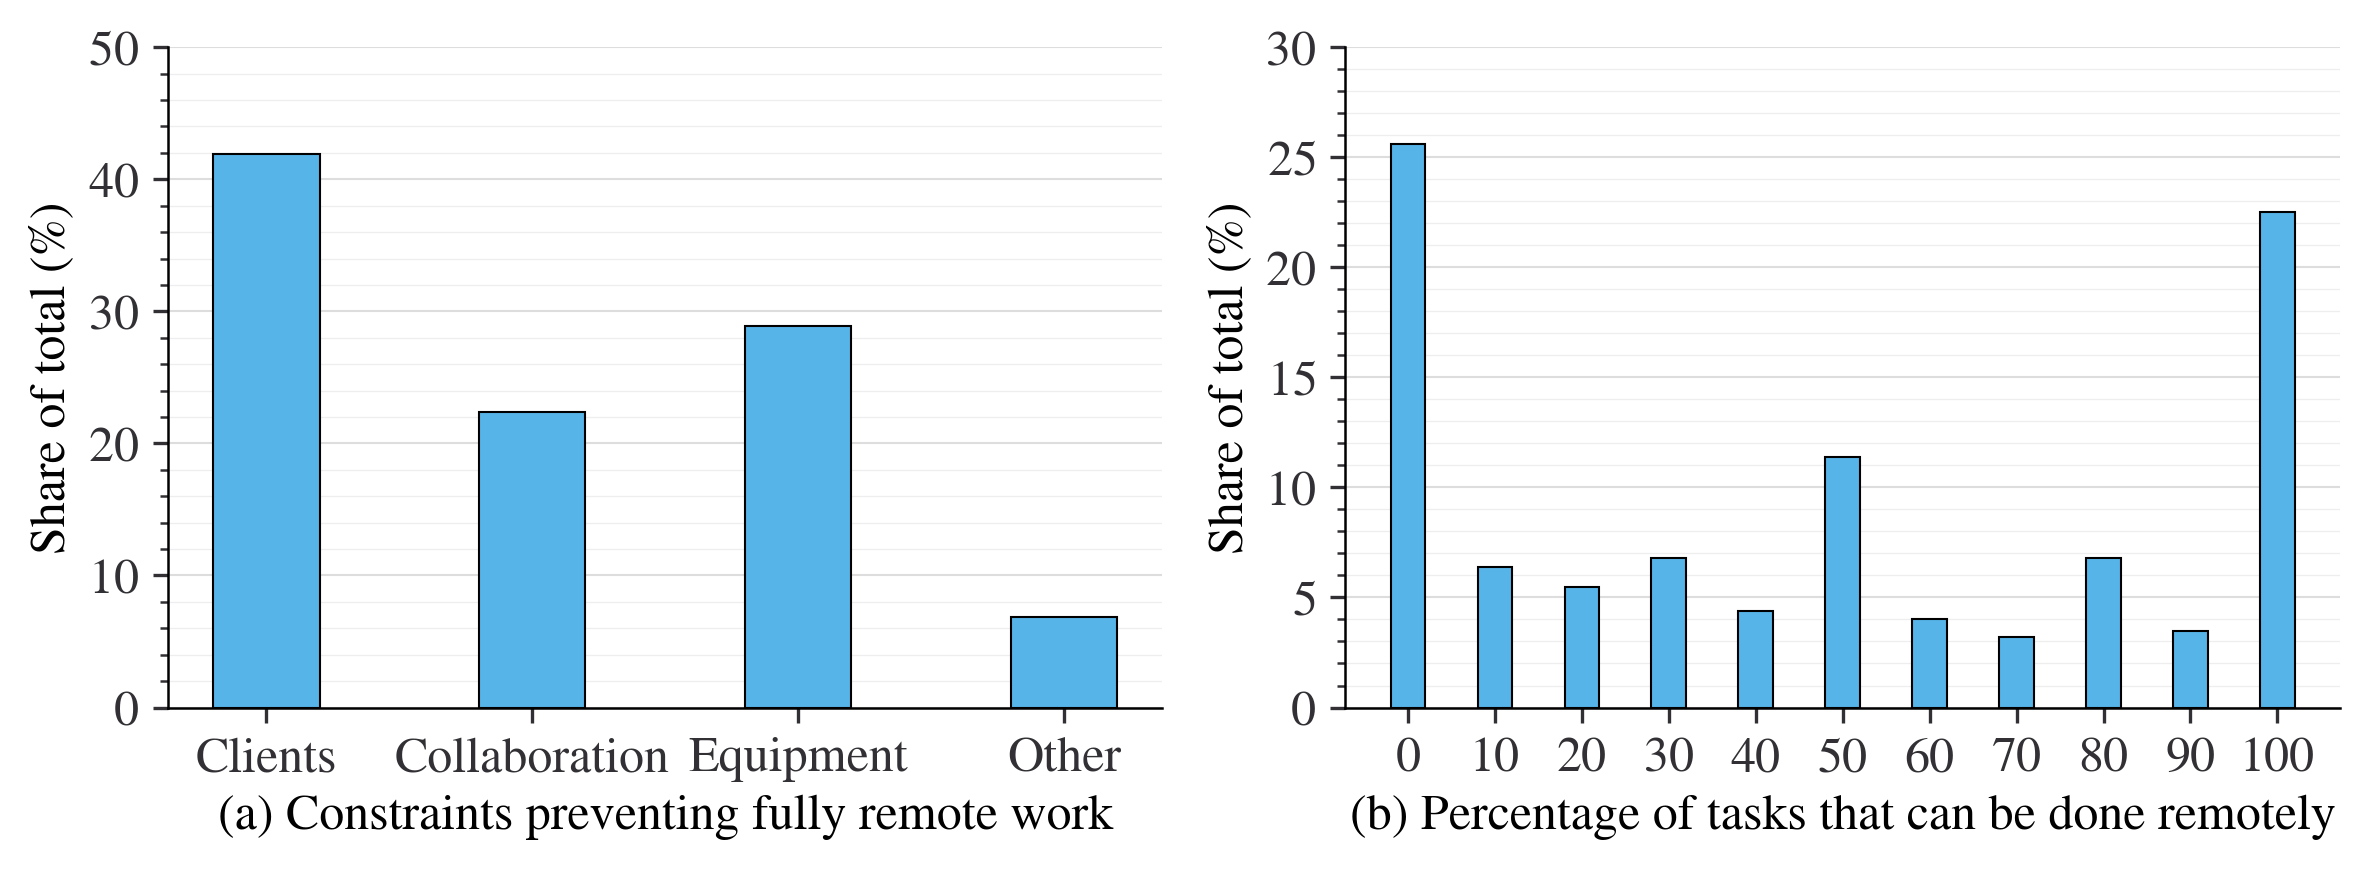

In [28]:
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(figsize[0], figsize[1]/1.5))

# Constraint Types
wt_res = hf.weighted_freq(df, 'worktime_nonremotable_why') * 100
axs[0] = hf.plot_column([str(i) for i in list(wt_res.index)], list(wt_res), 
            xlabel='(a) Constraints preventing fully remote work', 
            ylabel='Share of total (%)', 
            ylim=[0, 50],
            blabels = ['Clients', 'Collaboration', 'Equipment', 'Other'],
            ax = axs[0]);

# Percentage of tasks
wt_res = hf.weighted_freq(df, 'remoteable_bins') * 100
axs[1] = hf.plot_column([str(i) for i in list(wt_res.index)], list(wt_res), 
            xlabel='(b) Percentage of tasks that can be done remotely', 
            ylabel='Share of total (%)', 
            ylim=[0, 30],
            ax = axs[1]);

### Mode Choice

Sample size: 70029
Sample size: 70029
Sample size: 70029
Sample size: 70029
Sample size: 70029
Sample size: 70029
Sample size: 70029


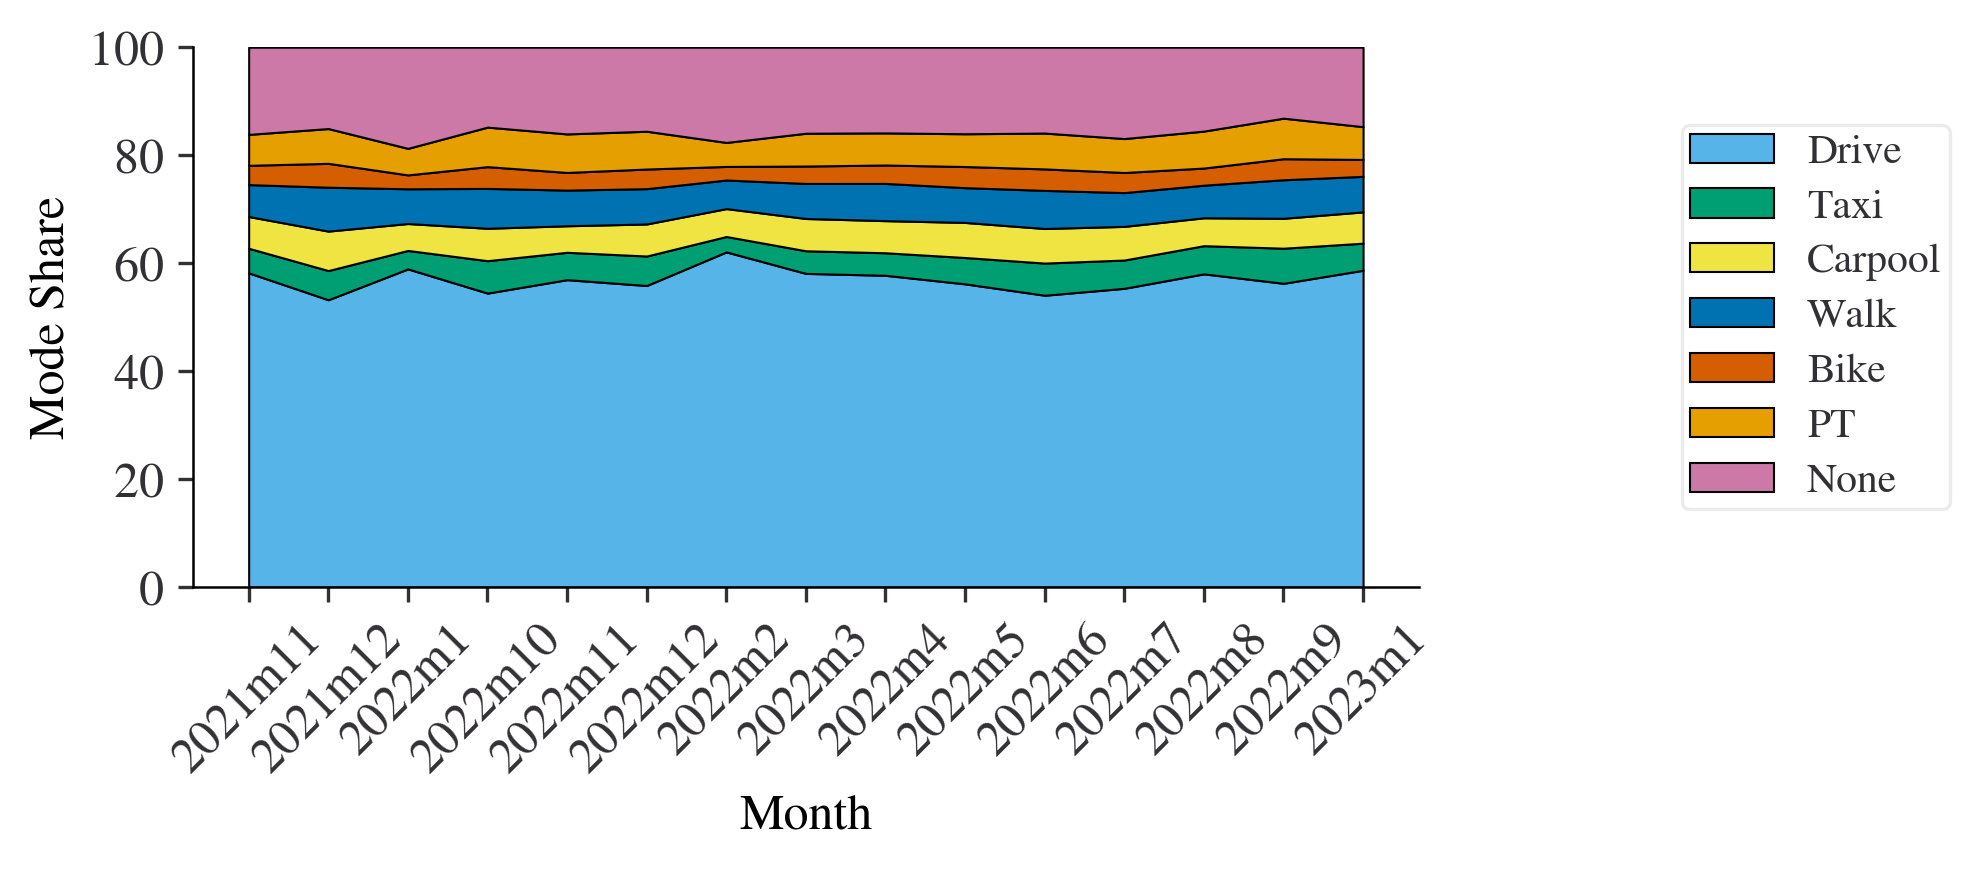

In [31]:
wt_pt = hf.weighted_month(df, 'publictr_current_pct') 
wt_bike = hf.weighted_month(df, 'bicycle_current_pct') 
wt_walk = hf.weighted_month(df, 'walk_current_pct') 
wt_carpool = hf.weighted_month(df, 'carpool_current_pct') 
wt_drive = hf.weighted_month(df, 'drivealone_current_pct') 
wt_taxi = hf.weighted_month(df, 'taxi_current_pct') 
wt_nocom = hf.weighted_month(df, 'nocommute_current_pct') 
wt_res = pd.concat([wt_drive, wt_taxi, wt_carpool, wt_walk, wt_bike, wt_pt, wt_nocom], axis=1)
wt_res.columns = ['Drive', 'Taxi', 'Carpool', 'Walk', 'Bike', 'PT', 'None']
hf.plot_area(wt_res, bbox=[1.45, 0.5], xlabel='Month', ylabel='Mode Share');

Sample size: 119148
Sample size: 119148


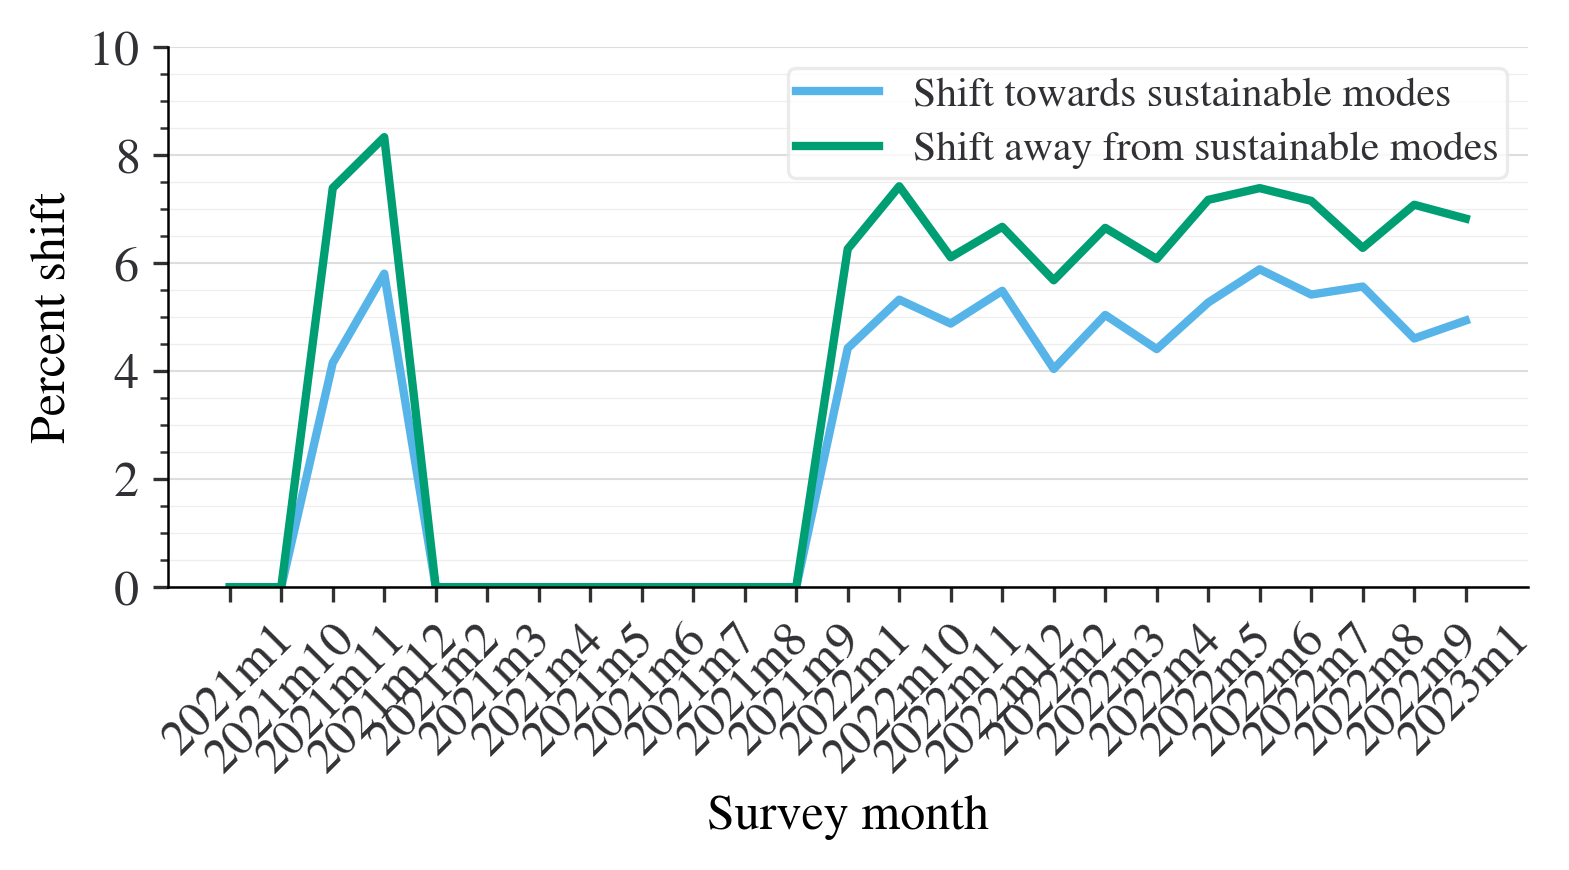

In [35]:
fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=(figsize[0]/1.5, figsize[1]/1.5))

# Mode shift from non-sustainable to sustainable
wt_results = hf.weighted_month(plot_df, 'sus_switch')
hf.plot_timeseries(wt_results, "Survey month", "Percent shift", [0, 10], 
                   rotate=45, 
                   ax=axs,
                   datalabel = 'Shift towards sustainable modes');

# Mode shift from sustainable to non-sustainable
wt_results = hf.weighted_month(plot_df, 'nonsus_switch')
hf.plot_timeseries(wt_results, "Survey month", "Percent shift", [0, 10], 
                   rotate=45, 
                   ax=axs,
                   datalabel = 'Shift away from sustainable modes');
plt.legend();

In [ ]:
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(figsize[0], figsize[1]/1.5))

wt_pt = hf.weighted_avg(plot_df, 'publictr_current_pct') 
wt_bike = hf.weighted_avg(plot_df, 'bicycle_current_pct') 
wt_walk = hf.weighted_avg(plot_df, 'walk_current_pct') 
wt_carpool = hf.weighted_avg(plot_df, 'carpool_current_pct') 
wt_drive = hf.weighted_avg(plot_df, 'drivealone_current_pct') 
wt_taxi = hf.weighted_avg(plot_df, 'taxi_current_pct') 
wt_nocom = hf.weighted_avg(plot_df, 'nocommute_current_pct') 
wt_ebp = pd.DataFrame([wt_drive, wt_carpool, wt_pt, wt_bike, wt_walk, wt_taxi, wt_nocom]) 
wt_ebp = wt_ebp / wt_ebp.sum() * 100

# Mode choice by work location
wt_faf = hf.weighted_freq(df, 'commute_mode_faf') * 100
wt_cowork = hf.weighted_freq(df, 'commute_mode_cowork') * 100
wt_public = hf.weighted_freq(df, 'commute_mode_public') * 100
wt_ebp.index = wt_faf.index
wt_res = pd.concat([wt_ebp, wt_faf, wt_cowork, wt_public], axis=1)
x = 1 / (1 - wt_res.loc[len(wt_res)] / 100)
wt_res = wt_res * x.to_numpy()
wt_res = wt_res.drop(7.0)

wt_res.columns = ['All Locations', 'FFH', 'Coworking Space', 'Public Space']
axs[0] = hf.plot_clustered_column(wt_res, 
            xlabel='(a) Commute mode', 
            ylabel='Share of total (%)', 
            ylim=[0, 85],
            xlim=[-0.2, 5.6],
            blabels = ['Drive', 'Carpool', 'Transit', 'Bike', 'Walk', 'Taxi'],
            ax = axs[0]);

# Mode choice by work location
wt_res = wt_res.drop(1.0)
wt_res.columns = ['All Locations', 'FFH', 'Coworking Space', 'Public Space']
axs[1] = hf.plot_clustered_column(wt_res, 
            xlabel='(b) Commute mode (excluding driving)', 
            ylabel='Share of total (%)', 
            ylim=[0, 14],
            xlim=[-0.2, 4.7],
            blabels = ['Carpool', 'Transit', 'Bike', 'Walk', 'Taxi'],
            ax = axs[1]);

Sample size: 5681
Sample size: 7705
Sample size: 7705
Sample size: 7705
Sample size: 7705
Sample size: 7705


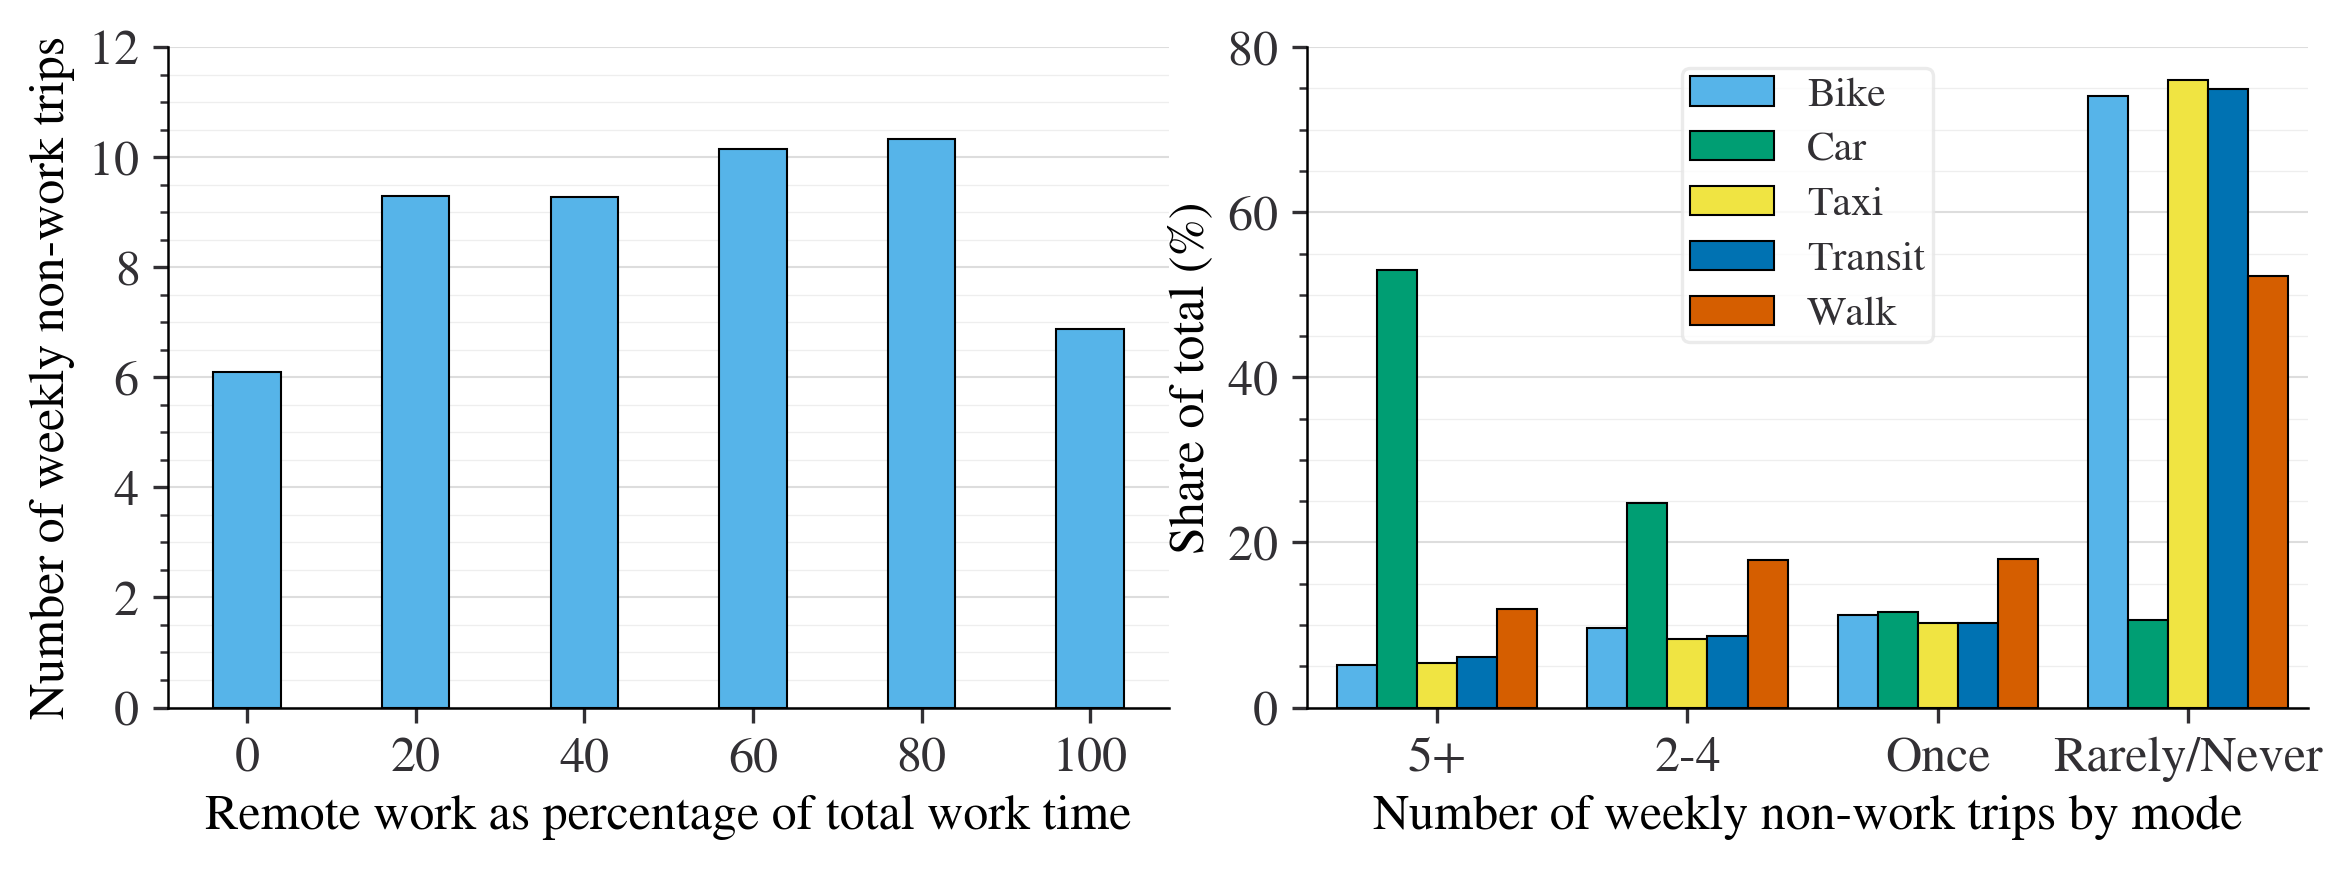

In [38]:
# Leisure
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(figsize[0], figsize[1]/1.5))

wt_res = hf.weighted_avg_group(df, 'nonwork_count', 'wfh_curr_bins')
axs[0] = hf.plot_column([str(i) for i in wt_res.index], list(wt_res),
            ylabel='Number of weekly non-work trips', 
            xlabel='Remote work as percentage of total work time',  
            ylim=[0, 12],
            ax = axs[0]);

# Mode choice by work location
wt_bike = hf.weighted_freq(df, 'freq_nonwork_bike') * 100
wt_car = hf.weighted_freq(df,'freq_nonwork_car') * 100
wt_taxi = hf.weighted_freq(df,'freq_nonwork_taxi') * 100
wt_transit = hf.weighted_freq(df,'freq_nonwork_transit') * 100
wt_walk = hf.weighted_freq(df,'freq_nonwork_walk') * 100
wt_res = pd.concat([wt_bike, wt_car, wt_taxi, wt_transit, wt_walk], axis=1)
wt_res.columns = ['Bike', 'Car', 'Taxi', 'Transit', 'Walk']
hf.plot_clustered_column(wt_res, 
            xlabel='Number of weekly non-work trips by mode', 
            ylabel='Share of total (%)', 
            ylim=[0, 80],
            xlim=[-0.2, 3.8],
            blabels=['5+', '2-4', 'Once', 'Rarely/Never'],
            ax = axs[1]);

Sample size: 2933
Sample size: 2933
Sample size: 2933
Sample size: 2933
Sample size: 2933
Sample size: 2906
Sample size: 2906
Sample size: 2906
Sample size: 2906
Sample size: 2906


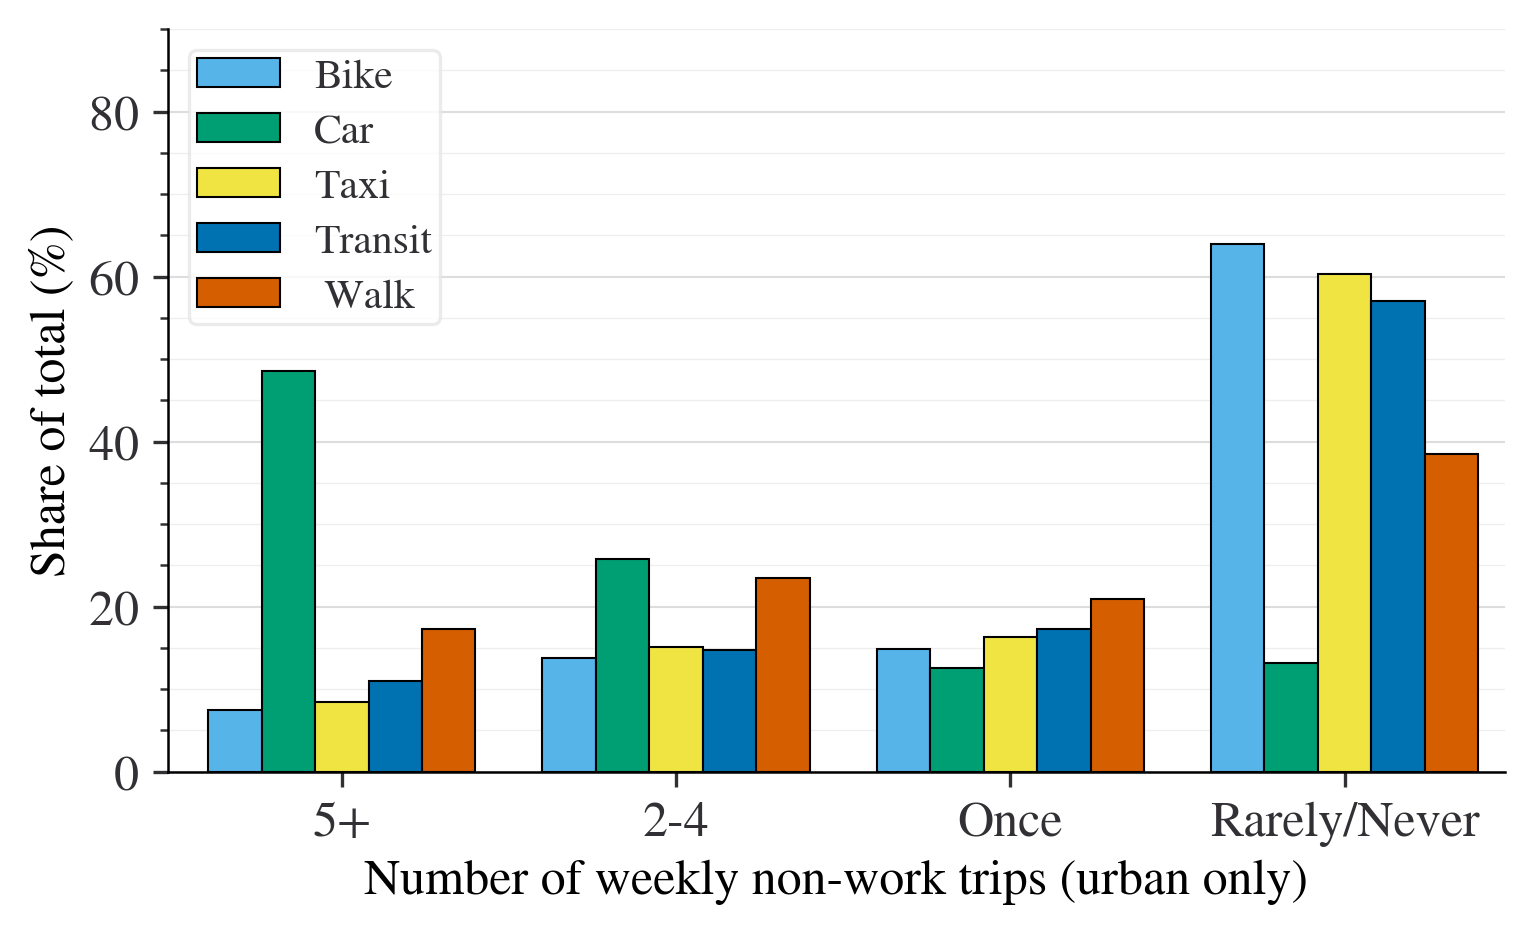

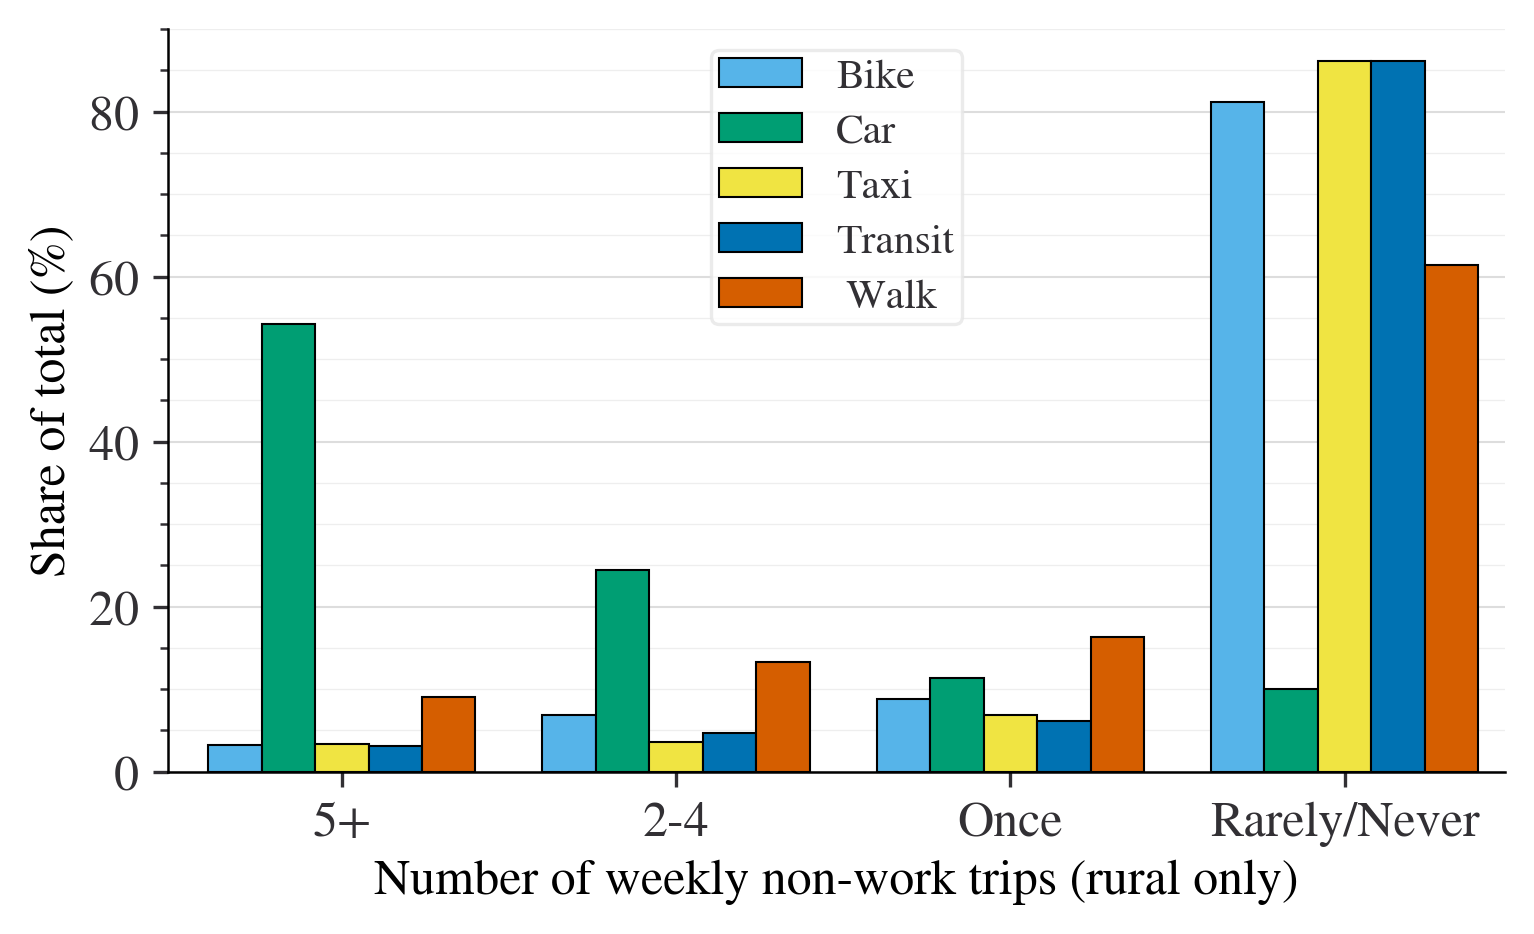

In [39]:
# Mode choice by work location
df_urban = df[df.home_pop_category == 'Urban']
wt_bike = hf.weighted_freq(df_urban, 'freq_nonwork_bike') * 100
wt_car = hf.weighted_freq(df_urban,'freq_nonwork_car') * 100
wt_taxi = hf.weighted_freq(df_urban,'freq_nonwork_taxi') * 100
wt_transit = hf.weighted_freq(df_urban,'freq_nonwork_transit') * 100
wt_walk = hf.weighted_freq(df_urban,'freq_nonwork_walk') * 100
wt_res = pd.concat([wt_bike, wt_car, wt_taxi, wt_transit, wt_walk], axis=1)
wt_res.columns = ['Bike', 'Car', 'Taxi', 'Transit', ' Walk']
hf.plot_clustered_column(wt_res, 
            xlabel='Number of weekly non-work trips (urban only)', 
            ylabel='Share of total (%)', 
            ylim=[0, 90],
            xlim = [-0.2, 3.8],
            blabels=['5+', '2-4', 'Once', 'Rarely/Never']);

# Mode choice by work location
df_rural = df[df.home_pop_category == 'Rural']
wt_bike = hf.weighted_freq(df_rural, 'freq_nonwork_bike') * 100
wt_car = hf.weighted_freq(df_rural,'freq_nonwork_car') * 100
wt_taxi = hf.weighted_freq(df_rural,'freq_nonwork_taxi') * 100
wt_transit = hf.weighted_freq(df_rural,'freq_nonwork_transit') * 100
wt_walk = hf.weighted_freq(df_rural,'freq_nonwork_walk') * 100
wt_res = pd.concat([wt_bike, wt_car, wt_taxi, wt_transit, wt_walk], axis=1)
wt_res.columns = ['Bike', 'Car', 'Taxi', 'Transit', ' Walk']
wt_res.index = ['5+', '2-4', 'Once', 'Rarely/Never']
hf.plot_clustered_column(wt_res, 
            xlabel='Number of weekly non-work trips (rural only)', 
            ylabel='Share of total (%)', 
            ylim=[0, 90],
            xlim = [-0.2, 3.8],
            blabels=['5+', '2-4', 'Once', 'Rarely/Never']);

### Departure Time Analysis

#### Question 6: Aggregate Results - Histogram

In [40]:
# Plots a stacked column chart of the input variable
def plot_clustered_column_alt(df, xlabel=None, ylabel=None, ylim=[None, None], xlim=[None,None], 
                        width=None, blabels=None, rotate=0, ax=None):
    if ax == None:
        fig, ax = plt.subplots(constrained_layout=True)
    if blabels == None:
        labels = df.index
    else:
        labels = blabels

    if width == None:
        width = 0.8/len(df.columns)
    
    multiplier = 0
    x = np.arange(len(labels)) 
    cols = df.columns
    for col in cols:
        offset = width * multiplier
        ax.bar(x+offset, list(df[col]), width=width, label= str(col), edgecolor = "black", linewidth=0.5, align='center')
        multiplier += 1
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_xticks(x + (len(df.columns)-1)/2*width, labels)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.5, color='#DDDDDD', zorder=0)
    ax.grid(axis='y', which='minor', color='#EEEEEE', linewidth=0.3, zorder=0)
    ax.minorticks_on()
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.legend()
    if ax != None:
        return ax

Sample size: 18922
Sample size: 16273


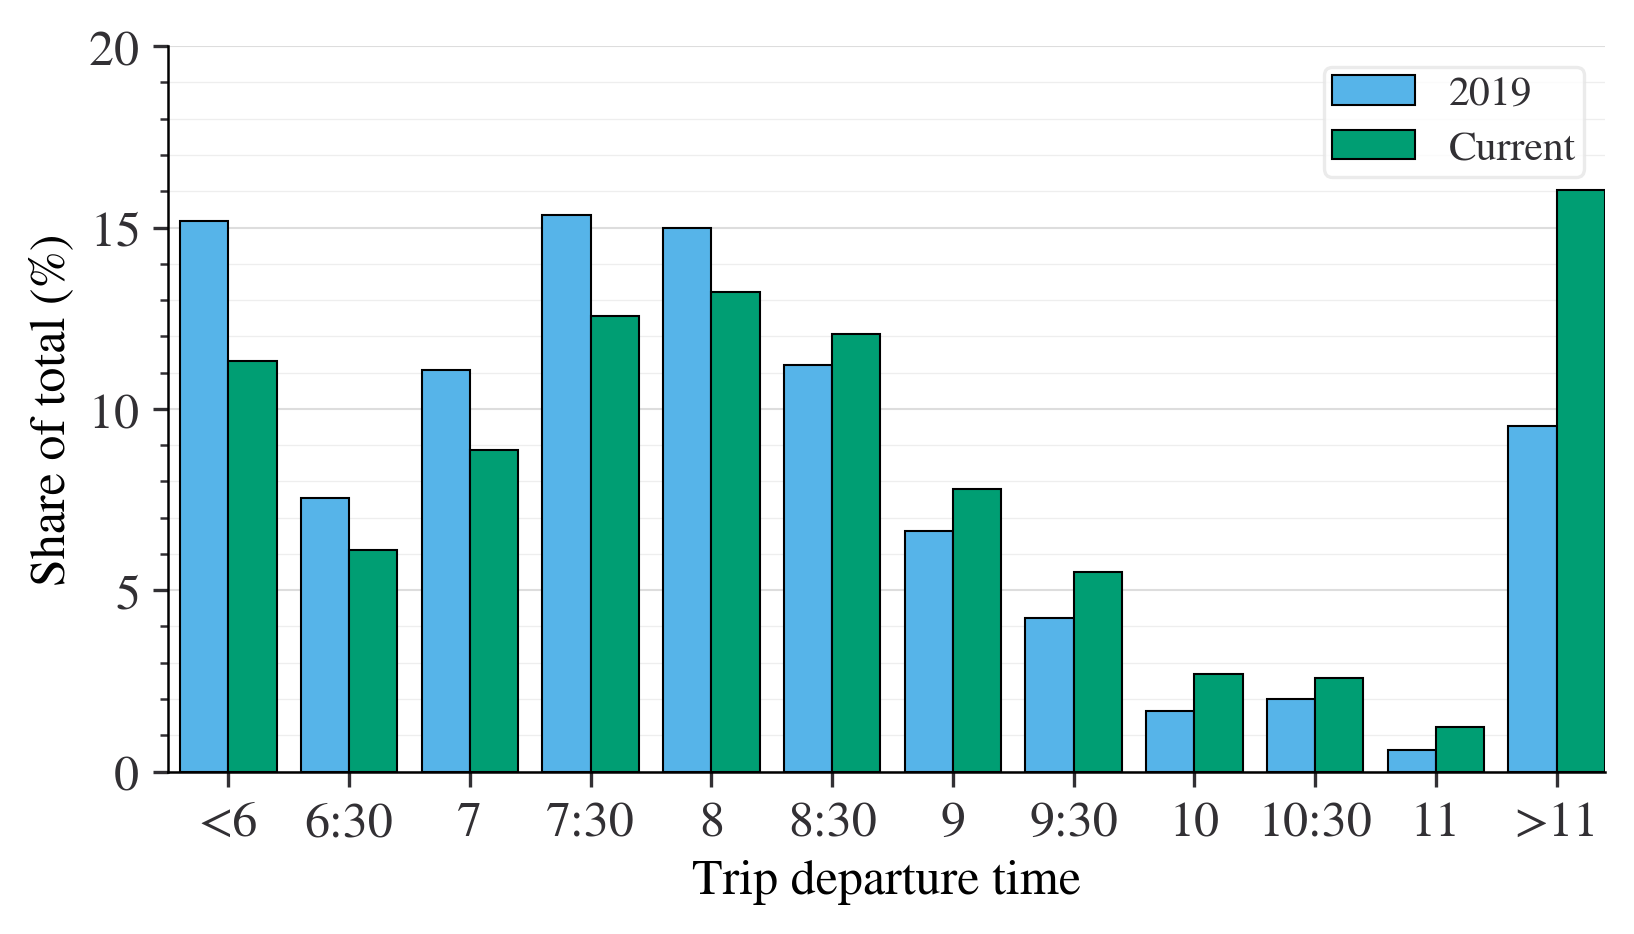

In [41]:
fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=(figsize[0]/1.5, figsize[1]/1.5))

wt_precovid = hf.weighted_freq(df, 'leavetime_preCOVID_quant') * 100
wt_current = hf.weighted_freq(df, 'leavetime_current_quant_adj') * 100
wt_res = pd.concat([wt_precovid, wt_current], axis=1)
wt_res.index = ['<6', '6:30', '7', '7:30', '8', '8:30', '9', '9:30', '10', '10:30', '11', '>11']
wt_res.columns = ['2019', 'Current']
hf.plot_clustered_column(wt_res, 
            xlabel='Trip departure time', 
            ylabel='Share of total (%)',
            xlim=[-0.3, 11.6],
            width=0.4,
            blabels=['<6', '6:30', '7', '7:30', '8', '8:30', '9', '9:30', '10', '10:30', '11', '>11'],
            ylim=[0, 20],
            ax = axs);

In [42]:
wt_res

2019    Current
<6     15.181262  11.328155
6:30    7.549665   6.112887
7      11.064743   8.856597
7:30   15.348891  12.566527
8      14.998483  13.213959
8:30   11.197069  12.068454
9       6.645929   7.794739
9:30    4.223141   5.512007
10      1.662975   2.684867
10:30   2.001617   2.582433
11      0.587111   1.240149
>11     9.539112  16.039226

Sample size: 16273


C:\Users\Nick\AppData\Local\Temp\ipykernel_2232\3257232985.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(['7:00AM', '7:15AM', '7:30AM', '7:45AM', '8:00AM', '8:15AM', '8:30AM']);


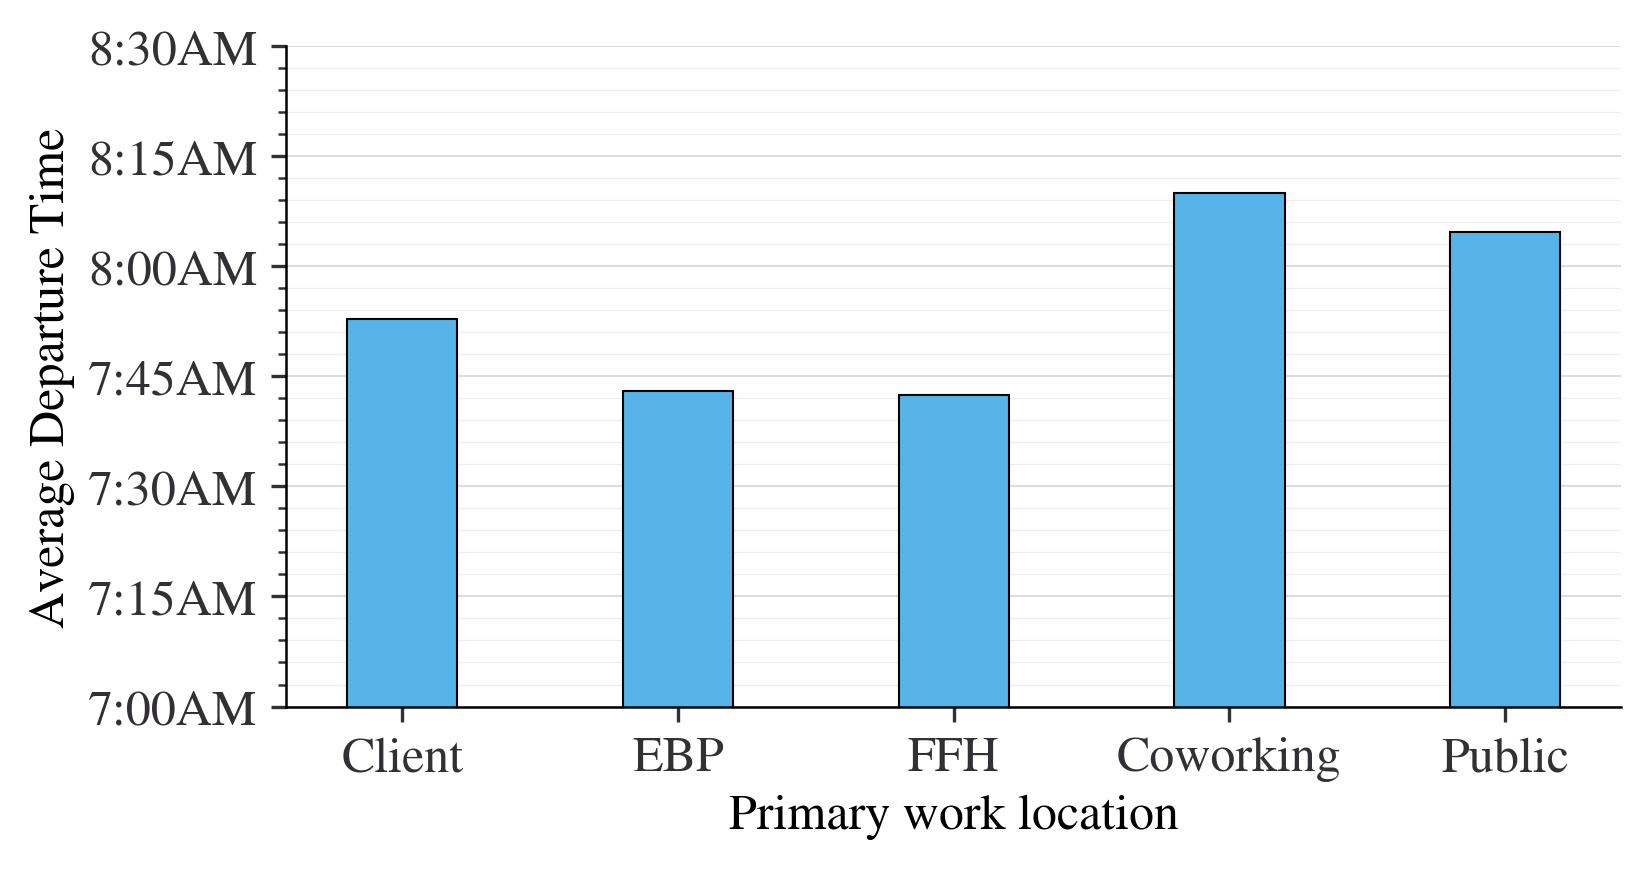

In [43]:
fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=(figsize[0]/1.5, figsize[1]/1.5))

wt_res = hf.weighted_avg_group(df, 'leavetime_current_quant', 'top_loc')
wt_res = wt_res.drop('worktime_curr_home_pct')
hf.plot_column(list(wt_res.index), 
            list(wt_res), 
            xlabel='Primary work location', 
            ylabel='Average Departure Time', 
            ylim=[7, 8.5], 
            blabels=['Client', 'EBP', 'FFH', 'Coworking', 'Public'],
            ax = axs);
axs.set_yticklabels(['7:00AM', '7:15AM', '7:30AM', '7:45AM', '8:00AM', '8:15AM', '8:30AM']);

### Third Place Travel Mode and Travel Time

#### Question 21: Third Place Travel Mode - Aggregate

Sample size: 2319
Sample size: 2371
Sample size: 2235
Sample size: 2319
Sample size: 2371
Sample size: 2235


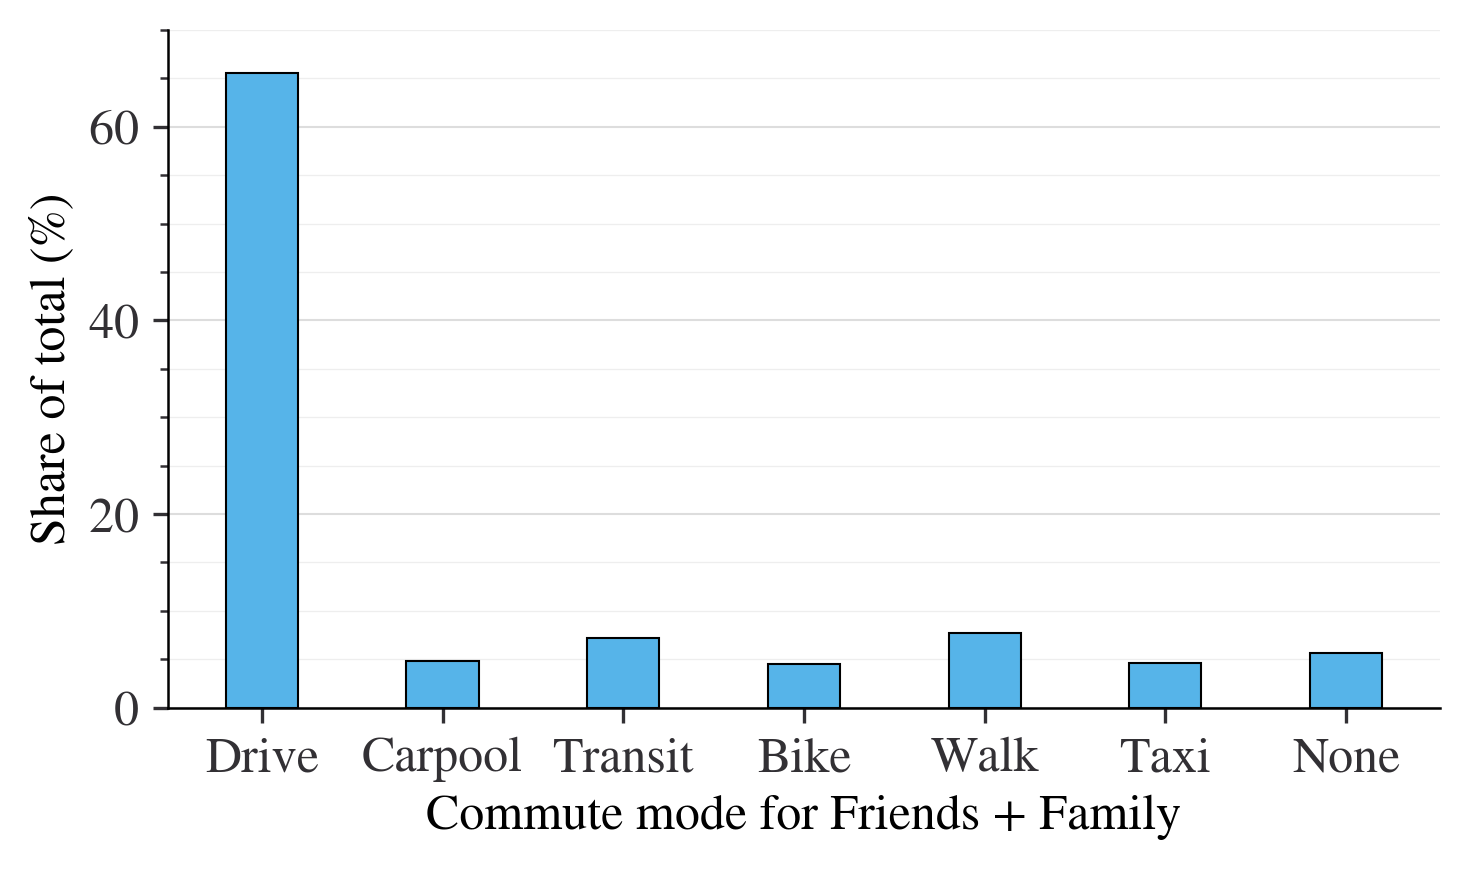

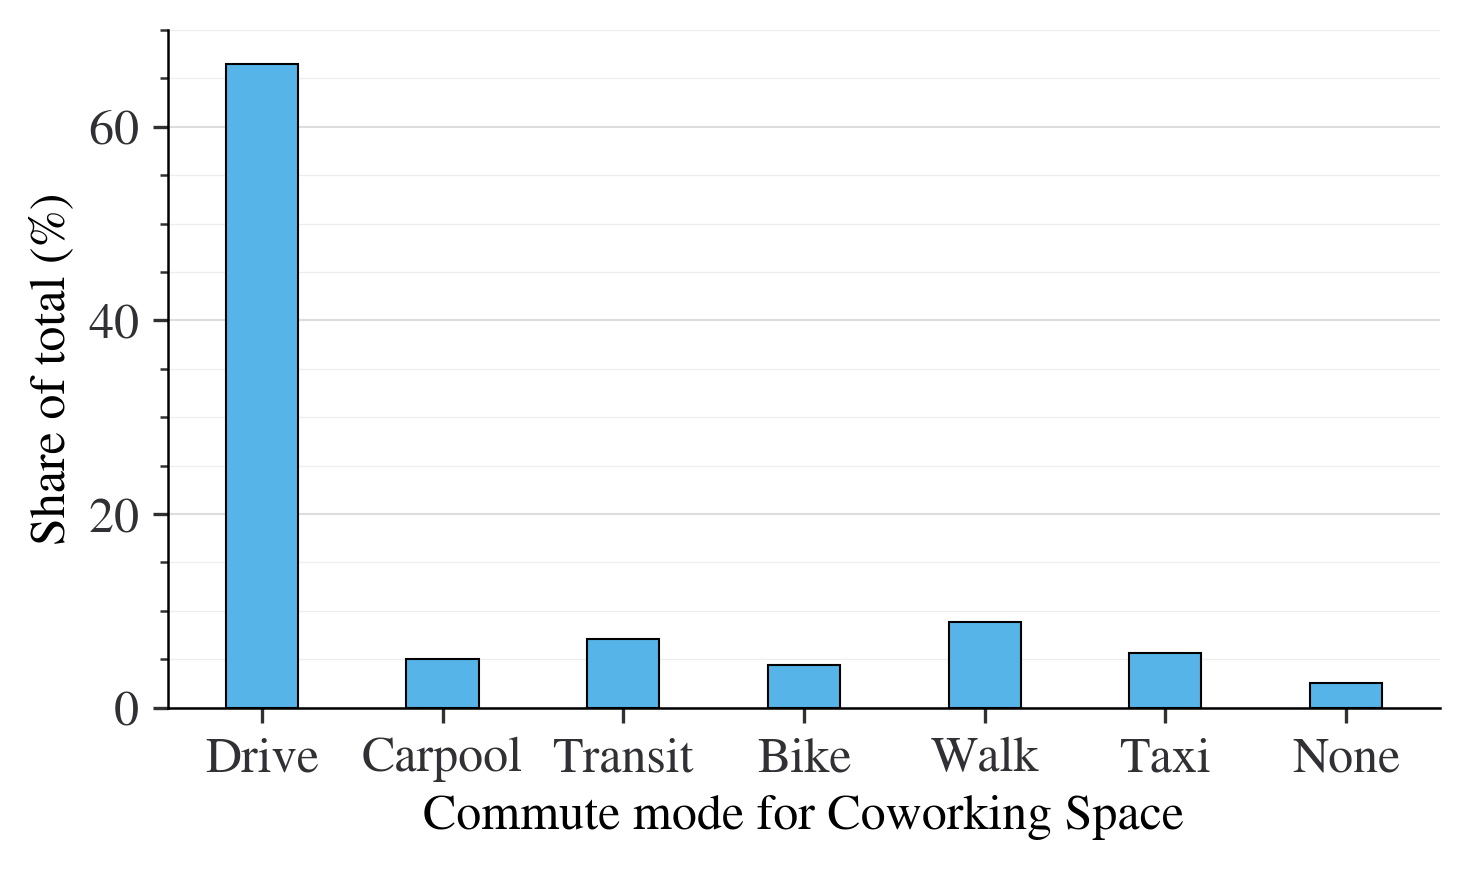

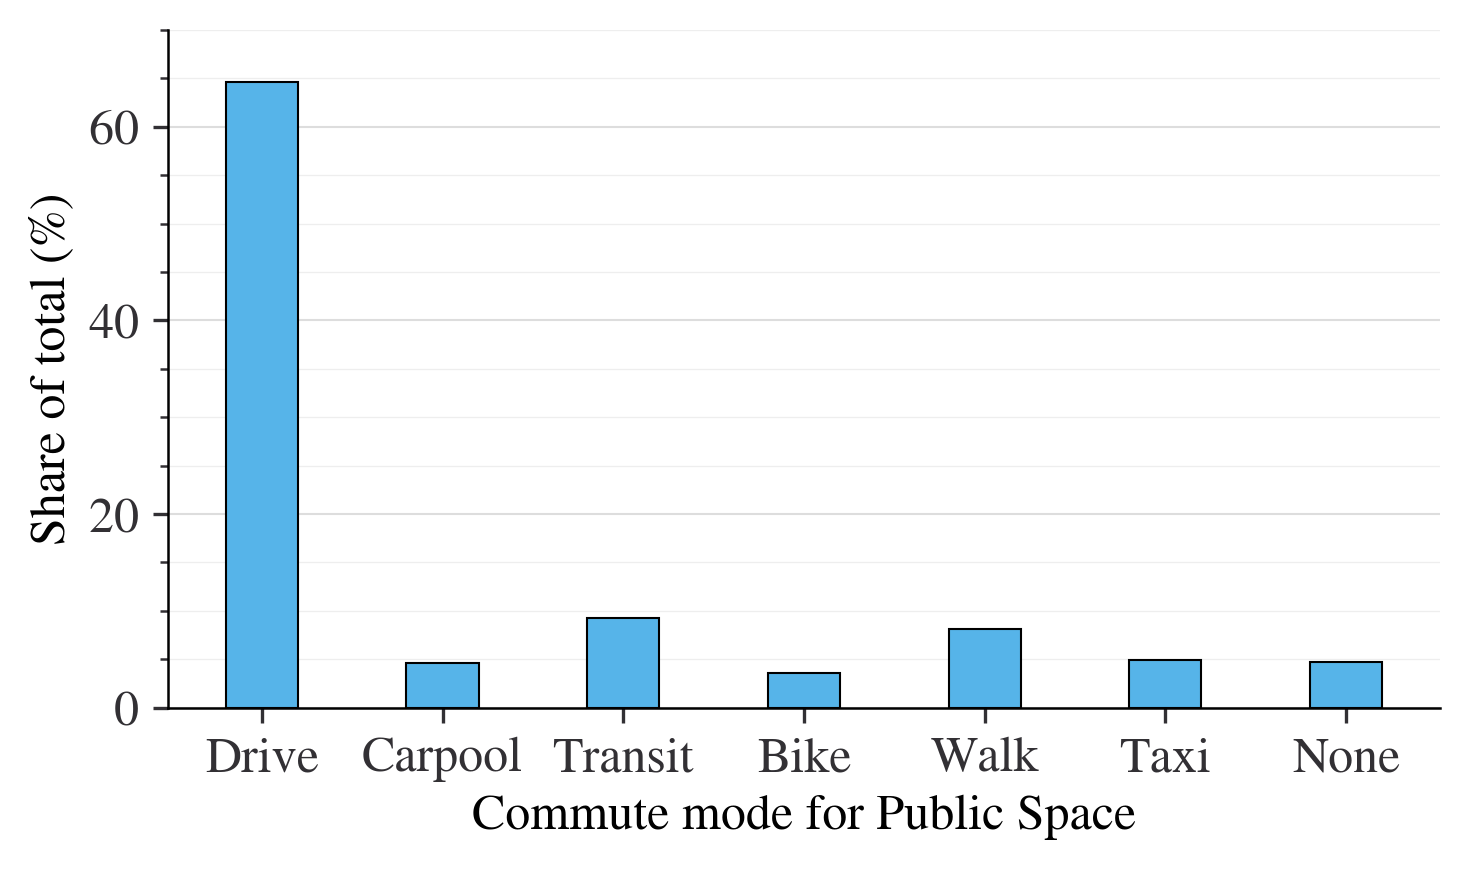

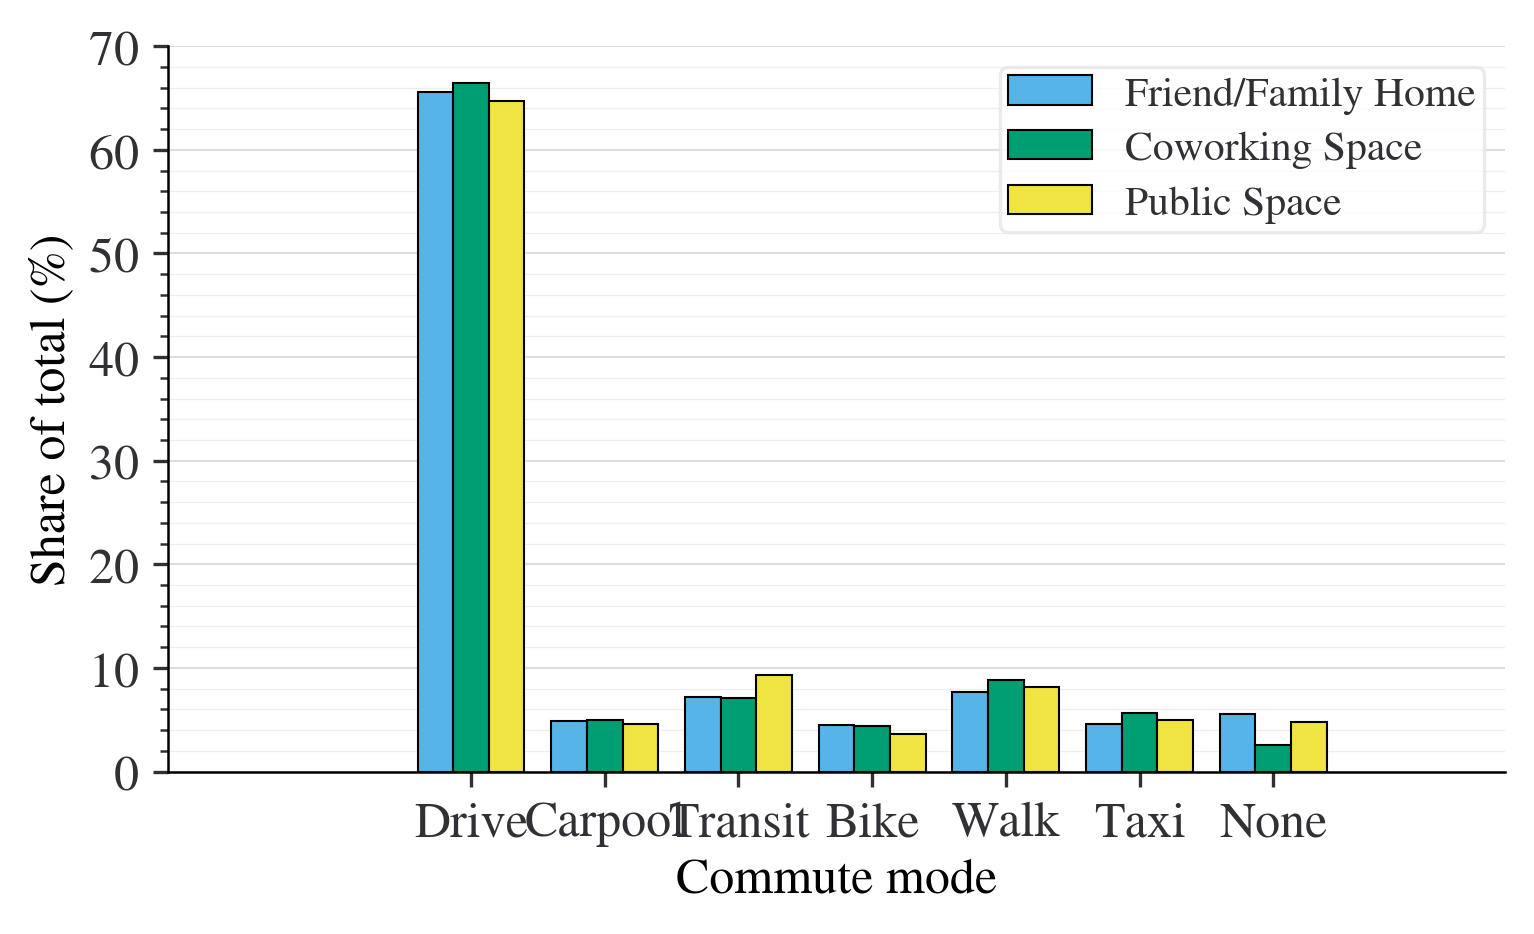

In [44]:
# Friends + Family
wt_res = hf.weighted_freq(df, 'commute_mode_faf')*100
hf.plot_column([str(i) for i in list(wt_res.index)], list(wt_res), 
            xlabel='Commute mode for Friends + Family', 
            ylabel='Share of total (%)', 
            ylim=[0, 70],
            blabels = ld['modes']);

# Coworking space
wt_res = hf.weighted_freq(df, 'commute_mode_cowork')*100
hf.plot_column([str(i) for i in list(wt_res.index)], list(wt_res), 
            xlabel='Commute mode for Coworking Space', 
            ylabel='Share of total (%)', 
            ylim=[0, 70],
            blabels = ld['modes']);

# Public space
wt_res = hf.weighted_freq(df, 'commute_mode_public')*100
hf.plot_column([str(i) for i in list(wt_res.index)], list(wt_res), 
            xlabel='Commute mode for Public Space', 
            ylabel='Share of total (%)', 
            ylim=[0, 70],
            blabels = ld['modes']);

wt_faf = hf.weighted_freq(df, 'commute_mode_faf') * 100
wt_cowork = hf.weighted_freq(df, 'commute_mode_cowork') * 100
wt_public = hf.weighted_freq(df, 'commute_mode_public') * 100
wt_res = pd.concat([wt_faf, wt_cowork, wt_public], axis=1)
wt_res.columns = ['Friend/Family Home', 'Coworking Space', 'Public Space']
hf.plot_clustered_column(wt_res, 
            xlabel='Commute mode', 
            ylabel='Share of total (%)', 
            ylim=[0, 70],
            blabels = ld['modes']);

## 4. Work perceptions by third place location

Sample size: 3383
Sample size: 11050
Sample size: 8265
Sample size: 10350
Sample size: 9245
Sample size: 9261
Sample size: 9227
Sample size: 2895
Sample size: 9012
Sample size: 7061
Sample size: 8447
Sample size: 7477
Sample size: 7518
Sample size: 7481


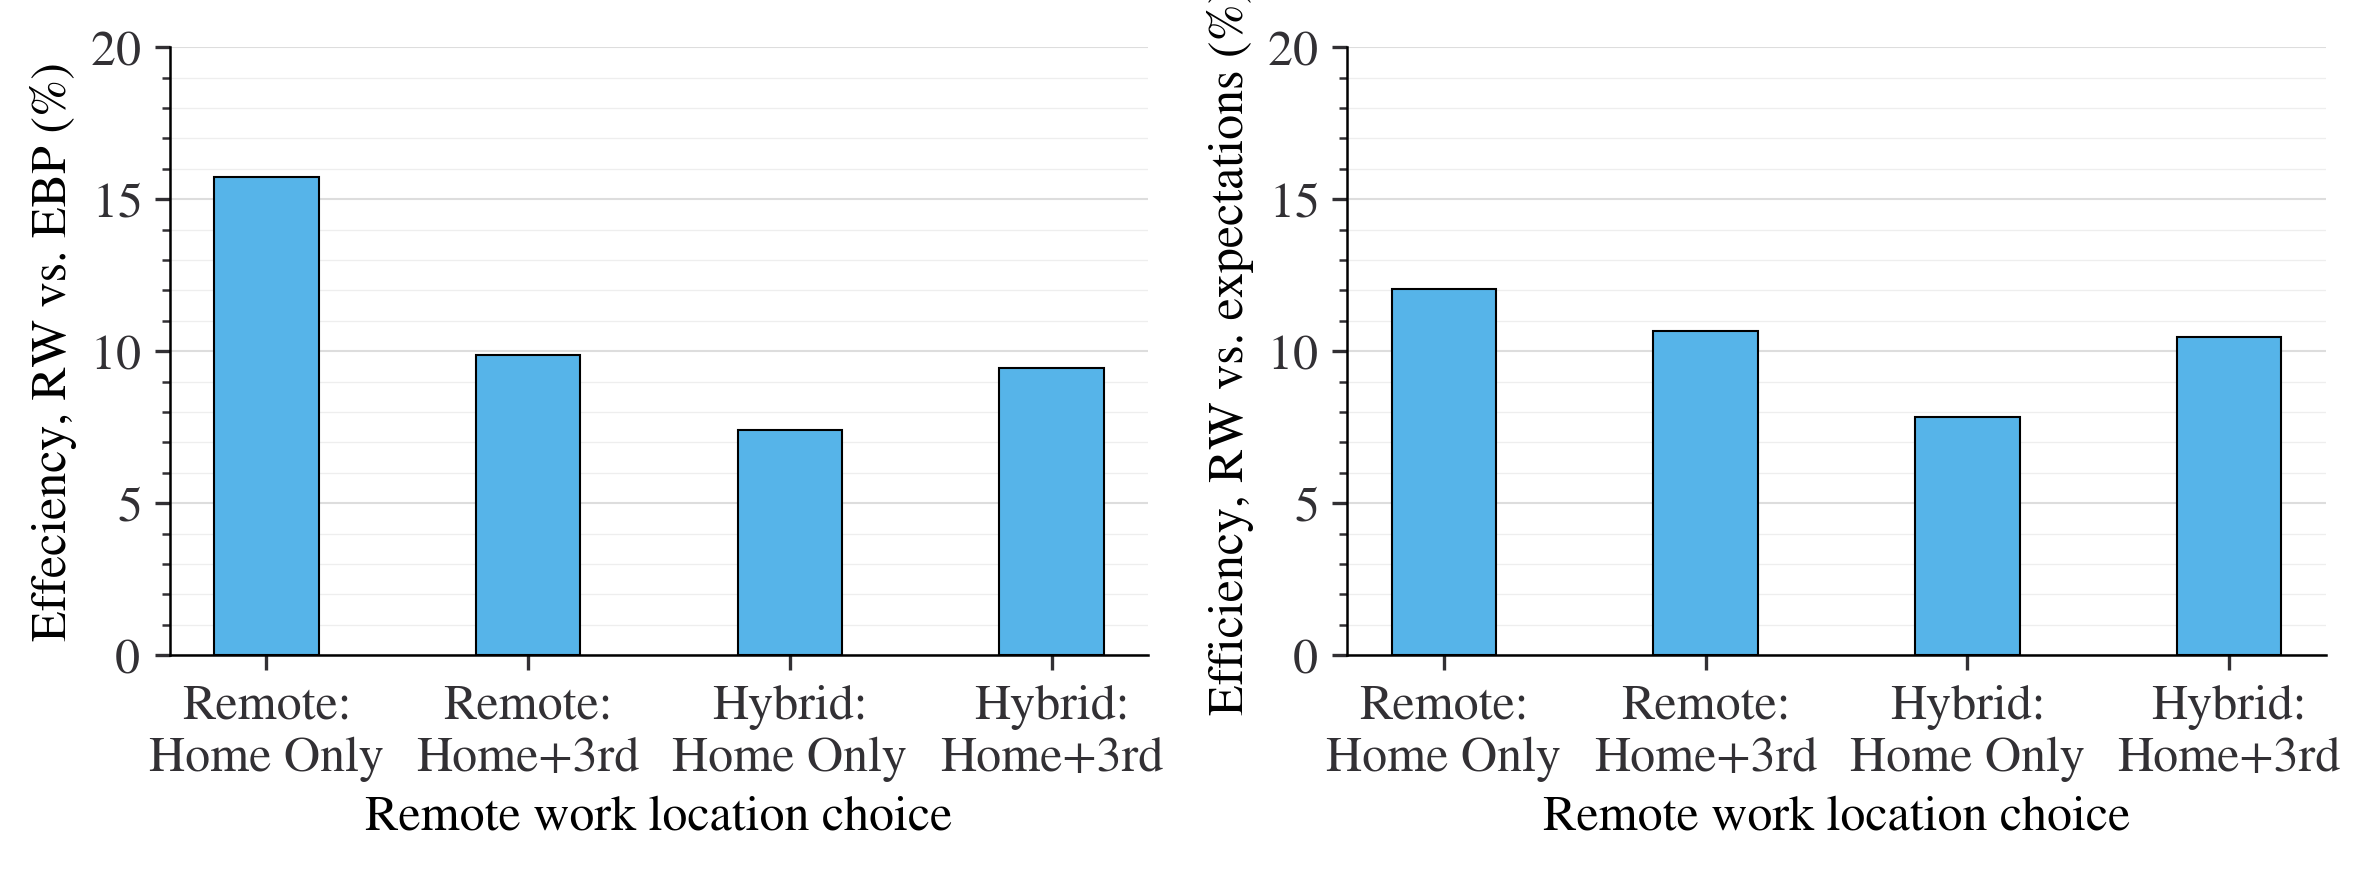

In [45]:
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(figsize[0], figsize[1]/1.5))
# fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=figsize)

# Returns column filtered by up to two column values
target_col = 'wfh_eff_COVID_quant'

df_home = df[df.home_only == 1]
wt_home = hf.weighted_avg(df_home, target_col) 

df_home_third = df[df.home_third == 1]
wt_home_third = hf.weighted_avg(df_home_third, target_col) 

df_ebp_home_only = df[df.ebp_home_only == 1]
wt_ebp_home_only = hf.weighted_avg(df_ebp_home_only, target_col) 

df_ebp_home_third = df[df.ebp_home_third == 1]
wt_ebp_home_third = hf.weighted_avg(df_ebp_home_third, target_col) 

df_ebp_home_public = df[df.ebp_home_public == 1]
wt_ebp_home_public = hf.weighted_avg(df_ebp_home_public, target_col) 

df_ebp_home_cowork = df[df.ebp_home_cowork == 1]
wt_ebp_home_cowork = hf.weighted_avg(df_ebp_home_cowork, target_col) 

df_ebp_home_faf = df[df.ebp_home_faf == 1]
wt_ebp_home_faf = hf.weighted_avg(df_ebp_home_faf, target_col) 

wt_res = [wt_home, wt_home_third, wt_ebp_home_only, wt_ebp_home_third]#,
#           wt_ebp_home_public, wt_ebp_home_cowork, wt_ebp_home_faf]

labels = ['Remote:\nHome Only', 'Remote:\nHome+3rd', 'Hybrid:\nHome Only', 'Hybrid:\nHome+3rd']
axs[0] = hf.plot_column(labels, wt_res,  
            xlabel='Remote work location choice', 
            ylabel='Effeciency, RW vs. EBP (%)', 
            ylim=[0, 20],
            blabels = labels,
            ax = axs[0]);


target_col = 'wfh_expect_quant'

df_home = df[df.home_only == 1]
wt_home = hf.weighted_avg(df_home, target_col) 

df_home_third = df[df.home_third == 1]
wt_home_third = hf.weighted_avg(df_home_third, target_col) 

df_ebp_home_only = df[df.ebp_home_only == 1]
wt_ebp_home_only = hf.weighted_avg(df_ebp_home_only, target_col) 

df_ebp_home_third = df[df.ebp_home_third == 1]
wt_ebp_home_third = hf.weighted_avg(df_ebp_home_third, target_col) 

df_ebp_home_public = df[df.ebp_home_public == 1]
wt_ebp_home_public = hf.weighted_avg(df_ebp_home_public, target_col) 

df_ebp_home_cowork = df[df.ebp_home_cowork == 1]
wt_ebp_home_cowork = hf.weighted_avg(df_ebp_home_cowork, target_col) 

df_ebp_home_faf = df[df.ebp_home_faf == 1]
wt_ebp_home_faf = hf.weighted_avg(df_ebp_home_faf, target_col) 

wt_res = [wt_home, wt_home_third, wt_ebp_home_only, wt_ebp_home_third]#,
#           wt_ebp_home_public, wt_ebp_home_cowork, wt_ebp_home_faf]

labels = ['Remote:\nHome Only', 'Remote:\nHome+3rd', 'Hybrid:\nHome Only', 'Hybrid:\nHome+3rd']
axs[1] = hf.plot_column(labels, wt_res,  
            xlabel='Remote work location choice', 
            ylabel='Efficiency, RW vs. expectations (%)', 
            ylim=[0, 20],
            blabels = labels,
            ax = axs[1]);

Sample size: 718
Sample size: 3123
Sample size: 3023
Sample size: 2964
Sample size: 2689
Sample size: 2613
Sample size: 2658
Sample size: 531
Sample size: 2228
Sample size: 2191
Sample size: 2069
Sample size: 1883
Sample size: 1821
Sample size: 1851


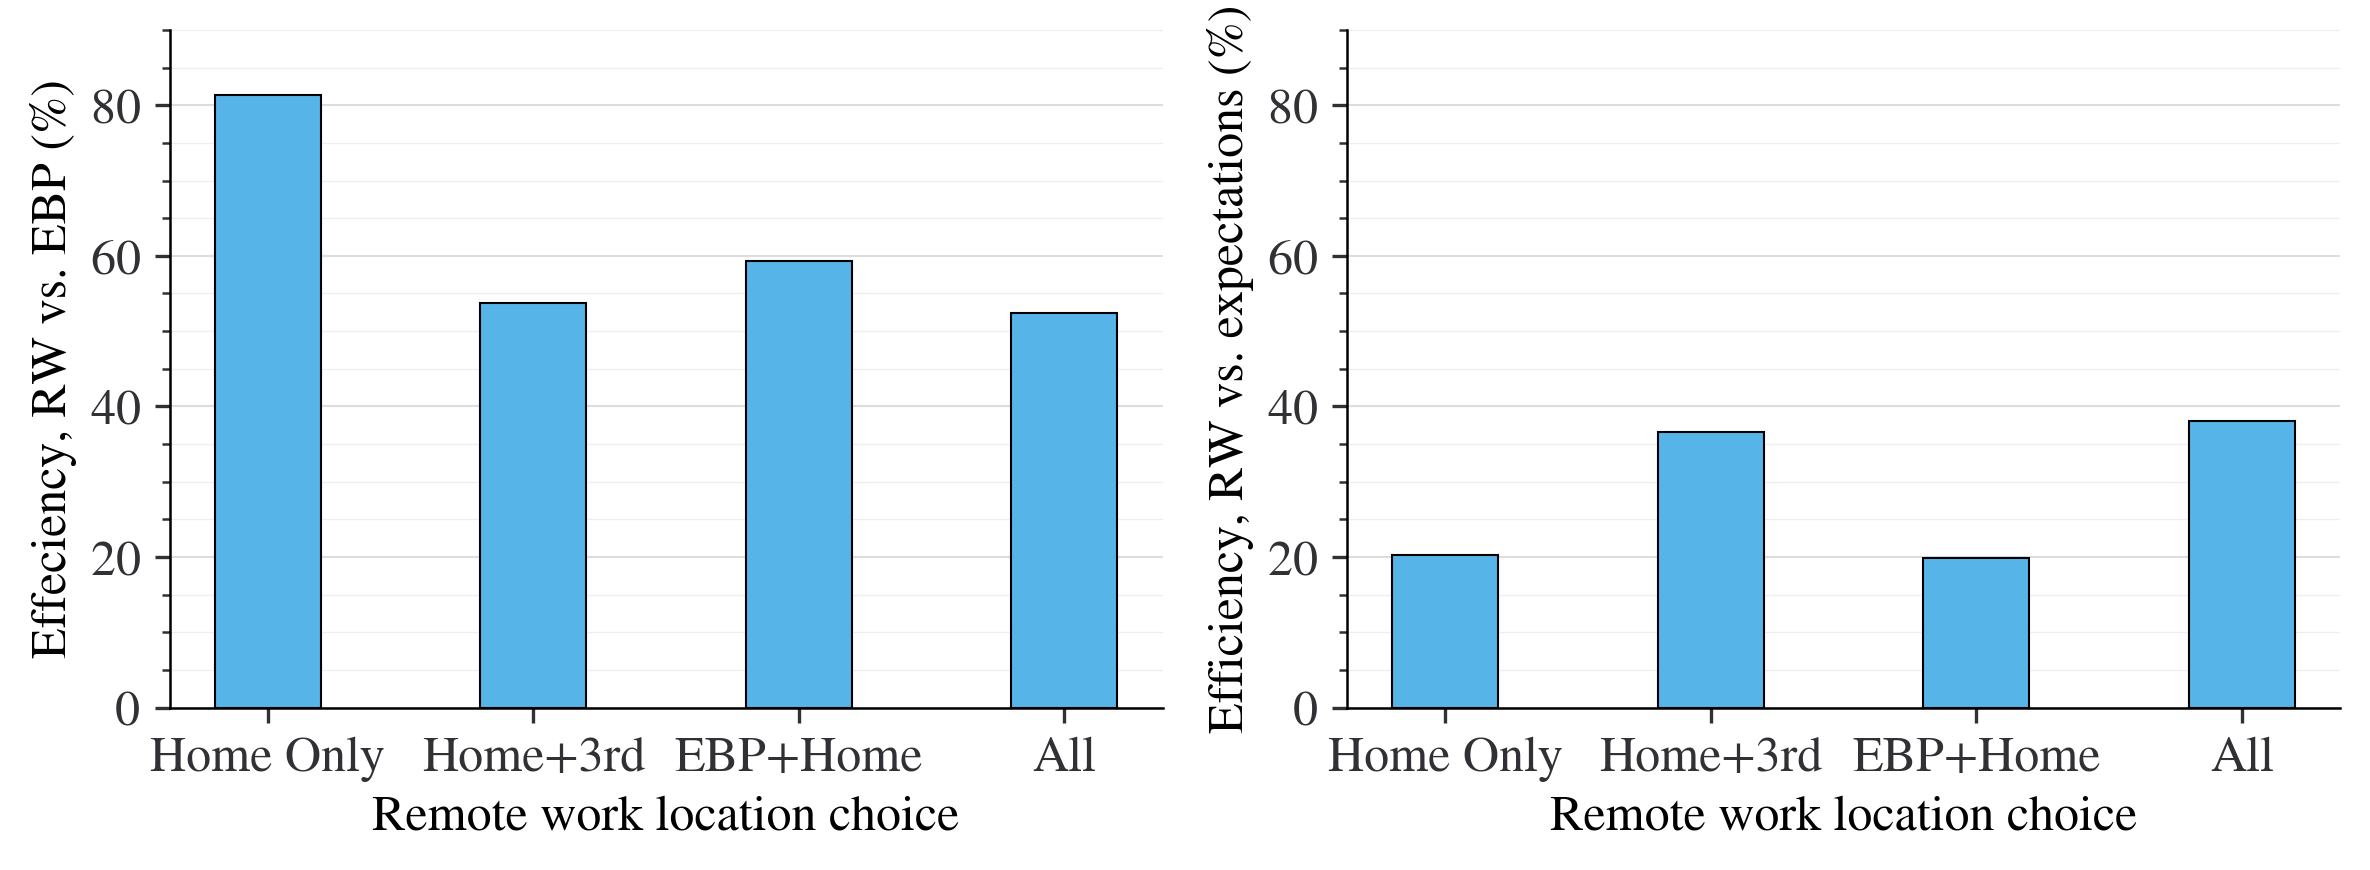

In [46]:
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(figsize[0], figsize[1]/1.5))

# Returns column filtered by up to two column values
target_col = 'work_computer_pct'

df_home = df[df.home_only == 1]
wt_home = hf.weighted_avg(df_home, target_col) 

df_home_third = df[df.home_third == 1]
wt_home_third = hf.weighted_avg(df_home_third, target_col) 

df_ebp_home_only = df[df.ebp_home_only == 1]
wt_ebp_home_only = hf.weighted_avg(df_ebp_home_only, target_col) 

df_ebp_home_third = df[df.ebp_home_third == 1]
wt_ebp_home_third = hf.weighted_avg(df_ebp_home_third, target_col) 

df_ebp_home_public = df[df.ebp_home_public == 1]
wt_ebp_home_public = hf.weighted_avg(df_ebp_home_public, target_col) 

df_ebp_home_cowork = df[df.ebp_home_cowork == 1]
wt_ebp_home_cowork = hf.weighted_avg(df_ebp_home_cowork, target_col) 

df_ebp_home_faf = df[df.ebp_home_faf == 1]
wt_ebp_home_faf = hf.weighted_avg(df_ebp_home_faf, target_col) 

wt_res = [wt_home, wt_home_third, wt_ebp_home_only, wt_ebp_home_third]#,
#           wt_ebp_home_public, wt_ebp_home_cowork, wt_ebp_home_faf]

labels = ['Home Only', 'Home+3rd', 'EBP+Home', 'All']
axs[0] = hf.plot_column(labels, wt_res,  
            xlabel='Remote work location choice', 
            ylabel='Effeciency, RW vs. EBP (%)', 
            ylim=[0, 90],
            blabels = labels,
            ax = axs[0]);


target_col = 'meetings_cow_pct'

df_home = df[df.home_only == 1]
wt_home = hf.weighted_avg(df_home, target_col) 

df_home_third = df[df.home_third == 1]
wt_home_third = hf.weighted_avg(df_home_third, target_col) 

df_ebp_home_only = df[df.ebp_home_only == 1]
wt_ebp_home_only = hf.weighted_avg(df_ebp_home_only, target_col) 

df_ebp_home_third = df[df.ebp_home_third == 1]
wt_ebp_home_third = hf.weighted_avg(df_ebp_home_third, target_col) 

df_ebp_home_public = df[df.ebp_home_public == 1]
wt_ebp_home_public = hf.weighted_avg(df_ebp_home_public, target_col) 

df_ebp_home_cowork = df[df.ebp_home_cowork == 1]
wt_ebp_home_cowork = hf.weighted_avg(df_ebp_home_cowork, target_col) 

df_ebp_home_faf = df[df.ebp_home_faf == 1]
wt_ebp_home_faf = hf.weighted_avg(df_ebp_home_faf, target_col) 

wt_res = [wt_home, wt_home_third, wt_ebp_home_only, wt_ebp_home_third]#,
#           wt_ebp_home_public, wt_ebp_home_cowork, wt_ebp_home_faf]

labels = ['Home Only', 'Home+3rd', 'EBP+Home', 'All']
axs[1] = hf.plot_column(labels, wt_res,  
            xlabel='Remote work location choice', 
            ylabel='Efficiency, RW vs. expectations (%)', 
            ylim=[0, 90],
            blabels = labels,
            ax = axs[1]);